# Weather Forecasting  Project 

**Brief description of the dataset**

This dataset provides training data on weather from 1st January 2013 to 31st December 2016. An additional testing set is available, enclosing the period 1st January 2017 to 31st March 2017, which corresponds to the forecast interval. There are 4 parameters describing weather, that are *meantemp*, *humidity*, *wind_speed*, and *meanpressure*.

**Project Steps**

The main aim of this project is to perform *weather forecasting* for the period January-March 2017.
Following what has been seen during the lessons, a comprehensive pipeline should be devised, including:

1. Loading, converting and cleaning of the data;
2. Exploring the dataset with descriptive statistics and frequency analysis. Using appropriate graphs to visualise the data at hand;
3. Describing the time series patterns (visually and numerically);
4. Focusing on *meantemp* (temperature as dependent variable), building the most appropriate model(s) to forecast the data for the specified period. In particular, using as test data those contained in the corresponding csv file. Evaluating the model performance using different metrics. Visualising the results with appropriate graphs.

For the different steps, comment on the main results and any relevant observation/finding you have noticed.

# Step 1: Loading, cleaning and transformation of the data

In this phase, we focus on importing the dataset into the Jupyter Notebook environment. Our main goal here is to take a first look at the data and figure out what cleaning and transformation are needed.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm 
import sklearn 
from scipy import stats,signal
from sklearn.linear_model import LinearRegression
from datetime import datetime
from statsmodels.tsa.exponential_smoothing.ets import ETSModel 
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from pmdarima.arima.utils import ndiffs

from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product


from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.stats.stattools import durbin_watson
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('seaborn')
sns.set(style="whitegrid")

In [3]:
weather_data = pd.read_csv("Weather_ForecastingTrain.csv", na_values='', sep=',', index_col='date', parse_dates=['date'])
display(weather_data)

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-27,16.850000,67.550000,8.335000,1017.200000
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762


In [4]:
weather_data = round(weather_data, 2)
weather_data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.00,84.50,0.00,1015.67
2013-01-02,7.40,92.00,2.98,1017.80
2013-01-03,7.17,87.00,4.63,1018.67
2013-01-04,8.67,71.33,1.23,1017.17
2013-01-05,6.00,86.83,3.70,1016.50


**Data Loading, Indexing and Data Type Conversion**:
After loading the data, we've set the 'date' column as the index, providing a unique identifier for each row. This facilitates easier manipulation and analysis of time-series data. We've also converted the 'date' column from a string to a datetime format, allowing us to perform time-based visualizations and analyses. To maintain consistency and readability, numerical data has been rounded to two decimal places, making the analysis process smoother.

In [5]:
null_elem = weather_data.isnull().sum().sum()
print('Total number of NaN in Units is:',null_elem)

Total number of NaN in Units is: 0


In [6]:
duplicated_indexes = weather_data[weather_data.duplicated(keep=False)]

if len(duplicated_indexes) > 0:
    print(f"There are {len(duplicated_indexes)} duplicated indexes: {duplicated_indexes}")
else:
    print("There are no duplicated indexes.")

There are no duplicated indexes.


**Missing Values and Duplicates Check**: We've conducted  checks to identify and handle any missing values and duplicate indexes in the dataset. This ensures the integrity and uniqueness of the data, which are essential for accurate analysis.

It is confirmed that there are no missing values or duplicated indexes. This means there's no need for imputation or removing duplicates.

**With the data now cleaner and appropriately transformed, we're ready to move into the next phase.**

# Step 2: Descriptive statistics and frequency analysis

**Descriptive Statistics:**
We start our exploratory data analysis by examining the descriptive statistics of the dataset. These statistics provide insights into the central tendency, variability, and distribution shape of each variable. Key metrics include mean, median, standard deviation, minimum, maximum, and quartiles.

In [7]:
stats = weather_data.describe()
print(stats)

          meantemp     humidity   wind_speed  meanpressure
count  1461.000000  1461.000000  1461.000000   1461.000000
mean     25.506030    60.744914     6.806804   1011.101211
std       7.339271    16.743905     4.559820    180.293232
min       6.000000    13.430000     0.000000     -3.040000
25%      18.860000    50.380000     3.480000   1001.570000
50%      27.710000    62.620000     6.250000   1008.560000
75%      31.310000    72.120000     9.250000   1014.940000
max      38.710000    98.000000    42.220000   7679.330000


### Time Series Analysis

After analyzing basic statistics, we are continuing to explore time series patterns by creating additional time series plots. Here, we aim to extract valuable information about trends, seasonality, outliers, and patterns from our time series data. Time series plots will provide a clearer picture of how weather parameters change over time, essential for effective forecasting.


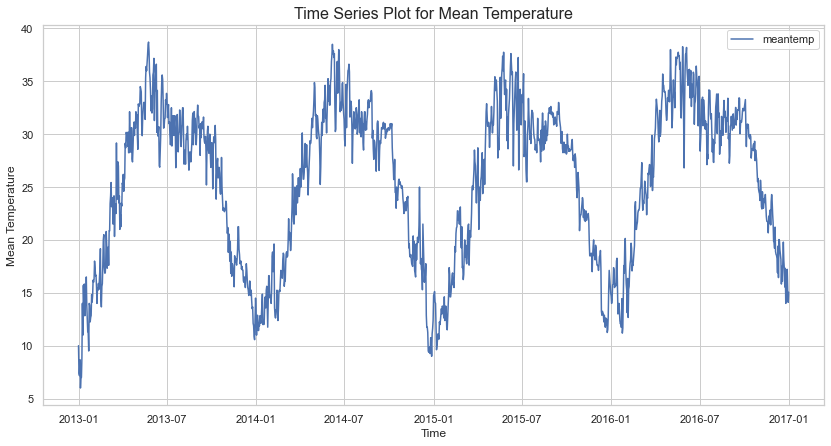

In [8]:
plt.figure(figsize=(14, 7))
plt.plot(weather_data.meantemp, label='meantemp')
plt.title('Time Series Plot for Mean Temperature', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.grid(True)
plt.legend(frameon=True, loc='upper right');
plt.show()

The time series analysis of the Mean Temperature data reveals several key characteristics vital for our forecasting model. Firstly, a pronounced **seasonal pattern** is evident, with peaks and troughs recurring annually, corresponding to the expected warmer and cooler months, respectively. This seasonality is a primary feature with no significant long-term **trends** detected, indicating stable mean temperatures across the years. The **variability** within the data remains consistent, with the annual extremes appearing at similar levels throughout the observed period, reinforcing the reliability of the seasonal pattern. Notably, the time series does not exhibit any longer-term **cyclical changes** or abrupt **anomalies**, suggesting a stable and predictable temperature pattern without significant outliers. The **extremes** in temperature, both high and low, occur regularly around the same time each year, further validating the seasonal behavior of the dataset. The absence of sudden shifts or **stability** issues in the mean temperature levels suggests that the underlying process generating the data has been steady, making it an ideal candidate for seasonal time series forecasting models.

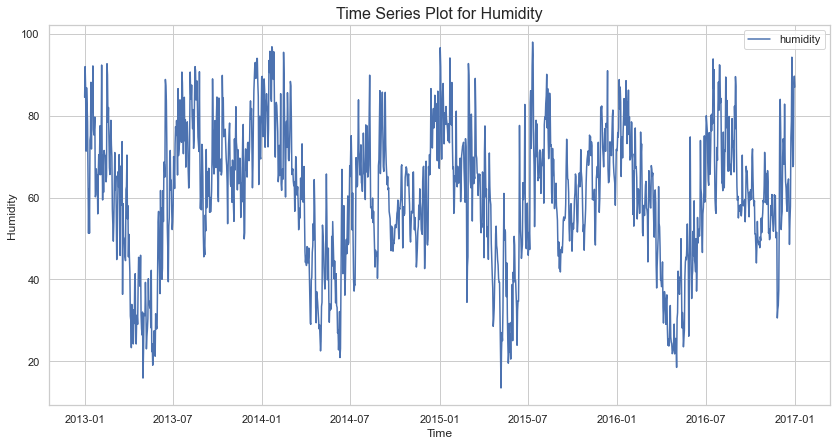

In [9]:
plt.figure(figsize=(14, 7))
plt.plot(weather_data.humidity,label='humidity') 
plt.title('Time Series Plot for Humidity', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.grid(True)
plt.legend(frameon=True, loc='upper right');
plt.show()

The time series plot for humidity indicates a data set with considerable complexity. The plot does not display a straightforward seasonal pattern, with irregular fluctuations ranging from 20% to 100% humidity. This indicates a high degree of **variability** without a discernible long-term **trend**, suggesting stable mean humidity levels over time. Notable **anomalies** in the form of sharp peaks and drops may represent atmospheric events or require further investigation to determine their significance. While there seems to be a seasonal pattern to the extreme low humidity levels, the overall **stability** of the time series is periodically disrupted by these extreme variations. The data also exhibits a considerable amount of **noise**, presenting challenges for forecasting models.

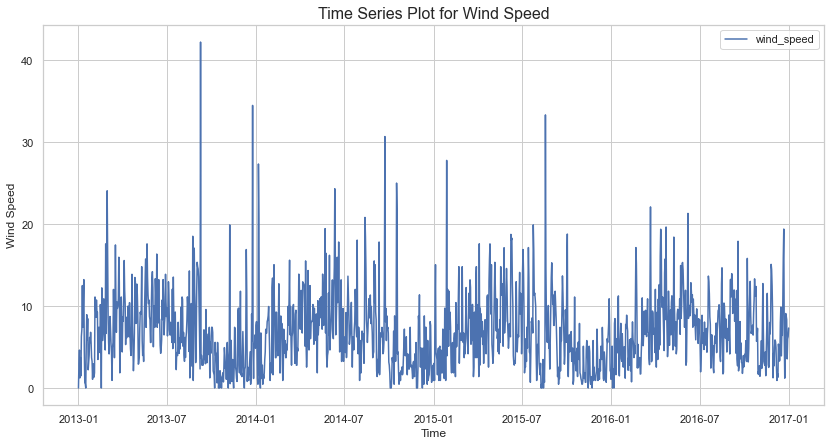

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(weather_data.wind_speed, label='wind_speed')
plt.title('Time Series Plot for Wind Speed', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Wind Speed')
plt.grid(True)
plt.legend(frameon=True, loc='upper right');
plt.show()

The time series plot for wind speed reveals a complex dataset with no discernible **seasonal patterns** or long-term **trends**, which distinguishes it from the more predictable temperature behavior. Wind speed exhibits high **variability** with numerous spikes indicating sporadic high wind events. The lack of clear patterns in these **anomalies** and **extremes** points to the irregular nature of wind speed, which is characterized by a mix of calm periods and unpredictable gusts. Despite this, the baseline wind speed shows a degree of **stability** without significant shifts in average conditions.

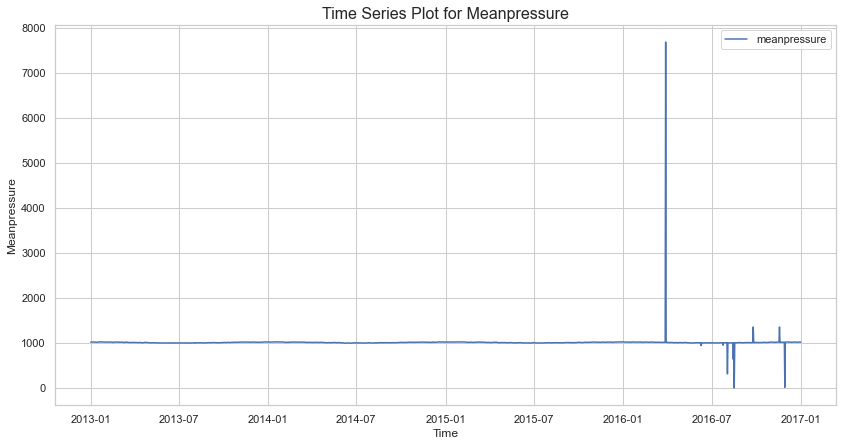

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(weather_data.meanpressure, label='meanpressure')
plt.title('Time Series Plot for Meanpressure', fontsize=16)
plt.xlabel('Time')
plt.ylabel('Meanpressure')
plt.grid(True)
plt.legend(frameon=True, loc='upper right');
plt.show()

The time series plot for mean pressure indicates a high degree of **stability** in atmospheric pressure, with minimal **variability** and little to no noise across the majority of the dataset. There is an absence of any clear **trend** or **seasonality**, suggesting that pressure remains consistent irrespective of the time of year. However, the plot is characterized by a few significant **anomalies**, including some particularly sharp spikes in 2016. These outliers could represent rare atmospheric events.

### Histograms and BoxPlots

After our initial data exploration, we now move forward to a deeper analysis to gain a more comprehensive understanding of our dataset. We will plot **histograms** for each variable to know the distribution patterns of the data and the frequency of each value per variable.

In addition, we will employ **boxplots** to further delve into the data's distribution, particularly examining the spread, the central tendency and identifying potential outliers. By analyzing the boxplots for each year, we will discern the stability of our weather parameters and confirm their suitability for time series forecasting.



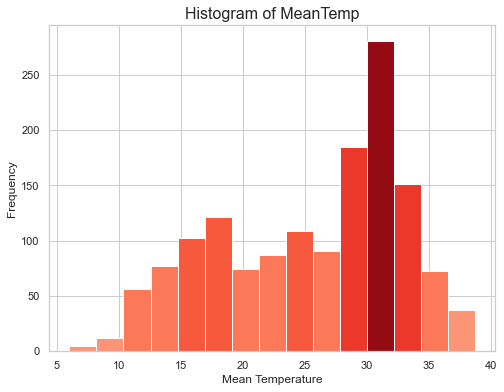

In [12]:
num_colors = 10
palette = sns.color_palette("Reds", n_colors=num_colors)[3:]
meantemp = weather_data['meantemp']

binwidth = (max(meantemp) - min(meantemp)) / 15
counts, bin_edges = np.histogram(meantemp, bins=np.arange(min(meantemp), max(meantemp) + binwidth, binwidth))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_colors = [palette[int(np.interp(x, [min(counts), max(counts)], [0, len(palette)-1]))] for x in counts]

plt.figure(figsize=(8, 6))
for i in range(len(counts)):
    color_index = int(np.interp(counts[i], [min(counts), max(counts)], [0, len(palette)-1]))
    plt.bar(bin_centers[i], counts[i], color=palette[color_index], width=binwidth)

plt.xlabel('Mean Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of MeanTemp', fontsize=16)

plt.savefig('MeanTemp_Histogram.png', dpi=300, bbox_inches='tight')
plt.show()

The histogram analysis of 'meantemp' data, with 30 bins, indicates a **unimodal** distribution centered around the 25 to 30 degrees range, reflecting the dataset's **central tendency** and **mode**. The **spread** of temperatures is considerable, stretching from just over 5 to just under 40 degrees Celsius, showcasing the dataset's **diversity**. The **shape** resembles a bell curve with a slight left skew, suggesting a normal or near-normal distribution, characterized by a single peak with no significant **outliers** as frequencies diminish symmetrically from the central peak. This **variability** and **concentration of values** around the mode highlight the range's non-uniformity, which is pivotal for in-depth statistical analysis and enhancing ours model's accuracy.

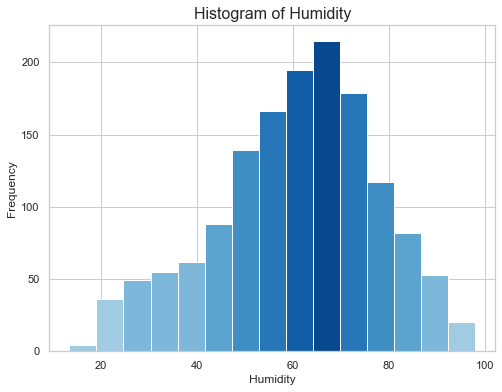

In [13]:
num_colors = 10
palette = sns.color_palette("Blues", n_colors=num_colors)[3:]
humidity = weather_data['humidity']

binwidth = (max(humidity) - min(humidity)) / 15
counts, bin_edges = np.histogram(humidity, bins=np.arange(min(humidity), max(humidity) + binwidth, binwidth))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_colors = [palette[int(np.interp(x, [min(counts), max(counts)], [0, len(palette)-1]))] for x in counts]

plt.figure(figsize=(8, 6))
for i in range(len(counts)):
    color_index = int(np.interp(counts[i], [min(counts), max(counts)], [0, len(palette)-1]))
    plt.bar(bin_centers[i], counts[i], color=palette[color_index], width=binwidth)

plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.title('Histogram of Humidity', fontsize=16)
plt.show()

#### check it again

The histogram of 'humidity' displays a distribution that spans a wide range, from about 20% to nearly 100%. This wide spread indicates significant variability in humidity levels. The distribution is skewed towards higher humidity values, suggesting that higher humidity levels are more frequent in the dataset. Peaks towards the higher end of the scale imply common occurrences of high humidity conditions. The lack of a single, prominent peak suggests the absence of a strong central tendency, which could be indicative of the diverse climatic conditions captured in the dataset. This variability and lack of a clear mode present challenges for predictive modeling, as the data does not conform to a simple, easily characterized distribution pattern.

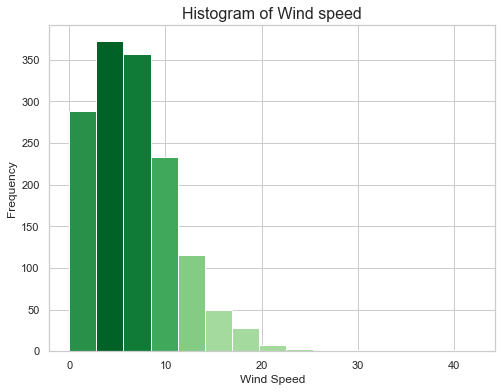

In [14]:
num_colors = 10
palette = sns.color_palette("Greens", n_colors=num_colors)[3:]
wind_speed = weather_data['wind_speed']

binwidth = (max(wind_speed) - min(wind_speed)) / 15
counts, bin_edges = np.histogram(wind_speed, bins=np.arange(min(wind_speed), max(wind_speed) + binwidth, binwidth))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_colors = [palette[int(np.interp(x, [min(counts), max(counts)], [0, len(palette)-1]))] for x in counts]

plt.figure(figsize=(8, 6))
for i in range(len(counts)):
    color_index = int(np.interp(counts[i], [min(counts), max(counts)], [0, len(palette)-1]))
    plt.bar(bin_centers[i], counts[i], color=palette[color_index], width=binwidth)

plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Histogram of Wind speed', fontsize=16)
plt.show()

The wind speed histogram reveals a right-skewed distribution, with most data points clustering near lower wind speeds and fewer occurrences as wind speed increases. This skewness towards lower speeds indicates that calm conditions are more common than windy conditions in the dataset. The long tail towards the higher end suggests occasional gusty or high wind speed events. The presence of these outliers can influence the average wind speed, making it crucial to consider these extremes in any predictive analysis. The right skewness and variability in the wind speed dataset suggest a need for models that can accommodate such irregularities and extremes.

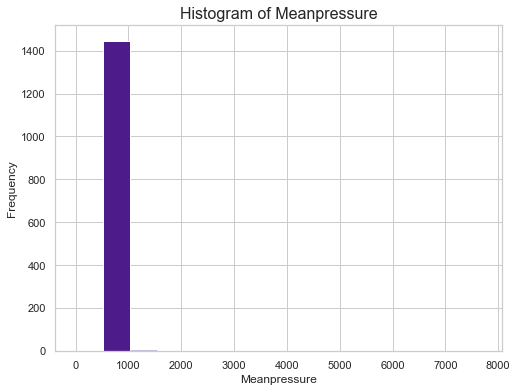

In [15]:
num_colors = 10
palette = sns.color_palette("Purples", n_colors=num_colors)[3:]
meanpressure = weather_data['meanpressure']

binwidth = (max(meanpressure) - min(meanpressure)) / 15
counts, bin_edges = np.histogram(meanpressure, bins=np.arange(min(meanpressure), max(meanpressure) + binwidth, binwidth))
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_colors = [palette[int(np.interp(x, [min(counts), max(counts)], [0, len(palette)-1]))] for x in counts]

plt.figure(figsize=(8, 6))
for i in range(len(counts)):
    color_index = int(np.interp(counts[i], [min(counts), max(counts)], [0, len(palette)-1]))
    plt.bar(bin_centers[i], counts[i], color=palette[color_index], width=binwidth)

plt.xlabel('Meanpressure')
plt.ylabel('Frequency')
plt.title('Histogram of Meanpressure', fontsize=16)
plt.show()

The meanpressure histogram shows a distribution that is largely concentrated around a central range, with a steep peak indicating a strong mode. This suggests that most of the atmospheric pressure values fall within a narrow band, denoting consistent pressure conditions over the period of observation. Notable in this histogram are a few outliers, particularly visible as separate, individual bars detached from the main distribution. These outliers could be indicative of rare, extreme pressure events or anomalies in the data. The concentrated nature of the distribution, apart from these anomalies, points towards a stable atmospheric pressure pattern, which can be a critical factor in weather forecasting models.

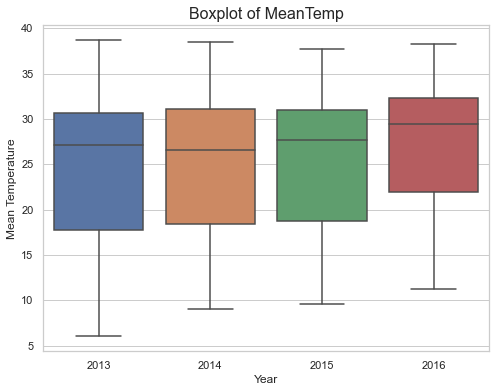

In [16]:
weather_data['date'] = weather_data.index.to_period('Y')

plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['date'], y=meantemp)
plt.title('Boxplot of MeanTemp', fontsize=16)
plt.xlabel('Year') 
plt.ylabel('Mean Temperature')
plt.show()

The boxplot analysis of **Mean Temperature** over the years showcases a **consistent median** (the median line within each box appears relatively unchanged), suggesting a **stable central tendency** and consistent average temperatures. The **interquartile ranges** are similar across years, with minimal **outliers** and a slight increase in spread in 2016, indicating that the middle 50% of temperatures are spread similarly year over year. The distribution of data around the median is **symmetric**, implying a **balanced spread** of temperatures without significant skewness. The symmetry around the median and the absence of significant year-to-year variability or skewness support the reliability of the data for forecasting models, as it suggests predictable, stable behavior without significant shifts in the central tendency or variability.

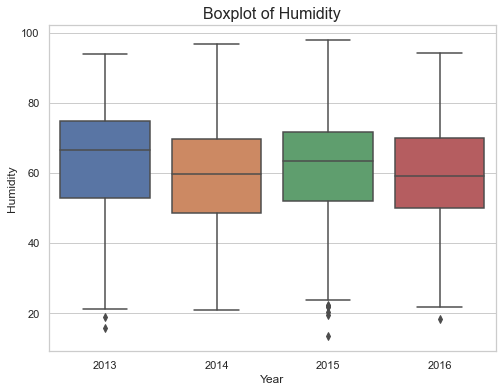

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['date'], y=humidity)
plt.title('Boxplot of Humidity', fontsize=16)
plt.xlabel('Year') 
plt.ylabel('Humidity') 
plt.show()

The boxplot analysis across different years shows that **humidity levels** have a slight variation in **median values** but exhibits a stable **range** and **interquartile spread**, with no significant shifts or trends. The **whiskers**, which indicate the variability outside the upper and lower quartiles, also show **consistency**, barring a few **outliers**. This suggests a consistent pattern with occasional **extremes**, which need to be considered in forecasting models for an accurate prediction.

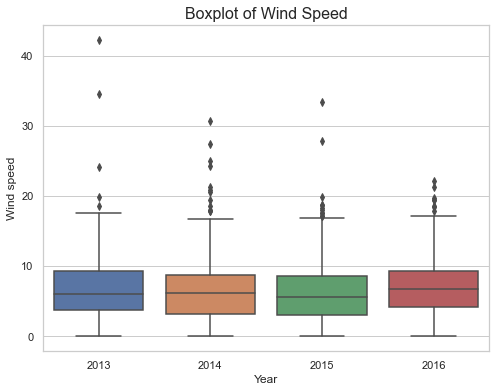

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['date'], y=wind_speed)
plt.title('Boxplot of Wind Speed', fontsize=16)
plt.xlabel('Year') 
plt.ylabel('Wind speed')
plt.show()

The **wind speed** boxplot reveals a **consistent pattern** over the years with a **narrow interquartile range**, suggesting that most of the wind speed values are concentrated around the **median**. **Whiskers** extend occasionally to show occasional gusty conditions, but **outliers** are minimal, indicating the rarity of **extreme wind speeds**. This stable pattern with consistent median values is beneficial for effective forecasting of wind-based phenomena.

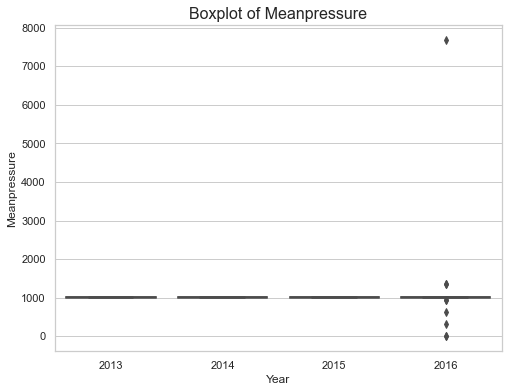

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=weather_data['date'], y=meanpressure)
plt.title('Boxplot of Meanpressure', fontsize=16)
plt.xlabel('Year') 
plt.ylabel('Meanpressure')
plt.show()

The boxplot of **meanpressure** illustrates minimal yearly variation, with **median pressure values** remaining steady over time. **The interquartile range** is narrow, suggesting low variability in pressure readings. There are almost no **outliers**, indicating that extreme pressure deviations are uncommon. The data's stability suggests that atmospheric pressure remains constant and predictable.

### Scatter Plots and Correlation Matrix

Continuing with our analysis, we proceed to examine the relationships between our variables. **Scatter plots** will provide a visual understanding of these relationships, allowing us to observe the potential linear correlations or patterns between pairs of variables and the **correlation matrix** to numerically measure the strength and direction of linear relationships between variables.


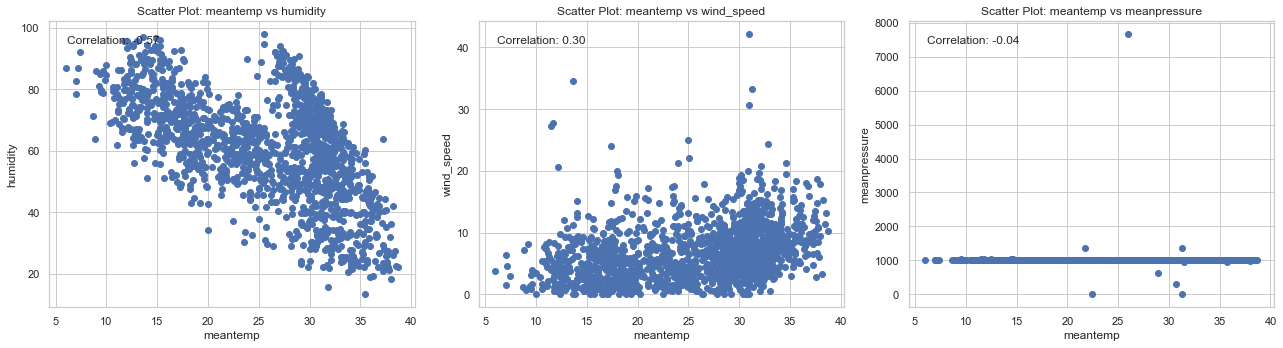

In [20]:
def plot_scatter_and_correlation(dataframe, x, y, position, ax):
    ax[position].scatter(dataframe[x], dataframe[y])
    ax[position].set_xlabel(x)
    ax[position].set_ylabel(y)
    ax[position].set_title(f'Scatter Plot: {x} vs {y}')
    
    corr = np.corrcoef(dataframe[x], dataframe[y])[0, 1]
    ax[position].annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top')

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
plot_scatter_and_correlation(weather_data, 'meantemp', 'humidity', 0, ax)
plot_scatter_and_correlation(weather_data, 'meantemp', 'wind_speed', 1, ax)
plot_scatter_and_correlation(weather_data, 'meantemp', 'meanpressure', 2, ax)
plt.tight_layout()
plt.show()

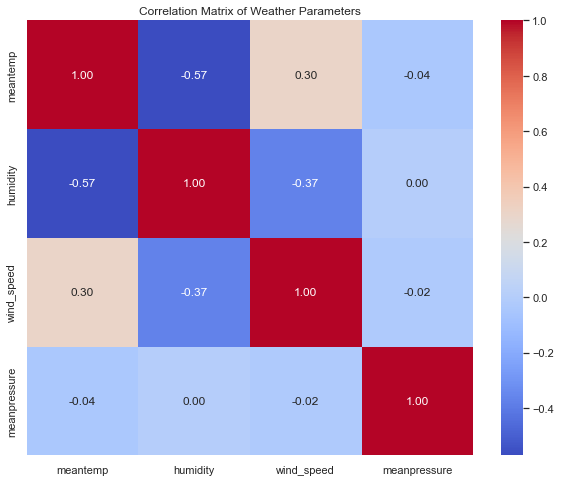

In [21]:
correlation_matrix = weather_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Weather Parameters")
plt.savefig("Correlation_Matrix.png") 
plt.show()

- **Temperature vs. Humidity**: The correlation coefficient of `-0.57` indicates a moderate negative correlation, implying that, generally, as the mean temperature increases, humidity tends to decrease, and vice versa.
- **Temperature vs. Wind Speed**: A weak positive correlation of `0.30` is observed between mean temperature and wind speed. This indicates a slight tendency for wind speed to increase with rising temperatures, but the relationship is not very strong.
- **Humidity vs. Wind Speed**: The `-0.37` correlation indicates a weak inverse relationship, suggesting that higher wind speeds might correspond to lower humidity levels.
- **Pressure Independence**: Mean pressure demonstrates very weak correlations with temperature, humidity, and wind speed, suggesting that pressure changes are largely independent of the other measured parameters. There is a very weak negative correlation `-0.04` between mean temperature and mean pressure, suggesting almost no linear relationship between these two variables.


# Step 3: Describing the time series patterns

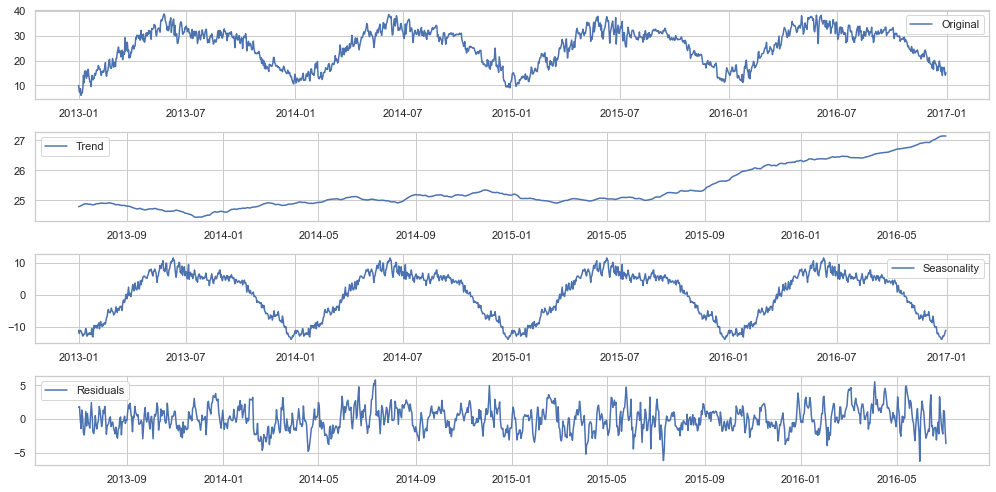

In [22]:
decomposition = seasonal_decompose(weather_data['meantemp'], model='additive', period=365)  # adjust the period based on your data's seasonality

plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(decomposition.observed, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

### Checking Stationarity

In order to check for the **stationarity of a time series**, different operations and statistical tests can be done, in particular:
- evaluating rolling statistics (generally mean and standard deviation)
- ACF plot: for a stationary time series the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly
- Unit root tests: Statistical hypothesis tests of stationarity that are designed for determining whether differencing is required. ADF (Augmented Dickey-Fuller) and KPSS (Kwiatkowski-Phillips-Schmidt-Shin) tests are the main ones

### Rolling Statistics

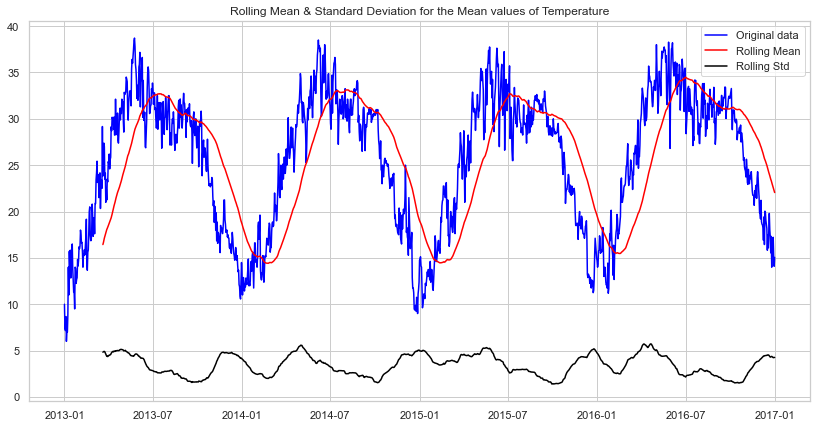

In [23]:
rolling_mean = weather_data['meantemp'].rolling(80).mean()
rolling_std = weather_data['meantemp'].rolling(80).std()
plt.figure(figsize=(14, 7))
plt.plot(weather_data['meantemp'], color='blue',label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Mean values of Temperature')
plt.savefig("roll.png")
plt.show()

The **rolling mean** shows a repeating pattern that corresponds with the seasons, rising and falling in a consistent manner each year. This indicates a seasonal effect, which is a form of seasonality and suggests that the mean of the data is not constant over time.
The **rolling standard deviation** appears relatively constant over time, indicating that the variability of the data might not be changing. However, the constancy of the standard deviation alone does not imply stationarity.
The data appear to be **non-stationary** because they exhibit clear seasonality.


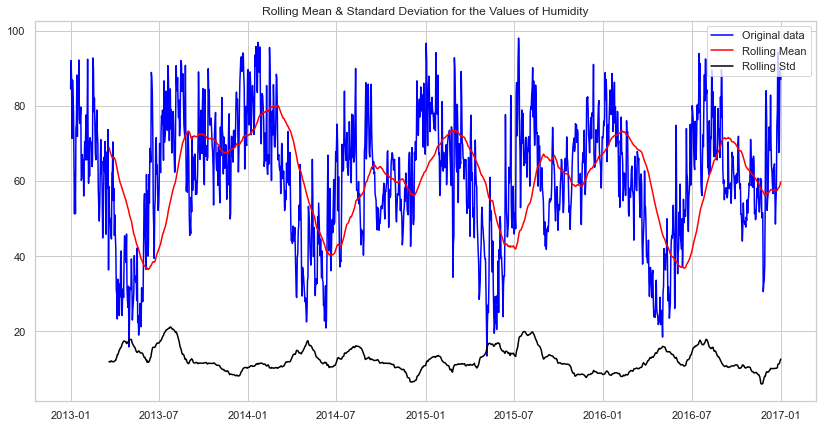

In [24]:
rolling_mean = weather_data['humidity'].rolling(80).mean()
rolling_std = weather_data['humidity'].rolling(80).std()
plt.figure(figsize=(14, 7))
plt.plot(weather_data['humidity'], color='blue', label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Values of Humidity')
plt.show()

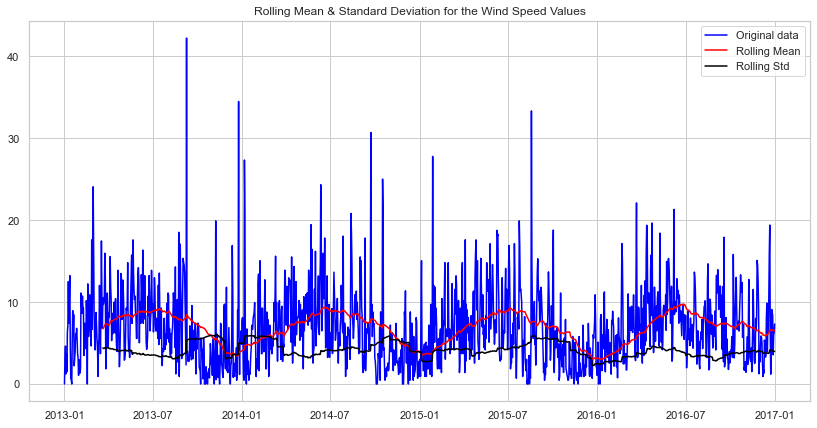

In [25]:
rolling_mean = weather_data['wind_speed'].rolling(80).mean()
rolling_std = weather_data['wind_speed'].rolling(80).std()
plt.figure(figsize=(14, 7))
plt.plot(weather_data['wind_speed'], color='blue', label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Wind Speed Values')
plt.show()

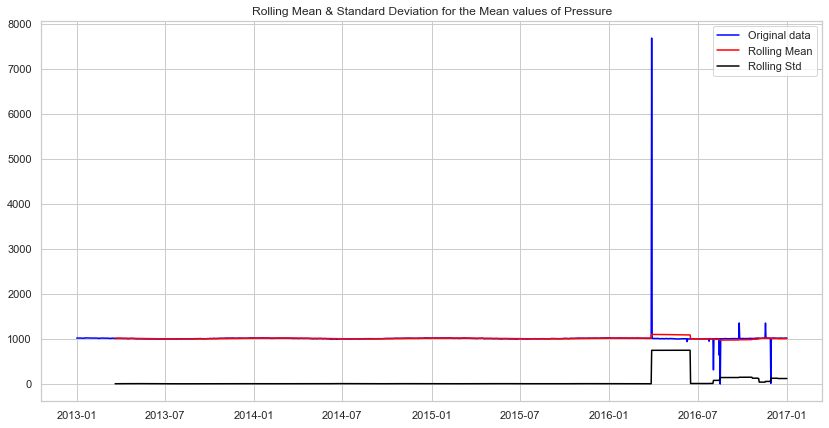

In [26]:
rolling_mean = weather_data['meanpressure'].rolling(80).mean()
rolling_std = weather_data['meanpressure'].rolling(80).std()
plt.figure(figsize=(14, 7))
plt.plot(weather_data['meanpressure'], color='blue', label='Original data')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation for the Mean values of Pressure')
plt.show()

### ACF Plot

The ACF plot is useful for identifying non-stationary time series. For a stationary time series, the ACF will drop to zero relatively quickly, while the ACF of non-stationary data decreases slowly.

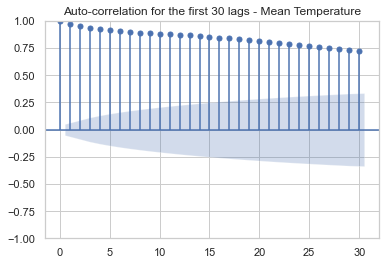

In [26]:
plot_acf(weather_data['meantemp'], lags=30, title='Auto-correlation for the first 30 lags - Mean Temperature');

The ACF plot of MeanTemp is slowly decreasing and therefore does not follow a stationary form, so we have to apply the difference method to check if it goes more stationary and if not we apply another difference.

Data are clearly **non-stationary**, with seasonality and a non-linear trend. As first step we perfom a **seasonal difference**

### ACF and PACF plots after seasonal differencing

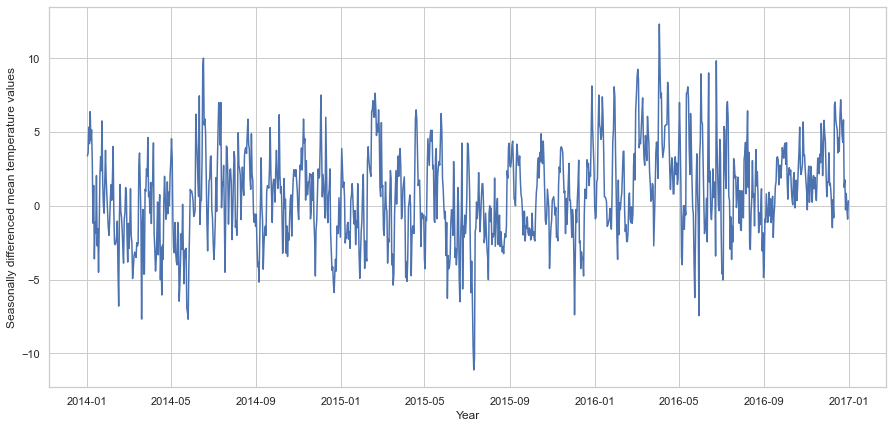

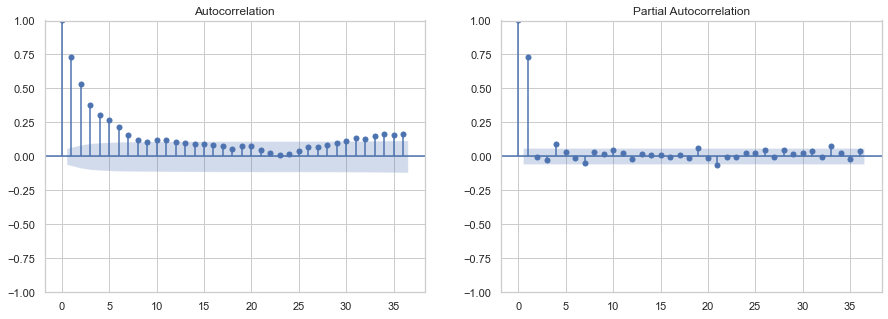

In [209]:
# Applying seasonal differencing (with m=365 for daily data)
seasonally_diff = weather_data['meantemp'].diff(365).dropna()

plt.figure(figsize=(15, 7))
plt.plot(seasonally_diff)
plt.xlabel('Year')
plt.ylabel('Seasonally differenced mean temperature values');

fig, ax = plt.subplots(1, 2, figsize=(15,5))
plot_acf(seasonally_diff, lags=36, ax=ax[0]);
plot_pacf(seasonally_diff, lags=36, ax=ax[1]);

Now we'll move to the the unit root tests that will help us define if our variables follow a stationary form to continue with the forecast.

## Unit Root Tests


When applying the seasonal difference method, we observe a visually smooth graph. This suggests that the differenced data now exhibits characteristics of stationarity and the differencing was effective. We will not perform first-order differencing to we avoid the risk of over-differencing that may lead to over-smoothing issues. 

### Augmented Dickey-Fuller

The **Augmented Dickey-Fuller** (ADF) test is a type of statistical test called a unit root test. The intuition behind a unit root test is that it determines how strongly a time series is defined by a trend. ADF uses an autoregressive model and optimizes an information criterion across multiple different lag values. The null hypothesis (H0) of the test is that the time series can be represented by a unit root, that it is not stationary. The alternative hypothesis is that the time series is stationary.

- Null Hypothesis (H0):  time series has a unit root, and it is non-stationary. \\
- Alternative Hypothesis (H1): time series does not have a unit root, meaning it is stationary. 

- p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. \\
- p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary. 

The main outputs from the `adfuller` test in Python are: 1) test statistic; 2) p-value; 3) number of lags used; 4) number of observations used for the ADF regression and calculation of the critical values; 5) critical values for the test statistic at the 1%, 5%, and 10% levels; 6) the maximized information criterion among AIC, BIC and t-stat.

In [269]:
def adfuller_test(weather_data):
  adf_test = adfuller(weather_data,autolag='AIC') 
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on Mean Temperature')
adfuller_test(weather_data['meantemp'])
print('--------------------------------------')
print('ADF on Mean Temperature Difference')
adfuller_test(seasonally_diff)
print('--------------------------------------')
print('--------------------------------------')
print('ADF on Humidity')
adfuller_test(weather_data['humidity'])
print('--------------------------------------')
print('ADF on Wind Speed')
adfuller_test(weather_data['wind_speed'])
print('--------------------------------------')
print('ADF on Mean Pressure')
adfuller_test(weather_data['meanpressure'])

ADF on Mean Temperature
ADF Statistic: -2.155773561085109
p-value:  0.22268665888882533
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We cannot reject the null hypothesis (H0) --> data is non-stationary
--------------------------------------
ADF on Mean Temperature Difference
ADF Statistic: -10.083577750822784
p-value:  1.1712029219574221e-17
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary
--------------------------------------
--------------------------------------
ADF on Humidity
ADF Statistic: -3.7375092152123637
p-value:  0.0036154426559767525
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary
--------------------------------------
ADF on Wind Speed
ADF Statistic: -3.8495540378115245
p-value:  0.0024391164595891227
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
We can reject the null hypothesis (H0) --> data is stationary
--------------

In [270]:
from statsmodels.tsa.stattools import adfuller

def adf_test_with_criteria(weather_data, max_lag=None, criterion='AIC'):
    """
    Perform ADF test with specified information criterion for lag selection.
    
    :param weather_data: pd.Series - Time series data.
    :param max_lag: int - Maximum number of lags to include.
    :param criterion: str - 'AIC' or 'BIC'.
    """
    adf_test = adfuller(weather_data, maxlag=max_lag, autolag=criterion)
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print('Critical Values:')
    for key, value in adf_test[4].items():
        print(f'\t{key}: {value:.3f}')
    if adf_test[1] <= 0.05:
        print('Reject the null hypothesis (H0), the data is stationary.')
    else:
        print('Fail to reject the null hypothesis (H0), the data is non-stationary.')

# Example usage:
print('ADF Test with AIC')
adf_test_with_criteria(weather_data['meantemp'], criterion='AIC')

print('\nADF Test with BIC')
adf_test_with_criteria(weather_data['meantemp'], criterion='BIC')


ADF Test with AIC
ADF Statistic: -2.155773561085109
p-value: 0.22268665888882533
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Fail to reject the null hypothesis (H0), the data is non-stationary.

ADF Test with BIC
ADF Statistic: -3.114955404910283
p-value: 0.02546603672969768
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Reject the null hypothesis (H0), the data is stationary.


### Kwiatkowski-Phillips-Schmidt-Shin 

Conversely, the **KPSS** tests for the null hypothesis that the series is stationary around a deterministic trend (i.e., trend-stationary). Therefore, if the p-value of the test statistic is below the threshold, this means we can reject this hypothesis and the series is not trend stationary. A p-value higher than the threshold will lead us to accept this hypothesis and conclude that the series is trend-stationary. This is different from other unit roots tests, as the presence of a unit root is not the null hypothesis but the alternative. Thus, the interpretation of the resulting p-value is the opposite compared to ADF.

- Null Hypothesis (H0): time series is trend stationary.
- Alternative Hypothesis (H1): time series is not trend stationary.
- p-value <= 0.05: Reject the null hypothesis (H0), the data is not trend stationary.
- p-value > 0.05: Fail to reject the null hypothesis (H0), the data is trend stationary.

The main outputs from the Python `kpss` function are: 1) the KPSS test statistic; 2) the p-value of the test; 3) the number of lags used by the test; 4) the critical values at 10%, 5%, 2.5% and 1%. 

In [211]:
def kpss_test(weather_data):
  kpss_out = kpss(weather_data,regression='c', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Mean Temperature')
kpss_test(weather_data['meantemp'])
print('--------------------------------------')
print('KPSS on Mean Temperature difference')
kpss_test(seasonally_diff)
print('--------------------------------------')
print('--------------------------------------')
print('KPSS on Humidity')
kpss_test(weather_data['humidity'])
print('--------------------------------------')
print('KPSS on Wind Speed')
kpss_test(weather_data['wind_speed'])
print('--------------------------------------')
print('KPSS on Mean Pressure')
kpss_test(weather_data['meanpressure'])

KPSS on Mean Temperature
KPSS Statistic: 0.19177560973199878
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Temperature difference
KPSS Statistic: 1.0313197847703783
p-value:  0.01
We can reject the null hypothesis (H0) --> data is not trend stationary
--------------------------------------
--------------------------------------
KPSS on Humidity
KPSS Statistic: 0.09405986509446676
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Wind Speed
KPSS Statistic: 0.13674557129493134
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Pressure
KPSS Statistic: 0.09217738402354084
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


In [212]:
def kpss_test(weather_data):
  kpss_out = kpss(weather_data,regression='ct', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Mean Temperature')
kpss_test(weather_data['meantemp'])
print('--------------------------------------')
print('KPSS on Mean Temperature difference')
kpss_test(seasonally_diff)
print('--------------------------------------')
print('--------------------------------------')
print('KPSS on Humidity')
kpss_test(weather_data['humidity'])
print('--------------------------------------')
print('KPSS on Wind Speed')
kpss_test(weather_data['wind_speed'])
print('--------------------------------------')
print('KPSS on Mean Pressure')
kpss_test(weather_data['meanpressure'])

KPSS on Mean Temperature
KPSS Statistic: 0.09001706105608978
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Temperature difference
KPSS Statistic: 0.11780549375379115
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
--------------------------------------
KPSS on Humidity
KPSS Statistic: 0.06225811058603434
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Wind Speed
KPSS Statistic: 0.11836862129560516
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Mean Pressure
KPSS Statistic: 0.05154125269658829
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


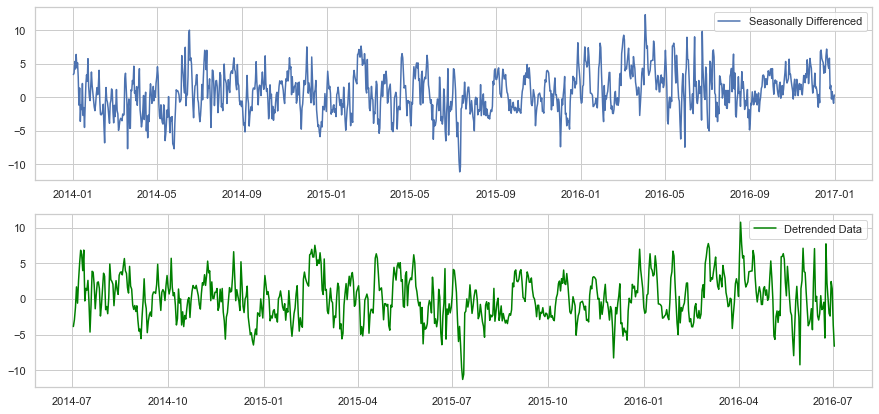

In [247]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply seasonal decomposition
decomposition = seasonal_decompose(seasonally_diff, model='additive', period=365)

# Get the trend component
trend = decomposition.trend

# Detrend by subtracting the trend component from the seasonally differenced data
detrended = seasonally_diff - trend

# Plot the original and the detrended data
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(seasonally_diff, label='Seasonally Differenced')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(detrended.dropna(), label='Detrended Data', color='green')
plt.legend(loc='best')
plt.show()


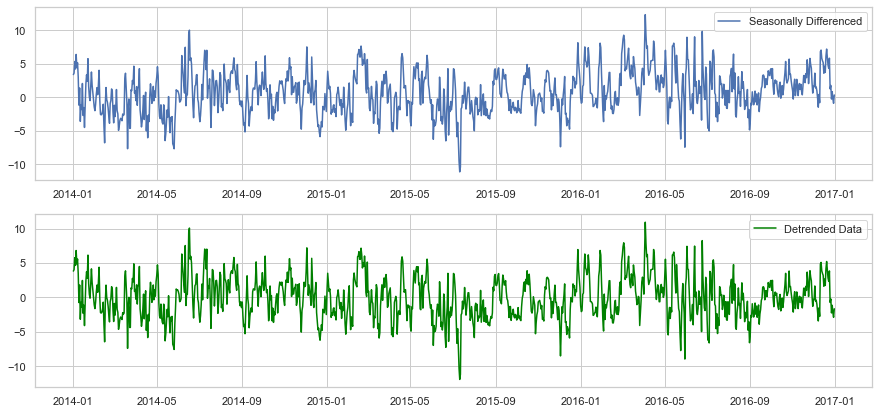

In [248]:
import statsmodels.api as sm

# Add a constant term for the intercept of the linear trend model
X = sm.add_constant(np.arange(len(seasonally_diff)))

# Fit the linear trend model
model = sm.OLS(seasonally_diff, X)
results = model.fit()

# Get the predicted trend from the model
predicted_trend = results.predict(X)

# Detrend by subtracting the predicted trend from the seasonally differenced data
detrended = seasonally_diff - predicted_trend

# Plot the original and the detrended data
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(seasonally_diff, label='Seasonally Differenced')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(detrended, label='Detrended Data', color='green')
plt.legend(loc='best')
plt.show()


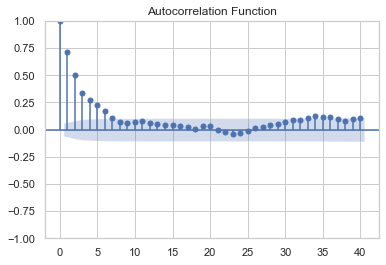

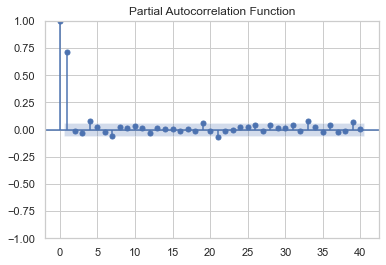

In [249]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Assuming 'detrended' is your detrended time series
plot_acf(detrended.dropna(), lags=40)
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(detrended.dropna(), lags=40)
plt.title('Partial Autocorrelation Function')
plt.show()


In [250]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    result = adfuller(timeseries.dropna())
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

# Call this function on your detrended time series
adf_test(detrended)


ADF Statistic: -10.571972
p-value: 0.000000
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


In [251]:
from statsmodels.tsa.stattools import kpss

def kpss_test(timeseries):
    statistic, p_value, n_lags, critical_values = kpss(timeseries.dropna())
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print('Critical Values:')
    for key, value in critical_values.items():
        print(f'    {key} : {value}')

# Call this function on your detrended time series
kpss_test(detrended)


KPSS Statistic: 0.11780549375379108
p-value: 0.1
Critical Values:
    10% : 0.347
    5% : 0.463
    2.5% : 0.574
    1% : 0.739


In [252]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (example: order (1,1,1))
# You will have to determine the best order (p,d,q) for your ARIMA model
model = ARIMA(detrended.dropna(), order=(1,1,1))
fit = model.fit()

# Display the summary
print(fit.summary())


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1096
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2384.977
Date:                Sat, 27 Jan 2024   AIC                           4775.955
Time:                        12:43:50   BIC                           4790.950
Sample:                    01-01-2014   HQIC                          4781.629
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7182      0.019     38.324      0.000       0.681       0.755
ma.L1         -0.9998      0.047    -21.201      0.000      -1.092      -0.907
sigma2         4.5433      0.237     19.183      0.0

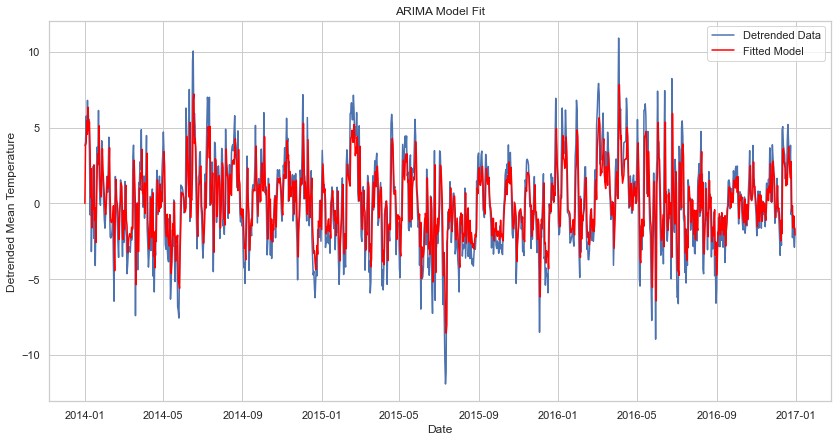

In [253]:
plt.figure(figsize=(14, 7))
plt.plot(detrended.index, detrended, label='Detrended Data')
plt.plot(detrended.index, fit.predict(start=detrended.index[0], end=detrended.index[-1]), color='red', label='Fitted Model')
plt.xlabel('Date')
plt.ylabel('Detrended Mean Temperature')
plt.title('ARIMA Model Fit')
plt.legend()
plt.show()


In [264]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model to your training dataset (weather_data_train['meantemp'])
# Assuming you have already determined the order (p,d,q)
model = ARIMA(weather_data['meantemp'], order=(1,0,1))
fit = model.fit()


In [265]:
# Generate predictions for the length of the test set
predictions = fit.get_forecast(steps=len(test_data['meantemp']))
predictions_df = predictions.summary_frame()


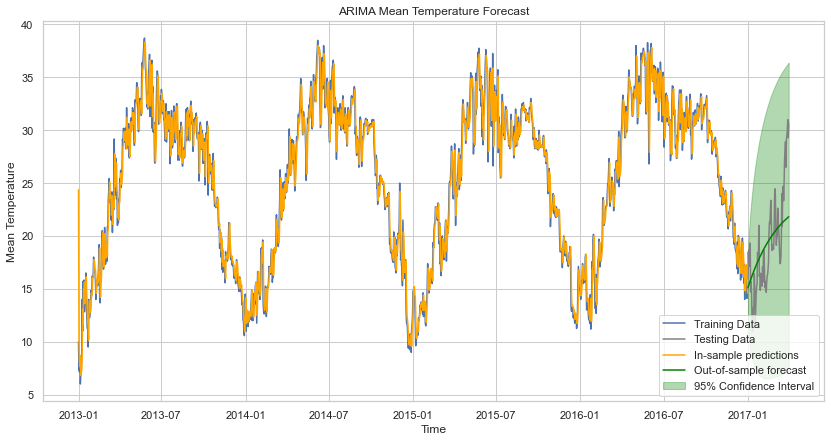

In [267]:
plt.figure(figsize=(14, 7))

# Plot the observed data
plt.plot(weather_data['meantemp'], label='Training Data')
plt.plot(test_data['meantemp'], label='Testing Data', color='gray')

# Plot the in-sample predictions
plt.plot(fit.predict(start=weather_data['meantemp'].index[0], 
                     end=weather_data['meantemp'].index[-1]), 
         color='orange', label='In-sample predictions')

# Plot the out-of-sample forecast
plt.plot(test_data.index, predictions_df['mean'], color='green', label='Out-of-sample forecast')

# Plot the confidence intervals
plt.fill_between(test_data.index, predictions_df['mean_ci_lower'], predictions_df['mean_ci_upper'], 
                 color='green', alpha=0.3, label='95% Confidence Interval')

plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.title('ARIMA Mean Temperature Forecast')
plt.legend()
plt.savefig("arima_detrend.png")
plt.show()


# TODO: DETRENDING!!!!!!!!!!!!!!!!!!!!!!!

<u>Note</u>: These two tests are not interchangeble, considering their different assumptions/null hypotheses. It is always better to apply both of them, so that it can be ensured that the series is truly stationary. Possible outcomes of applying these stationary tests are as follows:

- **Case 1**: Both tests conclude that the series is not stationary - The series is not stationary

- **Case 2**: Both tests conclude that the series is stationary - The series is stationary

- **Case 3**: KPSS indicates stationarity and ADF indicates non-stationarity -> The series is trend stationary: it requires differencing or other transformations to remove the trend. The resulting series is checked for stationarity

- **Case 4:** KPSS indicates non-stationarity and ADF indicates stationarity ->  The series is difference stationary: it requires differencing. The differenced series is checked for stationarity.


Verifying to which case our time series belongs to is an essential step before applying ARIMA models as well as for understanding the differencing order. Differencing represents one of the simplest methods for detrending a time series. An advantage of differencing over detrending is that no parameters are estimated in the differences operation. However, this might represent also a disadvantage if we want to utilize an estimate of the trend at some point. However, if the main goal is force data to stationarity, differencing may be the most appropriate.

- **Augmented Dickey-Fuller**: The ADF test indicated that the original series is non-stationary, but the seasonally differenced is stationary.
- **Kwiatkowski-Phillips-Schmidt-Shin**: The KPSS test with regression='c' indicated that the original data is trend stationary, but the seasonally differenced data is not trend stationary. However, with regression='ct', both the original and seasonally differenced series are trend stationary.

Given these test results, it appears that seasonal differencing has addressed the issue of non-stationarity, and further differencing, such as first-order differencing may not be necessary. In fact, the KPSS test suggests that additional differencing might make the series **over-differenced**.

In [96]:
# Applying first-order differencing
# first_order_diff = seasonally_diff.diff().dropna()

# plt.figure(figsize=(15, 7))
# plt.plot(first_order_diff)
# plt.xlabel('Year')
# plt.ylabel('First-order differenced mean temperature values');

# fig, ax = plt.subplots(1, 2, figsize=(15,5))
# plot_acf(first_order_diff, lags=36, ax=ax[0]);
# plot_pacf(first_order_diff, lags=36, ax=ax[1]);

In [213]:
# Test stationarity
result_ADF = adfuller(seasonally_diff)
print('ADF Statistic:', result_ADF[0])
print('ADF p-value:', result_ADF[1])

kpss_test = kpss(seasonally_diff, regression='ct', nlags='auto', store=True)
print('KPSS Statistic:', kpss_test[0])
print('p-value: ', kpss_test[1])

# Time series is stationary -> we do not perform further differencing on the data 
# Non-seasonal: AR(2)
# Seasonal: MA(1)

ADF Statistic: -10.083577750822784
ADF p-value: 1.1712029219574221e-17
KPSS Statistic: 0.11780549375379115
p-value:  0.1


# Step 4: Model Building and Evaluation

In [235]:
train_data = weather_data
test_data = pd.read_csv("Weather_ForecastingTest.csv", na_values='', sep=',', index_col='date', parse_dates=['date'])

## Box-Jenkins method
When dealing with the family of ARIMA models, it is important to remember the **Box-Jenkins methodology** to find the best fit of a time series model. The approach starts with the assumption that the process that generated the time series can be approximated using a model from the ARIMA family. Starting from the available time series and use separate train/test sets, the process includes the following steps:

**1.   Identification:** as initial step, it is important to determine if our time series is seasonal and find the seasonal period, verify the stationarity and eventually apply appropriate transformations to reduce the variance. When data have a strong seasonal pattern, seasonal differencing should be used as first step. Once stationarity and seasonality have been addressed, the next step is to identify the order (p,d,q) of ARIMA models by relying on ACF/PACF plots and on appropriate criteria for model selection, such as AIC, AICc and BIC; 

**2.   Model estimation:**  Once the model order has been identied, the model parameter are estimated generally using maximum likelihood estimation;

**3.   Model diagnostic:** After fitting the model, conduct goodness-of-fit checks to ensure the model describes the data adequately. In particular the residuals are taken and it is assessed whether they are white noise and they are normally distributed. ACF plot of the residuals can help in this respect, along with statistics as the Ljung-Box test.
If the assumed model is appropriate for the data, the residuals should satisfy these assumptions. If they are not satisfied, we have to go back to the model identification step and try to develop a better model; 

**4.   Forecasting:** If the model is good, we can finally perform the forecasting analyses in our separate test set, and perform all the performance evalutations (e.g., MAE, MSE, MAPE, R2).

Now that stationarity and seasonality have been addressed, the next step is to identify the order (p,d,q) of ARIMA models by relying on ACF/PACF plots and on appropriate criteria for model selection, such as AIC, AICc and BIC; 

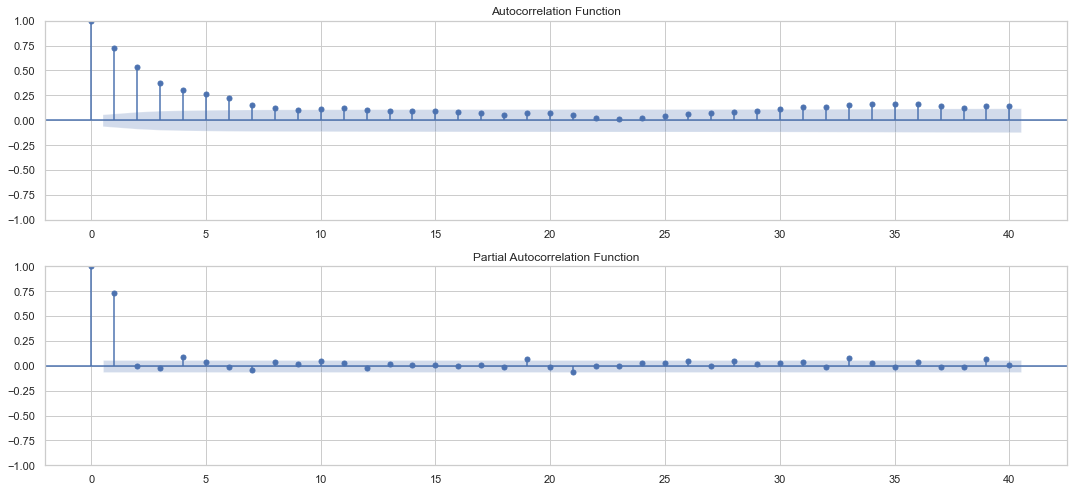

In [214]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 7))

plot_acf(seasonally_diff, lags=40, ax=ax1)
ax1.set_title('Autocorrelation Function')
plot_pacf(seasonally_diff, lags=40, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')
plt.tight_layout()
plt
plt.show()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.04823D+00    |proj g|=  6.44871D-01

At iterate    5    f=  1.93554D+00    |proj g|=  6.07541D-01


 This problem is unconstrained.



At iterate   10    f=  1.90045D+00    |proj g|=  1.65621D-01

At iterate   15    f=  1.89778D+00    |proj g|=  2.08337D-01

At iterate   20    f=  1.89622D+00    |proj g|=  3.69987D-02

At iterate   25    f=  1.89619D+00    |proj g|=  3.84793D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     38      1     0     0   3.875D-05   1.896D+00
  F =   1.8961853081894771     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Results                                     
Dep. Variable:                          meantemp   No. Observations:                 

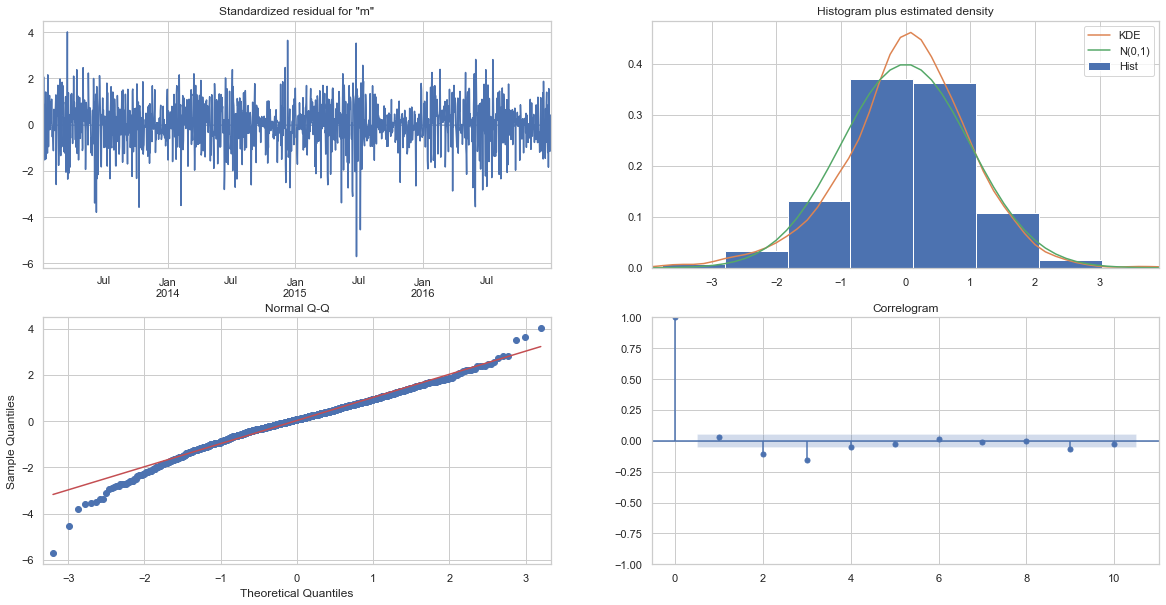

In [110]:
# Fit the model with the selected parameters - SARIMA model 
[p,d,q] = [1,0,1]
[P,D,Q,S] = [1,0,1,7]
model_SARIMA = SARIMAX(weather_data['meantemp'], 
                       order=(p,d,q), 
                       seasonal_order=(P,D,Q,S), 
                       enforce_stationarity=False,
                       enforce_invertibility=False)
result_SARIMA = model_SARIMA.fit()

# Verify the residuals
print(result_SARIMA.summary()) 
result_SARIMA.plot_diagnostics(figsize=(20, 10));


In [222]:
# Further possibility to choose the model parameters - Auto-ARIMA - Bic
! pip install pmdarima
from pmdarima.arima import auto_arima

arima_model =  auto_arima(seasonally_diff,start_p=0, d=0, start_q=0, 
                          max_p=6, max_q=6, m=1, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,information_criterion='bic')

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=5687.631, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=5144.911, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=4926.278, Time=0.05 sec
 ARIMA(0,0,3)(0,0,0)[0]             : BIC=4867.790, Time=0.07 sec
 ARIMA(0,0,4)(0,0,0)[0]             : BIC=4854.939, Time=0.09 sec
 ARIMA(0,0,5)(0,0,0)[0]             : BIC=4854.344, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=4801.574, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=4808.551, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=4815.282, Time=0.09 sec
 ARIMA(1,0,3)(0,0,0)[0]             : BIC=4811.347, Time=0.

In [246]:
# Model parameter estimations - AR(2) process with coefficients 0.33 and 0.5 
mod_AR2 = ARIMA(seasonally_diff, order=(1,0,0)).fit() 
# trend option: default is ‘c’ for models without integration, and 'n' for models with integration

# Visualize the statistics and main results 
print(mod_AR2.summary()) # To print all the summary results 
print('Estimated Coefficients:', mod_AR2.params) # To print only the coefficients

# Note: sigma2 is the variance of the residuals

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


To verify whether the model we have defined and estimated is a good one, it is important to evaluate the residuals before performing subsequent forecasting. Important tests are: 

* **Ljung-Box	Q-Test** -> tests for the presence of autocorrelation in the residuals
* **Durbin-Watson Test** --> tests for the presence of autocorrelation. As indicated in the corresponding Python documentation, the test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. For r == 0 (no serial correlation) the test statistic equals 2. This statistic will always be between 0 and 4. Values closer to 0 indicate positive serial correlation. Values closer to 4 indicate negative serial correlation. 
* **Jarque-Bera Test**	-> tests whether the residuals are normally distributed	(null hypothesis = data are normally distributed). However, JB test works properly in large samples (usually > 2000 observations)

In [224]:
# Ljung-Box Q-Test --> Check for the presence of autocorrelation 
LB_AR2 = acorr_ljungbox(mod_AR2.resid, lags=[14], return_df=True) # [] to consider a single lag, otherwise it will return the values for all the lags up to that number
print('LB p-value for residuals', float(LB_AR2['lb_pvalue']))
print('----------------------------')

# Durbin-Watson Test --> Check for the presence of autocorrelation
dw_google = durbin_watson(mod_AR2.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

# Jarque-Bera Test --> Check if the sample data has the skewness and kurtosis matching a normal distribution.
jb_statistic = stats.jarque_bera(mod_AR2.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

LB p-value for residuals 0.1398684192565934
----------------------------
DW statistic for residuals: 1.9911155967694043
----------------------------
JB p-value for residuals: 0.0


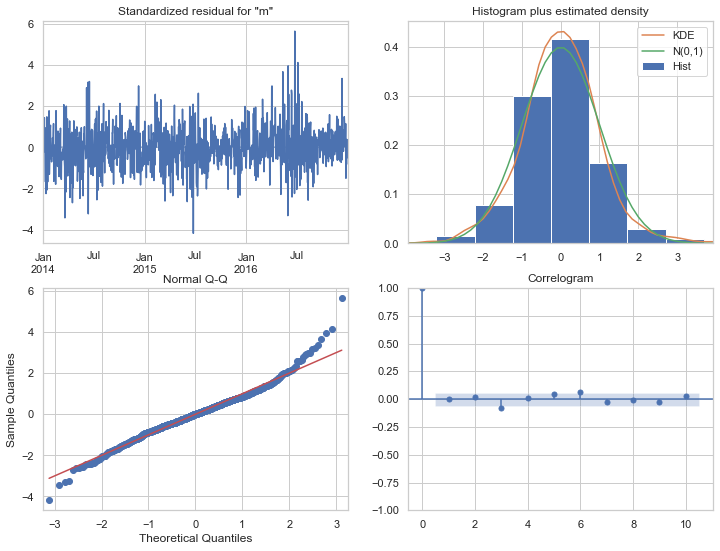

In [225]:
# To automatically visualise different information related to the residuals
mod_AR2.plot_diagnostics(figsize=(12,9));

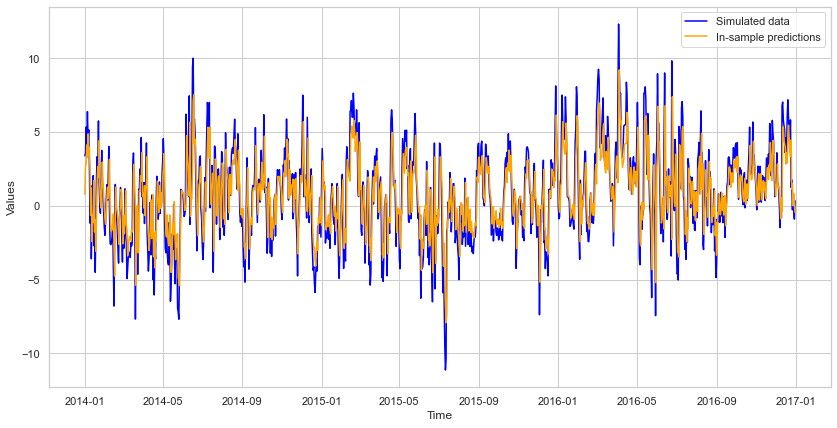

In [229]:
# Plot data with in-sample predictions from ARIMA(2,0,0) model
plt.figure(figsize=(14, 7))
plt.plot(seasonally_diff, color='blue',label='Simulated data')
plt.plot(mod_AR2.fittedvalues, color='orange', label='In-sample predictions')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend();

meantemp,mean,mean_se,mean_ci_lower,mean_ci_upper
2014-07-21,3.170904,2.138703,-1.020877,7.362686
2014-07-22,3.075923,2.138703,-1.115859,7.267705
2014-07-23,1.760796,2.138703,-2.430986,5.952577
2014-07-24,-0.694108,2.138703,-4.885890,3.497673
2014-07-25,0.789063,2.138703,-3.402719,4.980844
2014-07-26,1.979984,2.138703,-2.211798,6.171765
2014-07-27,2.038434,2.138703,-2.153348,6.230215
2014-07-28,1.358951,2.138703,-2.832830,5.550733
2014-07-29,-1.461266,2.138703,-5.653048,2.730516
2014-07-30,-0.336102,2.138703,-4.527883,3.855680


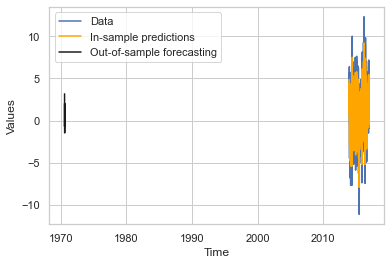

In [242]:
# Forecasting out-of-sample data, 10 points after the end of the time series
prediction_AR2 = mod_AR2.get_prediction(start=201, end=210)
df = prediction_AR2.summary_frame()
display(df)

plt.plot(seasonally_diff[:],'-b', label='Data')
plt.plot(mod_AR2.fittedvalues, 'orange', label='In-sample predictions')
plt.plot(list(range(201,211)), df['mean'],'-k',label='Out-of-sample forecasting')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend();

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38008D+00    |proj g|=  1.75118D-01

At iterate    5    f=  1.30197D+00    |proj g|=  1.06151D-02

At iterate   10    f=  1.30117D+00    |proj g|=  2.65485D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   2.655D-06   1.301D+00
  F =   1.3011706484770891     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


ValueError: x and y must have same first dimension, but have shapes (1461,) and (48,)

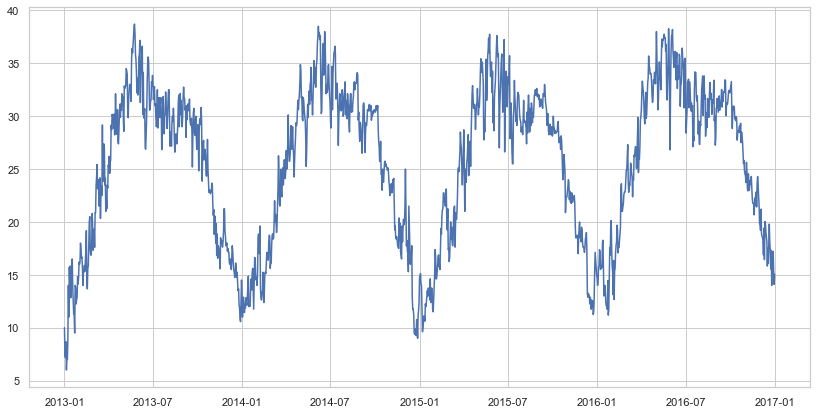

In [245]:
# Assuming 'model_fitted' is your fitted SARIMAX model object
# and 'train_data' and 'test_data' are your dataframes with 'meantemp' column.

# Fit the SARIMAX model
model_fitted = model.fit()

# Forecasting out-of-sample data
forecast_results = model_fitted.get_forecast(steps=len(test_data))
forecast_df = forecast_results.conf_int()  # Gets the confidence interval for the forecast
forecast_df['mean'] = forecast_results.predicted_mean  # Gets the forecast mean

# Assuming 'mod_AR2' is another fitted model you've used for comparison
# Generate out-of-sample predictions for mod_AR2 if you have this model
# prediction_AR2 = mod_AR2.get_prediction(start=201, end=210)
# df_AR2 = prediction_AR2.summary_frame()

# Create a range object for test_data index if it's not already a list or similar iterable
test_data_range = range(len(train_data), len(train_data) + len(test_data))

plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(train_data.index, train_data['meantemp'], '-b', label='Training Data')
plt.plot(train_data.index, model_fitted.fittedvalues, 'orange', label='In-sample predictions')

# Plot the out-of-sample forecasting
plt.plot(test_data.index, forecast_df['mean'], '-k', label='Out-of-sample forecast')

# Plot the confidence intervals
plt.fill_between(test_data.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='gray', alpha=0.3, label='95% Confidence Interval')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Forecast')
plt.legend()

plt.show()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38008D+00    |proj g|=  1.75118D-01

At iterate    5    f=  1.30197D+00    |proj g|=  1.06151D-02

At iterate   10    f=  1.30117D+00    |proj g|=  2.65485D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   2.655D-06   1.301D+00
  F =   1.3011706484770891     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


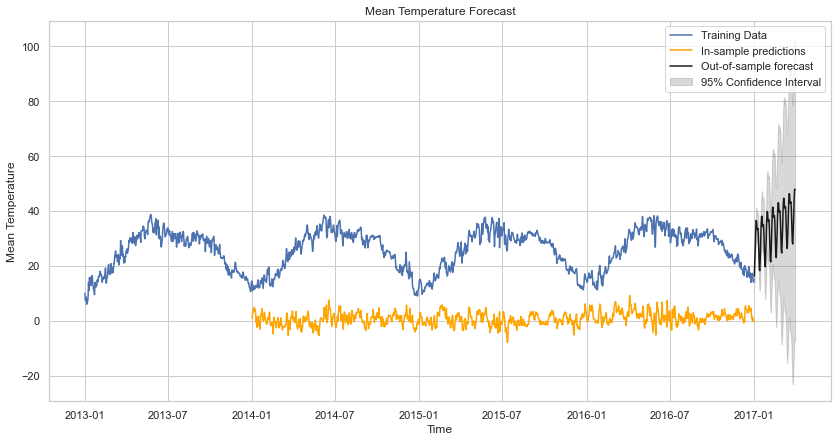

In [238]:
# Fit the SARIMAX model
model_fitted = model.fit()

# Forecasting out-of-sample data
forecast_results = model_fitted.get_forecast(steps=len(test_data))
forecast_df = forecast_results.conf_int()  # Gets the confidence interval for the forecast
forecast_df['mean'] = forecast_results.predicted_mean  # Gets the forecast mean

plt.figure(figsize=(14, 7))

# Plot the training data
plt.plot(train_data['meantemp'], '-b', label='Training Data')
plt.plot(mod_AR2.fittedvalues, 'orange', label='In-sample predictions')
# Plot the out-of-sample forecasting
plt.plot(test_data.index, forecast_df['mean'], '-k', label='Out-of-sample forecast')

plt.fill_between(test_data.index, forecast_df['lower meantemp'], forecast_df['upper meantemp'], color='gray', alpha=0.3, label='95% Confidence Interval')

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Mean Temperature')
plt.title('Mean Temperature Forecast')
plt.legend()

plt.show()


In [35]:
from statsmodels.tsa.arima.model import ARIMA

# Example: ARIMA model with p=1, d=0, q=1
model = ARIMA(seasonally_diff, order=(1, 0, 1))

# Fit the model
result = model.fit()

# Summary of the model
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1096
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2388.709
Date:                Fri, 26 Jan 2024   AIC                           4785.418
Time:                        22:38:40   BIC                           4805.416
Sample:                    01-01-2014   HQIC                          4792.985
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7865      0.241      3.260      0.001       0.314       1.259
ar.L1          0.7280      0.030     24.537      0.000       0.670       0.786
ma.L1          0.0057      0.040      0.141      0.8

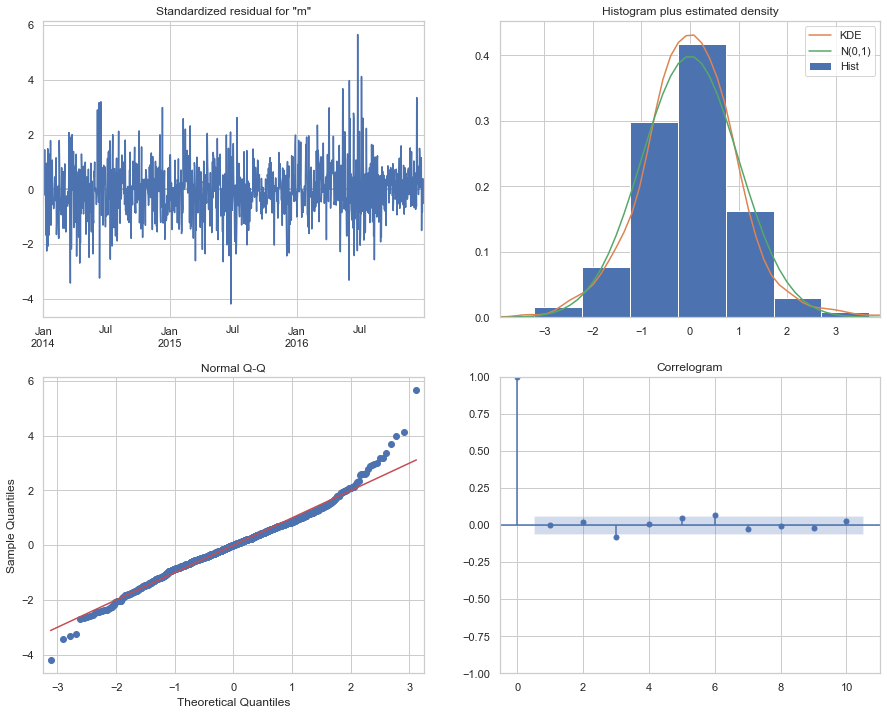

In [36]:
# Model diagnostics
result.plot_diagnostics(figsize=(15, 12))
plt.show()


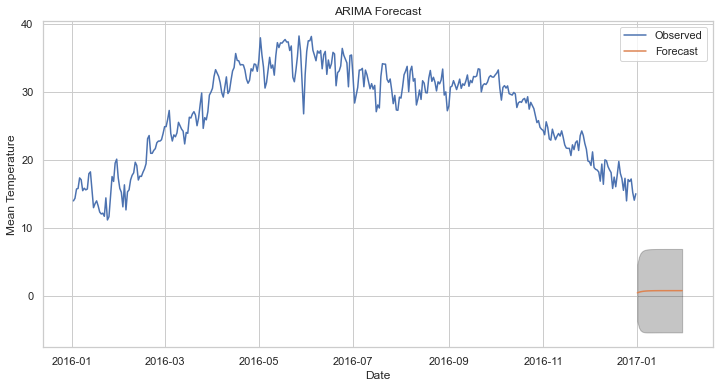

In [195]:
# Forecasting
forecast = result.get_forecast(steps=30)
forecast_mean = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(weather_data['meantemp'][-365:], label='Observed')
plt.plot(forecast_mean, label='Forecast')
plt.fill_between(forecast_conf_int.index,
                 forecast_conf_int.iloc[:, 0],
                 forecast_conf_int.iloc[:, 1], color='k', alpha=.25)
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()


# Step 4: Model Building and Evaluation

In [131]:
train = weather_data['meantemp'].dropna()  
test = test_data['meantemp'].dropna()

In [ ]:
! pip install pmdarima
from pmdarima.arima import auto_arima

arima_model =  auto_arima(train,start_p=0, d=0, start_q=0, 
                          max_p=6, max_q=6, m=1, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,information_criterion='aicc')

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
train = pd.read_csv("Weather_ForecastingTrain.csv", na_values='', sep=',', index_col='date', parse_dates=['date'])
test = pd.read_csv("Weather_ForecastingTest.csv", na_values='', sep=',', index_col='date', parse_dates=['date'])

In [ ]:
# Assuming 'weather_data' is your DataFrame and 'meantemp' is the column you want to model
train_data = weather_data['meantemp'].dropna()  # Make sure to remove NA values
test_data = test['meantemp'].dropna()

In [100]:
# Further possibility to choose the model parameters - Auto-ARIMA 
! pip install pmdarima
from pmdarima.arima import auto_arima

arima_model =  auto_arima(train_data,start_p=0, d=0, start_q=0, 
                          max_p=6, max_q=6, m=1, seasonal=False, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = False,
                          random_state=20,information_criterion='aicc')

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


NameError: name 'train_data' is not defined

In [ ]:
# Grid search to define the optimal ARIMA (p,d,q) parameters
AICc = np.zeros((36,3))
idx = 0 
d = 0 
for p in range(6):
  for q in range(6):
    mod = ARIMA(train_data, order=(p,d,q)).fit()
    AICc[idx,0] = p
    AICc[idx,1] = q
    AICc[idx,2] = mod.aicc
    idx += 1 
    
order_df = pd.DataFrame(AICc, columns=['p', 'q', 'AICc'])
display(order_df)

# Best combination leading to the lowest AICc
opt = order_df[order_df['AICc']==order_df['AICc'].min()]
display(opt)
p_opt = opt['p']
q_opt = opt['q']

In [ ]:
# Model estimation and diagnostic plots for residuals 
model = ARIMA(train_data, order=(float(p_opt),0,float(q_opt))).fit()
print(model.summary())
model.plot_diagnostics(figsize=(12,8));

In [ ]:
# Forecasting for the test set data
predictions = model.get_prediction(start='2017-01-01', end='2017-03-31') 
df = predictions.summary_frame()

In [ ]:


# Fit the model
model = arima_model(train_data, order=(6,1,4)) 
model_fit = model.fit()

In [ ]:
# Forecast
forecast = model_fit.forecast(steps=len(test))

In [ ]:
# Evaluate forecasts
mae = mean_absolute_error(test_data, forecast)
mse = mean_squared_error(test_data, forecast)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mape = np.mean(np.abs(forecast - test_data)/np.abs(test_data))  # MAPE
r2 = r2_score(test_data, forecast)

In [ ]:
# Print performance metrics
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Percentage Error:', mape)
print('R-squared:', r2)

In [ ]:
# Plot forecast against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Actual')
plt.plot(test_data.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual')
plt.xlabel('Date')
plt.ylabel('Values')
plt.legend()
plt.show()


In [198]:
from statsmodels.tsa.arima.model import ARIMA

mod_AR_data = ARIMA(train, order=(1,0,1)).fit() 
 
print(mod_AR_data.summary())
print('Estimated Coefficients:', mod_AR_data.params)

                               SARIMAX Results                                
Dep. Variable:               meantemp   No. Observations:                 1461
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2790.758
Date:                Sat, 27 Jan 2024   AIC                           5589.515
Time:                        01:44:44   BIC                           5610.663
Sample:                    01-01-2013   HQIC                          5597.404
                         - 12-31-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.3679      2.091     11.653      0.000      20.269      28.466
ar.L1          0.9856      0.004    226.696      0.000       0.977       0.994
ma.L1         -0.2046      0.021     -9.819      0.0

In [44]:
LB_AR_data = acorr_ljungbox(mod_AR_data.resid, lags=[14], return_df=True) 
print('LB p-value for residuals', float(LB_AR_data['lb_pvalue']))
print('----------------------------')

dw_google = durbin_watson(mod_AR_data.resid)
print('DW statistic for residuals:', dw_google)
print('----------------------------')

jb_statistic = stats.jarque_bera(mod_AR_data.resid)
print('JB p-value for residuals:', jb_statistic.pvalue)

NameError: name 'acorr_ljungbox' is not defined

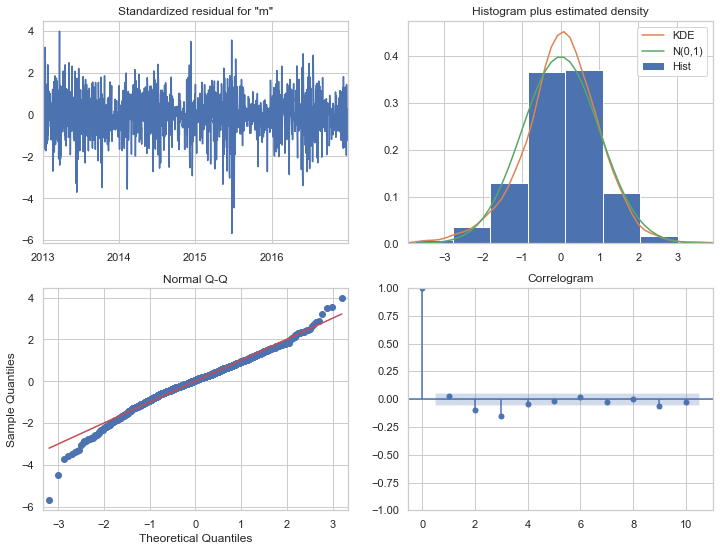

In [45]:
mod_AR_data.plot_diagnostics(figsize=(12,9));

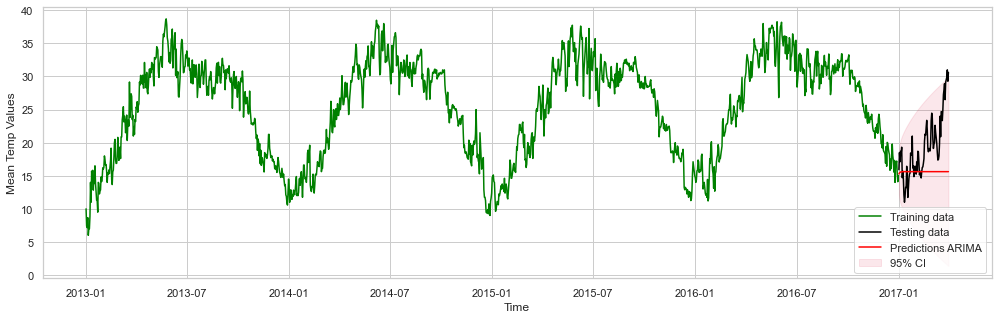

In [197]:
model_ARIMA = mod_AR_data.get_prediction(start=test.index[0], end=test.index[-1])
df_manual_data = model_ARIMA.summary_frame()

plt.figure(figsize=(17, 5)) 
plt.plot(train, color='green',label='Training data')
plt.plot(test, color='black', label='Testing data')
plt.plot(df_manual_data['mean'], color='red', label='Predictions ARIMA')
plt.fill_between(df_manual_data.index, df_manual_data['mean_ci_lower'], df_manual_data['mean_ci_upper'], alpha=.1, color='crimson', label='95% CI')
plt.xlabel('Time')
plt.ylabel('Mean Temp Values')
plt.legend();

# SARIMA Model for average monthly temperatures 

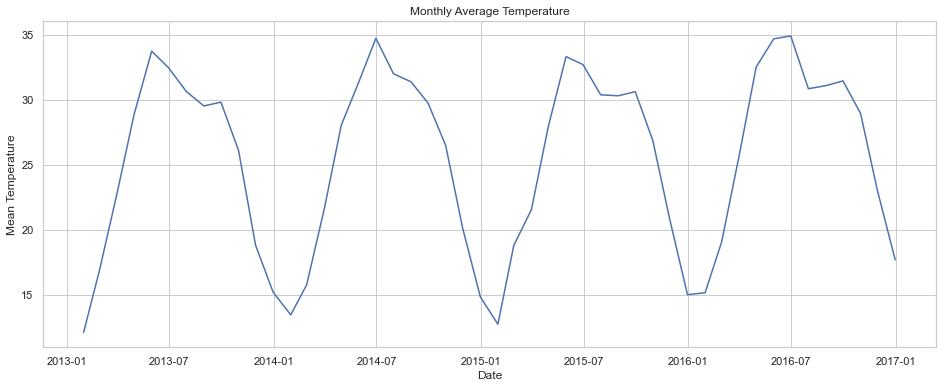

In [162]:
monthly_train_data = weather_data['meantemp'].resample('M').mean()

fig = plt.figure(figsize=(16,6))
sns.lineplot(x=monthly_train_data.index, y=monthly_train_data)
plt.title('Monthly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()

In [164]:
def adfuller_test(monthly_train_data):
  adf_test = adfuller(monthly_train_data,autolag='AIC') 
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on Mean Temperature')
adfuller_test(monthly_train_data)

ADF on Mean Temperature
ADF Statistic: 0.2919004290281272
p-value:  0.976969816059066
Critical Values:
	1%: -3.621
	5%: -2.944
	10%: -2.610
We cannot reject the null hypothesis (H0) --> data is non-stationary


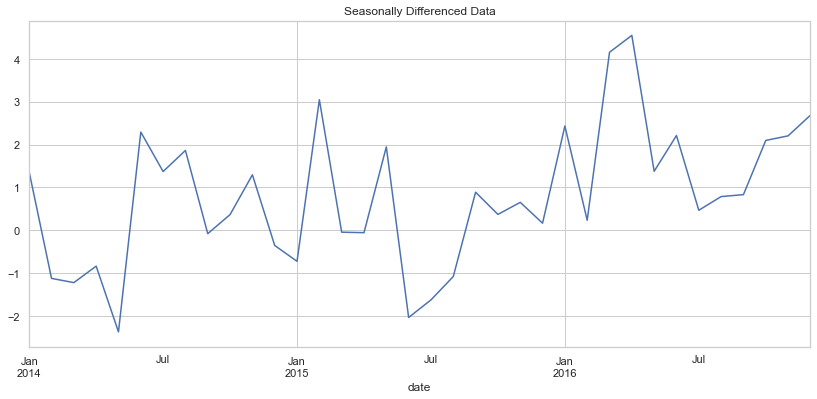

In [185]:
fig = plt.figure(figsize=(14,6))
seasonal_monthly_diff = monthly_train_data.diff(12).dropna()
seasonal_monthly_diff.plot()
plt.title('Seasonally Differenced Data')
plt.show()

In [186]:
adfuller_test(seasonal_monthly_diff)
# WRONG: ACF and PACF of our time series when differenced normally.  #estimated order: (2, 1, 2)

ADF Statistic: -4.139278809346
p-value:  0.0008334430264262366
Critical Values:
	1%: -3.633
	5%: -2.949
	10%: -2.613
We can reject the null hypothesis (H0) --> data is stationary


In [187]:
def kpss_test(monthly_train_data):
  kpss_out = kpss(monthly_train_data,regression='c', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Monthly Mean Temperature')
kpss_test(monthly_train_data)
print('--------------------------------------')
print('KPSS on Monthly Mean Temperature seasonal difference')
kpss_test(seasonal_monthly_diff)

KPSS on Monthly Mean Temperature
KPSS Statistic: 0.06742285884075873
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Monthly Mean Temperature seasonal difference
KPSS Statistic: 0.4806162231121914
p-value:  0.046032382181938884
We can reject the null hypothesis (H0) --> data is not trend stationary


In [188]:
def kpss_test(monthly_train_data):
  kpss_out = kpss(monthly_train_data,regression='ct', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Monthly Mean Temperature')
kpss_test(monthly_train_data)
print('--------------------------------------')
print('KPSS on Monthly Mean Temperature seasonal difference')
kpss_test(seasonal_monthly_diff)

KPSS on Monthly Mean Temperature
KPSS Statistic: 0.03099304289760658
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary
--------------------------------------
KPSS on Monthly Mean Temperature seasonal difference
KPSS Statistic: 0.0778565589790402
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


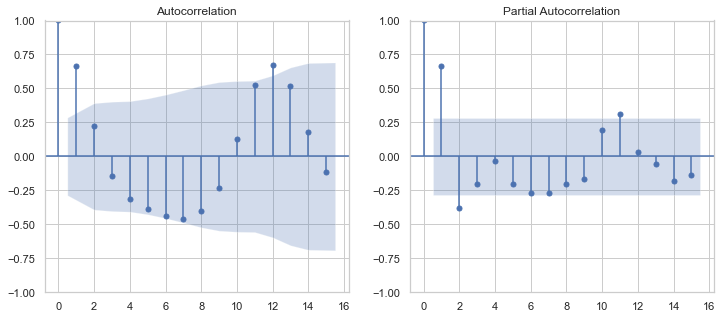

In [279]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(monthly_data.diff().dropna(), lags =15, ax=ax1)
plot_pacf(monthly_data.diff().dropna(), lags = 15, ax=ax2)
plt.show()

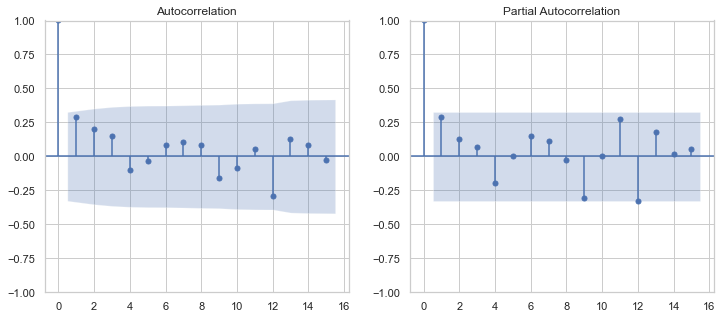

In [190]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(seasonal_monthly_diff, lags=15, ax=ax1)
plot_pacf(seasonal_monthly_diff, lags=15, ax=ax2)
plt.show()
# ACF and PACF of the seasonally differenced data.  #estimated order: (3, 1, 3, 12)

In [191]:
# Import itertools.product and SARIMAX algorithm
from itertools import product
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Set parameter range
p = range(0,3)
q = range(0,3)
d = range(0,2)
s = [12]
# Find all parameter combos
pdq = list(product(p, d, q))
seasonal_pdq = list(product(p, d, q, s))
# Create SARIMA model for each order and seasonal order
aics = []
for order in pdq:
    for seasonal_order in seasonal_pdq:
        try:
            model = SARIMAX(seasonal_monthly_diff, order=order, seasonal_order=seasonal_order)
            results = model.fit()
            aics.append((order, seasonal_order, results.aic))
        except:
            print('SARIMA{},{} - Skipped'.format(order, seasonal_order))
# Check for smallest AIC
aics.sort(key=lambda x: x[2])
print(aics[0])

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99973D+00    |proj g|=  3.12990D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   3.130D-06   2.000D+00
  F =   1.9997318560997843     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.0

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56648D+00    |proj g|=  2.93297D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      4      6      1     0     0   3.883D-06   1.564D+00
  F =   1.5642015205435358     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.6

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   5.518D-06   1.974D+00
  F =   1.9737851598288398     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01516D+00    |proj g|=  2.04123D-01

At iterate    5    f=  1.97379D+00    |proj g|=  6.35134D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61493D+00    |proj g|=  1.95127D-01

At iterate    5    f=  1.56420D+00    |proj g|=  5.27479D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      6      8      1     0     0   3.228D-06   1.564D+00
  F =   1.5642015146602111     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.85086D+00    |proj g|=  6.78524D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   6.785D-07   1.851D+00
  F =   1.8508567308573280     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.94068D+00    |proj g|=  2.42656D-01

At iterate    5    f=  1.84148D+00    |proj g|=  6.90652D-02

At iterate   10    f=  1.82966D+00    |proj g|=  1.03176D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  1.53849D+00    |proj g|=  5.23242D-04

At iterate   30    f=  1.53848D+00    |proj g|=  2.34606D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     30     35      1     0     0   2.346D-04   1.538D+00
  F =   1.5384847164818085     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60650D+00    |proj g|=  1.65106D-01

At iterate    5    f=  1.53048D+00    |proj g|=  7.36631D-03

At itera

 This problem is unconstrained.



At iterate   15    f=  1.53002D+00    |proj g|=  2.12715D-03

At iterate   20    f=  1.53000D+00    |proj g|=  5.53442D-04

At iterate   25    f=  1.52999D+00    |proj g|=  1.20913D-04

At iterate   30    f=  1.52998D+00    |proj g|=  4.11313D-04

At iterate   35    f=  1.52998D+00    |proj g|=  4.92140D-04

At iterate   40    f=  1.52998D+00    |proj g|=  1.11351D-04

At iterate   45    f=  1.52998D+00    |proj g|=  1.35810D-04

At iterate   50    f=  1.52998D+00    |proj g|=  2.21255D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     62      1     0     0   2.213D-04   1.530D+00
  F =   1.52997566846

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.82913D+00    |proj g|=  5.41714D-03

At iterate   25    f=  1.82906D+00    |proj g|=  2.46007D-03

At iterate   30    f=  1.82903D+00    |proj g|=  2.06621D-03

At iterate   35    f=  1.82902D+00    |proj g|=  1.60690D-03

At iterate   40    f=  1.82901D+00    |proj g|=  4.11772D-04

At iterate   45    f=  1.82901D+00    |proj g|=  4.37997D-04

At iterate   50    f=  1.82901D+00    |proj g|=  8.91260D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   8.913D-05   1.829D+00
  F =   1.8290112681497075     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.53082D+00    |proj g|=  1.04938D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   6.477D-06   1.531D+00
  F =   1.5308197446983740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60650D+00    |proj g|=  1.65106D-01

At iterate    5    f=  1.53044D+00    |proj g|=  5.05785D-03

At iterate   10    f=  1.53037D+00    |proj g|=  1.91247D-03

At iter

 This problem is unconstrained.


At iterate   10    f=  1.53044D+00    |proj g|=  3.18431D-03

At iterate   15    f=  1.53025D+00    |proj g|=  1.33655D-03

At iterate   20    f=  1.53018D+00    |proj g|=  1.66342D-03

At iterate   25    f=  1.53014D+00    |proj g|=  1.32556D-03

At iterate   30    f=  1.53009D+00    |proj g|=  1.64852D-03

At iterate   35    f=  1.53003D+00    |proj g|=  6.57672D-04

At iterate   40    f=  1.53000D+00    |proj g|=  1.23379D-03

At iterate   45    f=  1.52998D+00    |proj g|=  1.33139D-03

At iterate   50    f=  1.52997D+00    |proj g|=  1.10356D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61    

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.83021D+00    |proj g|=  2.15105D-03

At iterate   25    f=  1.83007D+00    |proj g|=  1.25435D-03

At iterate   30    f=  1.83005D+00    |proj g|=  1.34444D-03

At iterate   35    f=  1.83002D+00    |proj g|=  1.03925D-03

At iterate   40    f=  1.83000D+00    |proj g|=  6.21869D-04

At iterate   45    f=  1.82999D+00    |proj g|=  9.61108D-04

At iterate   50    f=  1.82999D+00    |proj g|=  4.52854D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61      1     0     0   4.529D-04   1.830D+00
  F =   1.8299858671680456     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  1.83018D+00    |proj g|=  1.30451D-03

At iterate   10    f=  1.82973D+00    |proj g|=  1.35756D-02

At iterate   15    f=  1.82924D+00    |proj g|=  7.97038D-03

At iterate   20    f=  1.82898D+00    |proj g|=  4.25310D-03

At iterate   25    f=  1.82888D+00    |proj g|=  2.75294D-03

At iterate   30    f=  1.82882D+00    |proj g|=  3.81692D-03

At iterate   35    f=  1.82875D+00    |proj g|=  1.09921D-03

At iterate   40    f=  1.82870D+00    |proj g|=  2.52598D-03

At iterate   45    f=  1.82868D+00    |proj g|=  3.24896D-03

At iterate   50    f=  1.82867D+00    |proj g|=  6.21939D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.53093D+00    |proj g|=  6.15591D-03

At iterate   10    f=  1.53055D+00    |proj g|=  9.99908D-03

At iterate   15    f=  1.52990D+00    |proj g|=  4.68629D-03

At iterate   20    f=  1.52961D+00    |proj g|=  3.78407D-03

At iterate   25    f=  1.52955D+00    |proj g|=  2.70114D-03

At iterate   30    f=  1.52952D+00    |proj g|=  3.45074D-03

At iterate   35    f=  1.52950D+00    |proj g|=  1.82951D-03

At iterate   40    f=  1.52949D+00    |proj g|=  9.21592D-04

At iterate   45    f=  1.52948D+00    |proj g|=  2.68190D-03

At iterate   50    f=  1.52947D+00    |proj g|=  2.05853D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  1.53008D+00    |proj g|=  4.74347D-03

At iterate   20    f=  1.52971D+00    |proj g|=  1.60668D-03

At iterate   25    f=  1.52960D+00    |proj g|=  6.06992D-03

At iterate   30    f=  1.52954D+00    |proj g|=  1.86730D-03

At iterate   35    f=  1.52951D+00    |proj g|=  1.18600D-03

At iterate   40    f=  1.52950D+00    |proj g|=  2.64555D-03

At iterate   45    f=  1.52948D+00    |proj g|=  1.31822D-03

At iterate   50    f=  1.52947D+00    |proj g|=  6.05595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   6.056D-04   1.529D+00
  F =   1.52947190112

 This problem is unconstrained.



At iterate   15    f=  1.52993D+00    |proj g|=  3.19162D-03

At iterate   20    f=  1.52969D+00    |proj g|=  1.98181D-03

At iterate   25    f=  1.52961D+00    |proj g|=  2.97244D-03

At iterate   30    f=  1.52956D+00    |proj g|=  3.80466D-03

At iterate   35    f=  1.52953D+00    |proj g|=  3.24266D-03

At iterate   40    f=  1.52951D+00    |proj g|=  1.17108D-03

At iterate   45    f=  1.52949D+00    |proj g|=  9.94660D-04

At iterate   50    f=  1.52948D+00    |proj g|=  3.00124D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     66      1     0     0   3.001D-03   1.529D+00
  F =   1.52948323939

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.77176D+00    |proj g|=  2.78879D-03

At iterate   15    f=  1.77108D+00    |proj g|=  5.14668D-03

At iterate   20    f=  1.77098D+00    |proj g|=  1.81624D-03

At iterate   25    f=  1.77096D+00    |proj g|=  1.08292D-03

At iterate   30    f=  1.77095D+00    |proj g|=  1.13828D-03

At iterate   35    f=  1.77095D+00    |proj g|=  1.63060D-04

At iterate   40    f=  1.77095D+00    |proj g|=  7.71000D-05

At iterate   45    f=  1.77095D+00    |proj g|=  2.55409D-04

At iterate   50    f=  1.77095D+00    |proj g|=  2.24702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


    4     34     44      1     0     0   1.042D-04   1.533D+00
  F =   1.5333601734186153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61496D+00    |proj g|=  2.44778D-01

At iterate    5    f=  1.52358D+00    |proj g|=  2.55098D-02

At iterate   10    f=  1.52067D+00    |proj g|=  2.70891D-03

At iterate   15    f=  1.52046D+00    |proj g|=  1.14389D-03

At iterate   20    f=  1.52042D+00    |proj g|=  8.77463D-04

At iterate   25    f=  1.52036D+00    |proj g|=  1.08540D-03

At iterate   30    f=  1.52036D+00    |proj g|=  1.18728D-04

At iterate   35    f=  1.52036D+00    |proj g|=  2.99131D-04

At iterate   40    f=  1.52036D+00    |proj g|=  4.91959D-04

At iterate   45    f=  1.52036D+00    |proj g|=  8.15399D-05

           * * *

Tit   = total number of iterations
Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.77329D+00    |proj g|=  9.08167D-03

At iterate   15    f=  1.77105D+00    |proj g|=  3.28238D-03

At iterate   20    f=  1.77081D+00    |proj g|=  1.72433D-03

At iterate   25    f=  1.77069D+00    |proj g|=  4.78139D-03

At iterate   30    f=  1.77066D+00    |proj g|=  3.65014D-03

At iterate   35    f=  1.77065D+00    |proj g|=  3.41017D-04

At iterate   40    f=  1.77065D+00    |proj g|=  1.16591D-03

At iterate   45    f=  1.77064D+00    |proj g|=  3.47073D-04

At iterate   50    f=  1.77064D+00    |proj g|=  2.05392D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.52020D+00    |proj g|=  1.24022D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     35      1     0     0   2.648D-05   1.520D+00
  F =   1.5201983654219626     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61496D+00    |proj g|=  2.44778D-01

At iterate    5    f=  1.52089D+00    |proj g|=  1.68165D-02


 This problem is unconstrained.



At iterate   10    f=  1.52021D+00    |proj g|=  1.17679D-04

At iterate   15    f=  1.52020D+00    |proj g|=  1.73733D-03

At iterate   20    f=  1.52020D+00    |proj g|=  2.75197D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     29      1     0     0   2.472D-05   1.520D+00
  F =   1.5201983619797110     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89980D+00    |proj g|=  3.02366D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.77669D+00    |proj g|=  1.92995D-03

At iterate   15    f=  1.77450D+00    |proj g|=  3.86206D-03

At iterate   20    f=  1.77399D+00    |proj g|=  4.72182D-03

At iterate   25    f=  1.77376D+00    |proj g|=  2.58822D-03

At iterate   30    f=  1.77350D+00    |proj g|=  2.76779D-03

At iterate   35    f=  1.77346D+00    |proj g|=  2.39431D-03

At iterate   40    f=  1.77342D+00    |proj g|=  1.24911D-03

At iterate   45    f=  1.77341D+00    |proj g|=  5.65401D-04

At iterate   50    f=  1.77341D+00    |proj g|=  3.53280D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60   

 This problem is unconstrained.



At iterate   20    f=  1.76949D+00    |proj g|=  1.42164D-02

At iterate   25    f=  1.76891D+00    |proj g|=  3.84275D-03

At iterate   30    f=  1.76859D+00    |proj g|=  1.91423D-03

At iterate   35    f=  1.76851D+00    |proj g|=  6.89580D-03

At iterate   40    f=  1.76849D+00    |proj g|=  1.39220D-03

At iterate   45    f=  1.76849D+00    |proj g|=  3.35431D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     57      1     0     0   3.354D-04   1.768D+00
  F =   1.7684887016397726     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  1.52025D+00    |proj g|=  3.36778D-03

At iterate   20    f=  1.52020D+00    |proj g|=  1.28844D-03

At iterate   25    f=  1.52020D+00    |proj g|=  1.94194D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     29      1     0     0   4.121D-06   1.520D+00
  F =   1.5201983563577988     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61496D+00    |proj g|=  2.44778D-01


 This problem is unconstrained.



At iterate    5    f=  1.52173D+00    |proj g|=  3.30546D-02

At iterate   10    f=  1.52024D+00    |proj g|=  3.93901D-04

At iterate   15    f=  1.52022D+00    |proj g|=  2.29915D-03

At iterate   20    f=  1.52020D+00    |proj g|=  2.14061D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   1.096D-05   1.520D+00
  F =   1.5201983624413036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.52103D+00    |proj g|=  1.55072D-02

At iterate   10    f=  1.52024D+00    |proj g|=  3.85685D-04

At iterate   15    f=  1.52021D+00    |proj g|=  1.26797D-03

At iterate   20    f=  1.52020D+00    |proj g|=  2.94307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     24     27      1     0     0   3.706D-06   1.520D+00
  F =   1.5201983594024426     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.72856D+00    |proj g|=  1.96062D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     31      1     0     0   1.012D-05   1.729D+00
  F =   1.7285585001402206     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77437D+00    |proj g|=  1.23156D-01

At iterate    5    f=  1.73693D+00    |proj g|=  2.84537D-06

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.



At iterate   10    f=  1.55922D+00    |proj g|=  1.92318D-03

At iterate   15    f=  1.55849D+00    |proj g|=  1.43401D-03

At iterate   20    f=  1.55840D+00    |proj g|=  9.26883D-04

At iterate   25    f=  1.55839D+00    |proj g|=  2.88362D-04

At iterate   30    f=  1.55838D+00    |proj g|=  7.35377D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     32     54      1     0     0   3.994D-04   1.558D+00
  F =   1.5583837840187944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     20      1     0     0   8.816D-06   1.729D+00
  F =   1.7285585003473776     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53836D+00    |proj g|=  2.53524D-02

At iterate    5    f=  1.53699D+00    |proj g|=  3.53167D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.53699D+00    |proj g|=  7.77327D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     12      1     0     0   7.773D-06   1.537D+00
  F =   1.5369873624707155     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.74567D+00    |proj g|=  2.20402D-01

At iterate    5    f=  1.72857D+00    |proj g|=  2.02910D-03

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01419D+00    |proj g|=  5.26336D-01

At iterate    5    f=  1.73512D+00    |proj g|=  4.42704D-02

At iterate   10    f=  1.72856D+00    |proj g|=  4.47593D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     10     13      1     0     0   4.476D-06   1.729D+00
  F =   1.7285584996319505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73727D+00    |proj g|=  2.79187D-01

At iterate    5    f=  1.54768D+00    |proj g|=  6.15376D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     14      1     0     0   1.611D-06   1.537D+00
  F =   1.5369875339207262     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.54614D+00    |proj g|=  1.02805D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      9     11      1     0     0   1.241D-05   1.537D+00
  F =   1.5369875492599046     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85841D+00    |proj g|=  5.77470D-02

At iterate    5    f=  1.84381D+00    |proj g|=  4.69560D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85841D+00    |proj g|=  3.21486D-01

At iterate    5    f=  1.70289D+00    |proj g|=  4.03227D-02

At iterate   10    f=  1.69198D+00    |proj g|=  2.10058D-03

At iterate   15    f=  1.69148D+00    |proj g|=  1.89248D-02

At iterate   20    f=  1.69119D+00    |proj g|=  1.91727D-03

At iterate   25    f=  1.69115D+00    |proj g|=  1.40489D-03

At iterate   30    f=  1.69114D+00    |proj g|=  1.35084D-03

At iterate   35    f=  1.69113D+00    |proj g|=  1.02996D-03

At iterate   40    f=  1.69113D+00    |proj g|=  8.99700D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.48081D+00    |proj g|=  4.91465D-03

At iterate   10    f=  1.47991D+00    |proj g|=  6.21072D-04

At iterate   15    f=  1.47977D+00    |proj g|=  5.47907D-04

At iterate   20    f=  1.47976D+00    |proj g|=  4.84324D-04

At iterate   25    f=  1.47976D+00    |proj g|=  4.32734D-05

At iterate   30    f=  1.47976D+00    |proj g|=  1.03808D-05

At iterate   35    f=  1.47976D+00    |proj g|=  1.96215D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     51      1     0     0   1.935D-05   1.480D+00
  F =   1.4797578670473666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84010D+00    |proj g|=  2.33493D-01

At iterate    5    f=  1.73596D+00    |proj g|=  1.41567D-02

At iterate   10    f=  1.73489D+00    |proj g|=  4.74796D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   4.748D-06   1.735D+00
  F =   1.7348944489734075     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60740D+00    |proj g|=  1.30701D-01

At iterate    5    f=  1.48029D+00    |proj g|=  2.71097D-03

At iterate   10    f=  1.47979D+00    |proj g|=  5.06813D-04

At iterate   15    f=  1.47976D+00    |proj g|=  2.37567D-04

At iterate   20    f=  1.47976D+00    |proj g|=  1.64524D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     24     36      1     0     0   3.076D-05   1.480D+00
  F =   1.4797582991009590     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  1.47977D+00    |proj g|=  8.19281D-04

At iterate   20    f=  1.47976D+00    |proj g|=  3.73474D-04

At iterate   25    f=  1.47976D+00    |proj g|=  9.94747D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     38      1     0     0   8.015D-05   1.480D+00
  F =   1.4797581845217280     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80921D+00    |proj g|=  2.89992D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  1.68664D+00    |proj g|=  3.06217D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     15      1     0     0   3.096D-06   1.687D+00
  F =   1.6866358163072381     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85841D+00    |proj g|=  3.21486D-01

At iterate    5    f=  1.68859D+00    |proj g|=  2.64803D-02

At iterate   10    f=  1.68664D+00    |proj g|=  1.46773D-04

        

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.48095D+00    |proj g|=  3.81668D-03

At iterate   10    f=  1.47994D+00    |proj g|=  1.30920D-03

At iterate   15    f=  1.47977D+00    |proj g|=  3.96110D-04

At iterate   20    f=  1.47976D+00    |proj g|=  1.66845D-04

At iterate   25    f=  1.47976D+00    |proj g|=  2.69712D-05

At iterate   30    f=  1.47976D+00    |proj g|=  1.63653D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     38      1     0     0   8.182D-07   1.480D+00
  F =   1.4797579991017029     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.47987D+00    |proj g|=  2.14503D-03

At iterate   15    f=  1.47978D+00    |proj g|=  5.73775D-04

At iterate   20    f=  1.47976D+00    |proj g|=  4.28680D-04

At iterate   25    f=  1.47976D+00    |proj g|=  4.25656D-05

At iterate   30    f=  1.47976D+00    |proj g|=  3.00276D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     51      1     0     0   2.667D-05   1.480D+00
  F =   1.4797577077038995     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   10    f=  1.48007D+00    |proj g|=  1.03373D-03

At iterate   15    f=  1.47978D+00    |proj g|=  4.02388D-04

At iterate   20    f=  1.47976D+00    |proj g|=  3.12795D-04

At iterate   25    f=  1.47976D+00    |proj g|=  3.04111D-04

At iterate   30    f=  1.47976D+00    |proj g|=  7.59175D-05

At iterate   35    f=  1.47976D+00    |proj g|=  1.03644D-04

At iterate   40    f=  1.47976D+00    |proj g|=  1.11076D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     70      1     0     0   1.111D-05   1.480D+00
  F =   1.4797579657395501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.66358D+00    |proj g|=  4.34149D-03

At iterate   15    f=  1.66300D+00    |proj g|=  9.60456D-03

At iterate   20    f=  1.66288D+00    |proj g|=  1.96958D-03

At iterate   25    f=  1.66285D+00    |proj g|=  6.82374D-04

At iterate   30    f=  1.66284D+00    |proj g|=  4.06735D-04

At iterate   35    f=  1.66284D+00    |proj g|=  3.21463D-04

At iterate   40    f=  1.66284D+00    |proj g|=  1.42708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     44     51      1     0     0   7.487D-05   1.663D+00
  F =   1.6628412281583251     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.55541D+00    |proj g|=  1.03001D-02

At iterate   10    f=  1.55507D+00    |proj g|=  3.12463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   3.125D-06   1.555D+00
  F =   1.5550661627636966     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57591D+00    |proj g|=  2.30458D-01

At iterate    5    f=  1.48627D+00    |proj g|=  1.56403D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   45    f=  1.66551D+00    |proj g|=  9.80233D-05
  ys=-1.037E-07  -gs= 2.036E-08 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     79      2     1     0   1.943D-05   1.666D+00
  F =   1.6655134383542114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84995D+00    |proj g|=  3.60011D-01

At iterate    5    f=  1.67113D+00    |proj g|=  1.16109D-02

At iterate   10   


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f=  1.66188D+00    |proj g|=  2.46370D-03

At iterate   30    f=  1.66182D+00    |proj g|=  7.11319D-03

At iterate   35    f=  1.66174D+00    |proj g|=  2.60540D-03

At iterate   40    f=  1.66169D+00    |proj g|=  5.48287D-04

At iterate   45    f=  1.66169D+00    |proj g|=  6.82968D-04

At iterate   50    f=  1.66169D+00    |proj g|=  6.79470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     58      1     0     0   6.795D-04   1.662D+00
  F =   1.6616884418225162     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.46113D+00    |proj g|=  7.26603D-03

At iterate   10    f=  1.45781D+00    |proj g|=  1.42200D-03

At iterate   15    f=  1.45756D+00    |proj g|=  7.51915D-04

At iterate   20    f=  1.45753D+00    |proj g|=  4.83352D-04

At iterate   25    f=  1.45753D+00    |proj g|=  2.68435D-04

At iterate   30    f=  1.45753D+00    |proj g|=  1.66628D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     43      1     0     0   5.484D-05   1.458D+00
  F =   1.4575258465200176     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.45755D+00    |proj g|=  1.49040D-02

At iterate   15    f=  1.45561D+00    |proj g|=  2.30163D-03

At iterate   20    f=  1.45522D+00    |proj g|=  2.39229D-03

At iterate   25    f=  1.45513D+00    |proj g|=  2.91263D-03

At iterate   30    f=  1.45508D+00    |proj g|=  1.31603D-03

At iterate   35    f=  1.45506D+00    |proj g|=  1.54021D-03

At iterate   40    f=  1.45504D+00    |proj g|=  6.81320D-04

At iterate   45    f=  1.45502D+00    |proj g|=  1.91261D-03

At iterate   50    f=  1.45501D+00    |proj g|=  9.70739D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.66076D+00    |proj g|=  4.84494D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     16      1     0     0   2.050D-05   1.661D+00
  F =   1.6606969503195763     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84995D+00    |proj g|=  3.60011D-01

At iterate    5    f=  1.66694D+00    |proj g|=  4.23646D-02

At iterate   10    f=  1.66091D+00    |proj g|=  4.69824D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57591D+00    |proj g|=  2.30455D-01

At iterate    5    f=  1.46168D+00    |proj g|=  2.47283D-02

At iterate   10    f=  1.45810D+00    |proj g|=  1.69873D-02

At iterate   15    f=  1.45414D+00    |proj g|=  5.88036D-03

At iterate   20    f=  1.45369D+00    |proj g|=  1.06726D-02

At iterate   25    f=  1.45348D+00    |proj g|=  3.47087D-03

At iterate   30    f=  1.45338D+00    |proj g|=  1.13916D-02

At iterate   35    f=  1.45331D+00    |proj g|=  7.20191D-03

At iterate   40    f=  1.45327D+00    |proj g|=  1.80383D-03

At iterate   45    f=  1.45323D+00    |proj g|=  8.12050D-03

At iterate   50    f=  1.45321D+00    |proj g|=  2.01529D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  1.45890D+00    |proj g|=  1.23782D-02

At iterate   15    f=  1.45502D+00    |proj g|=  1.32018D-02

At iterate   20    f=  1.45405D+00    |proj g|=  1.40771D-02

At iterate   25    f=  1.45365D+00    |proj g|=  1.10597D-02

At iterate   30    f=  1.45347D+00    |proj g|=  1.18324D-02

At iterate   35    f=  1.45337D+00    |proj g|=  3.64088D-03

At iterate   40    f=  1.45331D+00    |proj g|=  1.59799D-02

At iterate   45    f=  1.45326D+00    |proj g|=  1.18612D-02

At iterate   50    f=  1.45323D+00    |proj g|=  7.26009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61   

 This problem is unconstrained.



At iterate    5    f=  1.46345D+00    |proj g|=  3.42826D-02

At iterate   10    f=  1.45960D+00    |proj g|=  2.47672D-02

At iterate   15    f=  1.45499D+00    |proj g|=  8.60848D-03

At iterate   20    f=  1.45411D+00    |proj g|=  1.09693D-02

At iterate   25    f=  1.45375D+00    |proj g|=  3.40068D-03

At iterate   30    f=  1.45353D+00    |proj g|=  7.34128D-03

At iterate   35    f=  1.45340D+00    |proj g|=  2.23830D-03

At iterate   40    f=  1.45335D+00    |proj g|=  1.41685D-02

At iterate   45    f=  1.45329D+00    |proj g|=  1.58200D-03

At iterate   50    f=  1.45326D+00    |proj g|=  6.62796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.76085D+00    |proj g|=  3.76162D-04

At iterate   30    f=  1.76085D+00    |proj g|=  2.38370D-04

At iterate   35    f=  1.76085D+00    |proj g|=  1.05453D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     38     39      1     0     0   2.276D-05   1.761D+00
  F =   1.7608452932530478     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90714D+00    |proj g|=  3.57431D-01

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.51763D+00    |proj g|=  1.78917D-02

At iterate   10    f=  1.51553D+00    |proj g|=  3.41176D-03

At iterate   15    f=  1.51527D+00    |proj g|=  1.47548D-03

At iterate   20    f=  1.51523D+00    |proj g|=  1.68921D-03

At iterate   25    f=  1.51521D+00    |proj g|=  2.24582D-04

At iterate   30    f=  1.51520D+00    |proj g|=  5.64407D-04

At iterate   35    f=  1.51520D+00    |proj g|=  5.19202D-05

At iterate   40    f=  1.51519D+00    |proj g|=  1.78173D-04

At iterate   45    f=  1.51519D+00    |proj g|=  7.28632D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     49     66   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.72265D+00    |proj g|=  4.11139D-02

At iterate   10    f=  1.71956D+00    |proj g|=  1.37097D-02

At iterate   15    f=  1.71701D+00    |proj g|=  3.67403D-03

At iterate   20    f=  1.71645D+00    |proj g|=  2.47344D-03

At iterate   25    f=  1.71630D+00    |proj g|=  2.90536D-03

At iterate   30    f=  1.71628D+00    |proj g|=  2.25349D-03

At iterate   35    f=  1.71627D+00    |proj g|=  1.27812D-03

At iterate   40    f=  1.71626D+00    |proj g|=  8.52400D-04

At iterate   45    f=  1.71626D+00    |proj g|=  4.69585D-04

At iterate   50    f=  1.71626D+00    |proj g|=  1.95288D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60567D+00    |proj g|=  1.76594D-01

At iterate    5    f=  1.51393D+00    |proj g|=  1.17269D-02

At iterate   10    f=  1.51355D+00    |proj g|=  3.85782D-03

At iterate   15    f=  1.51274D+00    |proj g|=  3.78948D-03

At iterate   20    f=  1.51238D+00    |proj g|=  3.24683D-03

At iterate   25    f=  1.51222D+00    |proj g|=  6.50631D-03

At iterate   30    f=  1.51215D+00    |proj g|=  1.24045D-03

At iterate   35    f=  1.51211D+00    |proj g|=  1.01776D-03

At iterate   40    f=  1.51209D+00    |proj g|=  4.72773D-04

At iterate   45    f=  1.51208D+00    |proj g|=  8.77391D-04

At iterate   50    f=  1.51207D+00    |proj g|=  2.71328D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.87848D+00    |proj g|=  3.06574D-01

At iterate    5    f=  1.72083D+00    |proj g|=  2.15696D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     10      1     0     0   5.897D-06   1.721D+00
  F =   1.7206269088211821     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   10    f=  1.71824D+00    |proj g|=  3.32817D-02

At iterate   15    f=  1.71281D+00    |proj g|=  3.33874D-02

At iterate   20    f=  1.70951D+00    |proj g|=  1.24433D-02

At iterate   25    f=  1.70839D+00    |proj g|=  1.66286D-02

At iterate   30    f=  1.70802D+00    |proj g|=  1.17240D-02

At iterate   35    f=  1.70788D+00    |proj g|=  8.96243D-03

At iterate   40    f=  1.70782D+00    |proj g|=  8.49448D-03

At iterate   45    f=  1.70780D+00    |proj g|=  7.28395D-03

At iterate   50    f=  1.70780D+00    |proj g|=  6.17366D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

 This problem is unconstrained.



At iterate   10    f=  1.51248D+00    |proj g|=  6.68019D-03

At iterate   15    f=  1.51208D+00    |proj g|=  2.17997D-03

At iterate   20    f=  1.51205D+00    |proj g|=  1.46066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     25      1     0     0   1.173D-05   1.512D+00
  F =   1.5120488820022173     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60567D+00    |proj g|=  1.76594D-01


 This problem is unconstrained.



At iterate    5    f=  1.51329D+00    |proj g|=  1.88270D-02

At iterate   10    f=  1.51246D+00    |proj g|=  6.86504D-03

At iterate   15    f=  1.51210D+00    |proj g|=  1.61816D-03

At iterate   20    f=  1.51205D+00    |proj g|=  3.73928D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     23      1     0     0   1.426D-05   1.512D+00
  F =   1.5120488863633970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  1.51318D+00    |proj g|=  1.39314D-02

At iterate   10    f=  1.51232D+00    |proj g|=  5.35814D-03

At iterate   15    f=  1.51206D+00    |proj g|=  5.78222D-04

At iterate   20    f=  1.51205D+00    |proj g|=  1.15596D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     40      1     0     0   1.156D-05   1.512D+00
  F =   1.5120488889344423     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.72119D+00    |proj g|=  7.40585D-03

At iterate   15    f=  1.71571D+00    |proj g|=  5.15795D-02

At iterate   20    f=  1.71275D+00    |proj g|=  3.17948D-04

At iterate   25    f=  1.71272D+00    |proj g|=  3.98328D-03

At iterate   30    f=  1.71269D+00    |proj g|=  1.45740D-03

At iterate   35    f=  1.71268D+00    |proj g|=  1.10717D-03

At iterate   40    f=  1.71268D+00    |proj g|=  5.55103D-04

At iterate   45    f=  1.71268D+00    |proj g|=  9.52274D-05

At iterate   50    f=  1.71268D+00    |proj g|=  8.49506D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.52867D+00    |proj g|=  2.31136D-02

At iterate   10    f=  1.51439D+00    |proj g|=  3.23131D-03

At iterate   15    f=  1.51362D+00    |proj g|=  1.95177D-03

At iterate   20    f=  1.51344D+00    |proj g|=  1.23183D-03

At iterate   25    f=  1.51336D+00    |proj g|=  1.25931D-03

At iterate   30    f=  1.51334D+00    |proj g|=  1.09689D-03

At iterate   35    f=  1.51333D+00    |proj g|=  4.56932D-04

At iterate   40    f=  1.51333D+00    |proj g|=  1.53067D-04

At iterate   45    f=  1.51332D+00    |proj g|=  3.65367D-05

At iterate   50    f=  1.51332D+00    |proj g|=  8.13217D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.72093D+00    |proj g|=  2.71901D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     33      1     0     0   8.298D-06   1.721D+00
  F =   1.7209299145031556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88041D+00    |proj g|=  3.29722D-01

At iterate    5    f=  1.73682D+00    |proj g|=  4.79269D-02

At iterate   10    f=  1.72737D+00    |proj g|=  2.31161D-02

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.51641D+00    |proj g|=  2.18348D-02

At iterate   10    f=  1.51235D+00    |proj g|=  1.86304D-03

At iterate   15    f=  1.51114D+00    |proj g|=  6.38455D-03

At iterate   20    f=  1.51000D+00    |proj g|=  4.60286D-03

At iterate   25    f=  1.50933D+00    |proj g|=  2.55260D-03

At iterate   30    f=  1.50902D+00    |proj g|=  5.67747D-03

At iterate   35    f=  1.50884D+00    |proj g|=  4.03613D-03

At iterate   40    f=  1.50876D+00    |proj g|=  2.36973D-03

At iterate   45    f=  1.50873D+00    |proj g|=  1.11128D-03

At iterate   50    f=  1.50870D+00    |proj g|=  1.10109D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.51662D+00    |proj g|=  4.32747D-02

At iterate   10    f=  1.51112D+00    |proj g|=  1.23994D-02

At iterate   15    f=  1.50932D+00    |proj g|=  4.12630D-03

At iterate   20    f=  1.50812D+00    |proj g|=  1.42085D-02

At iterate   25    f=  1.50747D+00    |proj g|=  2.91604D-03

At iterate   30    f=  1.50727D+00    |proj g|=  2.51070D-03

At iterate   35    f=  1.50720D+00    |proj g|=  1.39229D-03

At iterate   40    f=  1.50719D+00    |proj g|=  2.62652D-04

At iterate   45    f=  1.50719D+00    |proj g|=  2.79680D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     47     55   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.71606D+00    |proj g|=  1.56534D-02

At iterate   10    f=  1.71568D+00    |proj g|=  2.40819D-03

At iterate   15    f=  1.71470D+00    |proj g|=  7.25338D-03

At iterate   20    f=  1.71457D+00    |proj g|=  5.07181D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   5.072D-06   1.715D+00
  F =   1.7145722820874016     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88041D+00    |proj g|=  3.29722D-01

At iterate    5    f=  1.73398D+00    |proj g|=  6.51906D-02

At iterate   10    f=  1.71959D+00    |proj g|=  6.01020D-02

At iterate   15    f=  1.71001D+00    |proj g|=  2.37734D-02

At iterate   20    f=  1.70583D+00    |proj g|=  3.27478D-02

At iterate   25    f=  1.70017D+00    |proj g|=  7.38348D-03

At iterate   30    f=  1.70012D+00    |proj g|=  1.82494D-03

At iterate   35    f=  1.69995D+00    |proj g|=  1.50707D-02

At iterate   40    f=  1.69977D+00    |proj g|=  1.19256D-02

At iterate   45    f=  1.69965D+00    |proj g|=  2.76676D-03

At iterate   50    f=  1.69960D+00    |proj g|=  7.73381D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60938D+00    |proj g|=  1.74976D-01

At iterate    5    f=  1.51634D+00    |proj g|=  3.83369D-02

At iterate   10    f=  1.51004D+00    |proj g|=  1.50293D-02

At iterate   15    f=  1.50651D+00    |proj g|=  1.35979D-02

At iterate   20    f=  1.50529D+00    |proj g|=  1.09098D-02

At iterate   25    f=  1.50477D+00    |proj g|=  3.12626D-03

At iterate   30    f=  1.50446D+00    |proj g|=  2.21878D-03

At iterate   35    f=  1.50434D+00    |proj g|=  8.54040D-03

At iterate   40    f=  1.50425D+00    |proj g|=  1.57557D-02

At iterate   45    f=  1.50418D+00    |proj g|=  3.71994D-03

At iterate   50    f=  1.50411D+00    |proj g|=  1.60131D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60938D+00    |proj g|=  1.74980D-01

At iterate    5    f=  1.51459D+00    |proj g|=  2.25745D-02

At iterate   10    f=  1.50914D+00    |proj g|=  8.15008D-03

At iterate   15    f=  1.50696D+00    |proj g|=  4.99755D-03

At iterate   20    f=  1.50551D+00    |proj g|=  8.87237D-03

At iterate   25    f=  1.50481D+00    |proj g|=  5.27658D-03

At iterate   30    f=  1.50451D+00    |proj g|=  9.23192D-03

At iterate   35    f=  1.50436D+00    |proj g|=  1.06774D-02

At iterate   40    f=  1.50421D+00    |proj g|=  4.10532D-03

At iterate   45    f=  1.50414D+00    |proj g|=  7.39533D-03

At iterate   50    f=  1.50408D+00    |proj g|=  7.53059D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  1.50703D+00    |proj g|=  2.25825D-02

At iterate   20    f=  1.50551D+00    |proj g|=  1.38438D-02

At iterate   25    f=  1.50472D+00    |proj g|=  1.33579D-03

At iterate   30    f=  1.50454D+00    |proj g|=  1.03013D-02

At iterate   35    f=  1.50439D+00    |proj g|=  1.02178D-02

At iterate   40    f=  1.50424D+00    |proj g|=  1.06260D-03

At iterate   45    f=  1.50418D+00    |proj g|=  6.55744D-03

At iterate   50    f=  1.50413D+00    |proj g|=  1.69590D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   1.696D-02   1.504D+00
  F =   1.50412968395

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   20    f=  1.71992D+00    |proj g|=  4.50137D-03

At iterate   25    f=  1.71890D+00    |proj g|=  1.15263D-03

At iterate   30    f=  1.71874D+00    |proj g|=  8.58740D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     46      1     0     0   1.402D-04   1.719D+00
  F =   1.7187246486582219     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88343D+00    |proj g|=  3.74082D-01

At itera

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.52614D+00    |proj g|=  1.75599D-02

At iterate   20    f=  1.52368D+00    |proj g|=  4.68678D-03

At iterate   25    f=  1.52160D+00    |proj g|=  1.96814D-03

At iterate   30    f=  1.52103D+00    |proj g|=  5.53913D-04

At iterate   35    f=  1.52096D+00    |proj g|=  6.44692D-04

At iterate   40    f=  1.52095D+00    |proj g|=  8.85941D-04
  ys=-8.464E-07  -gs= 1.588E-06 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     71      1     1     0   2.257D-04   1.521D+00
  F =   1.5209410615544325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61141D+00    |proj g|=  2.58150D-01

At iterate    5    f=  1.51818D+00    |proj g|=  2.28057D-02

At iterate   10    f=  1.51101D+00    |proj g|=  1.28723D-02

At iterate   15    f=  1.50122D+00    |proj g|=  7.36926D-03

At iterate   20    f=  1.49538D+00    |proj g|=  5.58236D-03

At iterate   25    f=  1.49401D+00    |proj g|=  1.96801D-03

At iterate   30    f=  1.49355D+00    |proj g|=  4.74249D-03

At iterate   35    f=  1.49329D+00    |proj g|=  2.88292D-04

At iterate   40    f=  1.49329D+00    |proj g|=  2.67376D-03

At iterate   45    f=  1.49326D+00    |proj g|=  5.17126D-04

At iterate   50    f=  1.49326D+00    |proj g|=  2.82973D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78988D+00    |proj g|=  1.37119D-01

At iterate    5    f=  1.73522D+00    |proj g|=  6.89883D-03

At iterate   10    f=  1.73123D+00    |proj g|=  3.29429D-02

At iterate   15    f=  1.72921D+00    |proj g|=  7.25033D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     22      1     0     0   1.066D-05   1.729D+00
  F =   1.7292054682748705     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

 This problem is unconstrained.



At iterate   40    f=  1.49397D+00    |proj g|=  6.25582D-04

At iterate   45    f=  1.49397D+00    |proj g|=  2.18083D-04

At iterate   50    f=  1.49397D+00    |proj g|=  8.96427D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   8.964D-05   1.494D+00
  F =   1.4939667884322256     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61141D+00    |proj g|=  2.58150D-01

At iter

 This problem is unconstrained.



At iterate   20    f=  1.49777D+00    |proj g|=  8.90041D-03

At iterate   25    f=  1.49650D+00    |proj g|=  9.09005D-03

At iterate   30    f=  1.49612D+00    |proj g|=  2.71988D-03

At iterate   35    f=  1.49599D+00    |proj g|=  9.90043D-04

At iterate   40    f=  1.49591D+00    |proj g|=  1.38073D-03

At iterate   45    f=  1.49589D+00    |proj g|=  2.32978D-03

At iterate   50    f=  1.49587D+00    |proj g|=  4.32763D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   4.328D-04   1.496D+00
  F =   1.4958734844347130     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  1.51322D+00    |proj g|=  1.30131D-02

At iterate   10    f=  1.50884D+00    |proj g|=  1.41107D-02

At iterate   15    f=  1.50337D+00    |proj g|=  3.10875D-02

At iterate   20    f=  1.50042D+00    |proj g|=  7.14575D-03

At iterate   25    f=  1.49867D+00    |proj g|=  1.82922D-02

At iterate   30    f=  1.49771D+00    |proj g|=  1.19296D-02

At iterate   35    f=  1.49722D+00    |proj g|=  3.26482D-03

At iterate   40    f=  1.49700D+00    |proj g|=  6.27513D-03

At iterate   45    f=  1.49694D+00    |proj g|=  5.85871D-04

At iterate   50    f=  1.49689D+00    |proj g|=  2.83011D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88343D+00    |proj g|=  3.74082D-01

At iterate    5    f=  1.72058D+00    |proj g|=  1.19980D-02

At iterate   10    f=  1.71732D+00    |proj g|=  2.14095D-02

At iterate   15    f=  1.70826D+00    |proj g|=  2.13910D-02

At iterate   20    f=  1.70322D+00    |proj g|=  1.14371D-02

At iterate   25    f=  1.70137D+00    |proj g|=  5.30104D-03

At iterate   30    f=  1.70055D+00    |proj g|=  3.58526D-03

At iterate   35    f=  1.70038D+00    |proj g|=  1.23706D-03

At iterate   40    f=  1.70035D+00    |proj g|=  3.19570D-03

At iterate   45    f=  1.70034D+00    |proj g|=  1.45960D-03

At iterate   50    f=  1.70034D+00    |proj g|=  1.20849D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.71856D+00    |proj g|=  1.43077D-02

At iterate   10    f=  1.70714D+00    |proj g|=  6.20427D-02

At iterate   15    f=  1.70165D+00    |proj g|=  1.06049D-02

At iterate   20    f=  1.69681D+00    |proj g|=  8.42825D-03

At iterate   25    f=  1.69427D+00    |proj g|=  2.27302D-02

At iterate   30    f=  1.69359D+00    |proj g|=  2.20298D-02

At iterate   35    f=  1.69319D+00    |proj g|=  2.31456D-02

At iterate   40    f=  1.69304D+00    |proj g|=  2.45590D-03

At iterate   45    f=  1.69298D+00    |proj g|=  8.31272D-03

At iterate   50    f=  1.69292D+00    |proj g|=  1.17560D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61141D+00    |proj g|=  2.58147D-01

At iterate    5    f=  1.51386D+00    |proj g|=  2.38079D-02

At iterate   10    f=  1.50630D+00    |proj g|=  1.61607D-02

At iterate   15    f=  1.50009D+00    |proj g|=  3.44288D-03

At iterate   20    f=  1.49948D+00    |proj g|=  4.12808D-03

At iterate   25    f=  1.49906D+00    |proj g|=  6.85339D-03

At iterate   30    f=  1.49889D+00    |proj g|=  5.39607D-03

At iterate   35    f=  1.49882D+00    |proj g|=  4.66504D-03

At iterate   40    f=  1.49876D+00    |proj g|=  3.72499D-03

At iterate   45    f=  1.49874D+00    |proj g|=  1.03040D-03

At iterate   50    f=  1.49873D+00    |proj g|=  5.48735D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.61141D+00    |proj g|=  2.58150D-01

At iterate    5    f=  1.51063D+00    |proj g|=  1.41699D-02

At iterate   10    f=  1.50580D+00    |proj g|=  1.02367D-02

At iterate   15    f=  1.50137D+00    |proj g|=  1.77433D-02

At iterate   20    f=  1.50026D+00    |proj g|=  1.83286D-02

At iterate   25    f=  1.49933D+00    |proj g|=  3.03584D-02

At iterate   30    f=  1.49910D+00    |proj g|=  2.08409D-02

At iterate   35    f=  1.49892D+00    |proj g|=  8.97945D-03

At iterate   40    f=  1.49881D+00    |proj g|=  1.27427D-02

At iterate   45    f=  1.49878D+00    |proj g|=  8.90496D-03

At iterate   50    f=  1.49875D+00    |proj g|=  7.14009D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.51120D+00    |proj g|=  1.77736D-02

At iterate   10    f=  1.50461D+00    |proj g|=  4.01540D-02

At iterate   15    f=  1.50193D+00    |proj g|=  1.37042D-02

At iterate   20    f=  1.50075D+00    |proj g|=  1.33408D-02

At iterate   25    f=  1.49978D+00    |proj g|=  4.59585D-03

At iterate   30    f=  1.49915D+00    |proj g|=  2.82707D-02

At iterate   35    f=  1.49903D+00    |proj g|=  7.42537D-03

At iterate   40    f=  1.49885D+00    |proj g|=  1.33079D-02

At iterate   45    f=  1.49878D+00    |proj g|=  2.62476D-02

At iterate   50    f=  1.49875D+00    |proj g|=  5.64645D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.69668D+00    |proj g|=  2.54396D-03

At iterate   25    f=  1.69664D+00    |proj g|=  5.83515D-04

At iterate   30    f=  1.69663D+00    |proj g|=  1.22709D-03

At iterate   35    f=  1.69663D+00    |proj g|=  1.93833D-04

At iterate   40    f=  1.69663D+00    |proj g|=  2.20248D-04

At iterate   45    f=  1.69663D+00    |proj g|=  4.49882D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     47     65      1     0     0   6.421D-05   1.697D+00
  F =   1.6966291604400843     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.54300D+00    |proj g|=  1.32098D-03

At iterate   15    f=  1.54266D+00    |proj g|=  7.57428D-04

At iterate   20    f=  1.54262D+00    |proj g|=  4.99111D-04

At iterate   25    f=  1.54261D+00    |proj g|=  1.82440D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     28     36      1     0     0   1.048D-04   1.543D+00
  F =   1.5426129034073683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.69604D+00    |proj g|=  4.15791D-03

At iterate   25    f=  1.69589D+00    |proj g|=  2.23086D-03

At iterate   30    f=  1.69585D+00    |proj g|=  2.40336D-03

At iterate   35    f=  1.69582D+00    |proj g|=  4.65416D-03

At iterate   40    f=  1.69562D+00    |proj g|=  3.50838D-03

At iterate   45    f=  1.69557D+00    |proj g|=  1.00387D-04

At iterate   50    f=  1.69557D+00    |proj g|=  8.58044D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     58      1     0     0   8.580D-04   1.696D+00
  F =   1.6955726369059965     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.51687D+00    |proj g|=  4.33031D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   4.330D-07   1.517D+00
  F =   1.5168727651204124     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63347D+00    |proj g|=  2.40915D-01

At iterate    5    f=  1.51738D+00    |proj g|=  6.73370D-03

At iterate   10    f=  1.51716D+00    |proj g|=  5.38924D-03

At iter

 This problem is unconstrained.



At iterate   15    f=  1.51670D+00    |proj g|=  6.13605D-03

At iterate   20    f=  1.51627D+00    |proj g|=  2.75487D-03

At iterate   25    f=  1.51600D+00    |proj g|=  5.38372D-03

At iterate   30    f=  1.51582D+00    |proj g|=  4.38707D-03

At iterate   35    f=  1.51577D+00    |proj g|=  1.40607D-03

At iterate   40    f=  1.51574D+00    |proj g|=  2.38934D-03

At iterate   45    f=  1.51573D+00    |proj g|=  7.63794D-04

At iterate   50    f=  1.51572D+00    |proj g|=  5.73023D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     67      1     0     0   5.730D-04   1.516D+00
  F =   1.51572139132

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81206D+00    |proj g|=  2.85753D-01

At iterate    5    f=  1.69449D+00    |proj g|=  1.84214D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     12      1     0     0   3.595D-06   1.694D+00
  F =   1.6939748887861581     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 v

 This problem is unconstrained.



At iterate   15    f=  1.51617D+00    |proj g|=  5.52327D-03

At iterate   20    f=  1.51559D+00    |proj g|=  6.18982D-03

At iterate   25    f=  1.51539D+00    |proj g|=  2.79983D-03

At iterate   30    f=  1.51531D+00    |proj g|=  4.56493D-03

At iterate   35    f=  1.51528D+00    |proj g|=  1.53192D-03

At iterate   40    f=  1.51524D+00    |proj g|=  3.20140D-03

At iterate   45    f=  1.51521D+00    |proj g|=  2.58000D-03

At iterate   50    f=  1.51519D+00    |proj g|=  1.60716D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     50     68      1     0     0   1.607D-03   1.515D+00
  F =   1.51519304410

 This problem is unconstrained.



At iterate   15    f=  1.51576D+00    |proj g|=  8.76514D-03

At iterate   20    f=  1.51545D+00    |proj g|=  1.34383D-03

At iterate   25    f=  1.51534D+00    |proj g|=  1.48019D-03

At iterate   30    f=  1.51527D+00    |proj g|=  2.07426D-03

At iterate   35    f=  1.51523D+00    |proj g|=  4.04411D-03

At iterate   40    f=  1.51520D+00    |proj g|=  2.36674D-03

At iterate   45    f=  1.51517D+00    |proj g|=  1.49327D-03

At iterate   50    f=  1.51516D+00    |proj g|=  2.63411D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     68      1     0     0   2.634D-03   1.515D+00
  F =   1.51515960636

 This problem is unconstrained.



At iterate   15    f=  1.51567D+00    |proj g|=  2.49052D-03

At iterate   20    f=  1.51542D+00    |proj g|=  4.06624D-03

At iterate   25    f=  1.51533D+00    |proj g|=  4.41767D-03

At iterate   30    f=  1.51527D+00    |proj g|=  1.64441D-03

At iterate   35    f=  1.51523D+00    |proj g|=  3.33199D-03

At iterate   40    f=  1.51520D+00    |proj g|=  8.28057D-04

At iterate   45    f=  1.51518D+00    |proj g|=  2.46239D-03

At iterate   50    f=  1.51517D+00    |proj g|=  4.92475D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65      1     0     0   4.925D-03   1.515D+00
  F =   1.51517409408

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86726D+00    |proj g|=  3.20767D-01

At iterate    5    f=  1.66414D+00    |proj g|=  9.46148D-02

At iterate   10    f=  1.64239D+00    |proj g|=  1.43407D-02

At iterate   15    f=  1.64025D+00    |proj g|=  2.32910D-02

At iterate   20    f=  1.63948D+00    |proj g|=  7.25243D-03

At iterate   25    f=  1.63926D+00    |proj g|=  7.43219D-04

At iterate   30    f=  1.63919D+00    |proj g|=  3.07827D-03

At iterate   35    f=  1.63918D+00    |proj g|=  1.15774D-03

At iterate   40    f=  1.63918D+00    |proj g|=  9.88474D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     32     44      1     0     0   1.480D-04   1.477D+00
  F =   1.4774224551883439     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56769D+00    |proj g|=  1.69680D-01

At iterate    5    f=  1.47471D+00    |proj g|=  3.21141D-02

At iterate   10    f=  1.45727D+00    |proj g|=  8.90452D-03

At iterate   15    f=  1.45581D+00    |proj g|=  4.17457D-03

At iter

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.64329D+00    |proj g|=  2.04330D-03

At iterate   30    f=  1.64328D+00    |proj g|=  5.04091D-04

At iterate   35    f=  1.64327D+00    |proj g|=  6.32798D-04

At iterate   40    f=  1.64327D+00    |proj g|=  1.86157D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     51      1     0     0   2.294D-04   1.643D+00
  F =   1.6432713373780377     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.45413D+00    |proj g|=  4.18696D-04

At iterate   25    f=  1.45409D+00    |proj g|=  1.35798D-03

At iterate   30    f=  1.45408D+00    |proj g|=  4.92545D-04

At iterate   35    f=  1.45408D+00    |proj g|=  2.16624D-04

At iterate   40    f=  1.45408D+00    |proj g|=  5.06870D-04

At iterate   45    f=  1.45408D+00    |proj g|=  3.16301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     62      1     0     0   1.323D-04   1.454D+00
  F =   1.4540772295524687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.47575D+00    |proj g|=  3.13733D-02

At iterate   10    f=  1.45664D+00    |proj g|=  3.34411D-03

At iterate   15    f=  1.45425D+00    |proj g|=  2.03514D-03

At iterate   20    f=  1.45374D+00    |proj g|=  2.16717D-03

At iterate   25    f=  1.45365D+00    |proj g|=  5.79407D-04

At iterate   30    f=  1.45363D+00    |proj g|=  1.35975D-03

At iterate   35    f=  1.45362D+00    |proj g|=  1.54235D-04

At iterate   40    f=  1.45362D+00    |proj g|=  2.91544D-04

At iterate   45    f=  1.45362D+00    |proj g|=  2.85614D-04

At iterate   50    f=  1.45361D+00    |proj g|=  5.88150D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   30    f=  1.63657D+00    |proj g|=  2.15767D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     37      1     0     0   2.080D-04   1.637D+00
  F =   1.6365716608538048     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86726D+00    |proj g|=  3.20767D-01

At iterate    5    f=  1.67850D+00    |proj g|=  5.25302D-02

At iterate   10    f=  1.64072D+00    |proj g|=  2.32592D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  1.63770D+00    |proj g|=  1.10305D-03

At iterate   30    f=  1.63769D+00    |proj g|=  1.07934D-04

At iterate   35    f=  1.63769D+00    |proj g|=  3.78504D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     35     40      1     0     0   3.785D-05   1.638D+00
  F =   1.6376893269804711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86726D+00    |proj g|=  3.20767D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  1.63783D+00    |proj g|=  2.07562D-03

At iterate   20    f=  1.63742D+00    |proj g|=  1.46695D-03

At iterate   25    f=  1.63729D+00    |proj g|=  2.17406D-03

At iterate   30    f=  1.63723D+00    |proj g|=  4.23483D-03

At iterate   35    f=  1.63719D+00    |proj g|=  5.86427D-04

At iterate   40    f=  1.63718D+00    |proj g|=  9.48780D-04

At iterate   45    f=  1.63717D+00    |proj g|=  5.25379D-04

At iterate   50    f=  1.63717D+00    |proj g|=  1.03762D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   1.038D-03   1.637D+00
  F =   1.63716957086

 This problem is unconstrained.



At iterate   10    f=  1.45645D+00    |proj g|=  2.44761D-02

At iterate   15    f=  1.45309D+00    |proj g|=  2.83162D-03

At iterate   20    f=  1.45272D+00    |proj g|=  2.53889D-03

At iterate   25    f=  1.45258D+00    |proj g|=  8.88554D-03

At iterate   30    f=  1.45248D+00    |proj g|=  4.26521D-03

At iterate   35    f=  1.45240D+00    |proj g|=  8.65769D-03

At iterate   40    f=  1.45237D+00    |proj g|=  1.52290D-03

At iterate   45    f=  1.45234D+00    |proj g|=  9.52634D-03

At iterate   50    f=  1.45231D+00    |proj g|=  6.37897D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     61   

 This problem is unconstrained.



At iterate    5    f=  1.47121D+00    |proj g|=  2.83446D-02

At iterate   10    f=  1.45734D+00    |proj g|=  6.42975D-03

At iterate   15    f=  1.45543D+00    |proj g|=  5.33528D-03

At iterate   20    f=  1.45391D+00    |proj g|=  4.47299D-03

At iterate   25    f=  1.45307D+00    |proj g|=  4.22074D-03

At iterate   30    f=  1.45261D+00    |proj g|=  2.65536D-03

At iterate   35    f=  1.45253D+00    |proj g|=  3.06435D-03

At iterate   40    f=  1.45245D+00    |proj g|=  7.89780D-03

At iterate   45    f=  1.45238D+00    |proj g|=  1.85740D-03

At iterate   50    f=  1.45236D+00    |proj g|=  2.55729D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.47341D+00    |proj g|=  3.83772D-02

At iterate   10    f=  1.45730D+00    |proj g|=  6.54878D-03

At iterate   15    f=  1.45406D+00    |proj g|=  3.83514D-03

At iterate   20    f=  1.45343D+00    |proj g|=  8.80977D-03

At iterate   25    f=  1.45307D+00    |proj g|=  1.31774D-02

At iterate   30    f=  1.45282D+00    |proj g|=  7.52658D-03

At iterate   35    f=  1.45263D+00    |proj g|=  2.23014D-03

At iterate   40    f=  1.45251D+00    |proj g|=  2.51768D-03

At iterate   45    f=  1.45246D+00    |proj g|=  6.46877D-03

At iterate   50    f=  1.45240D+00    |proj g|=  1.16253D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  1.81616D+00    |proj g|=  1.99502D-04

At iterate   35    f=  1.81615D+00    |proj g|=  8.86121D-05

At iterate   40    f=  1.81615D+00    |proj g|=  1.29748D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     41     54      1     0     0   3.904D-06   1.816D+00
  F =   1.8161525382435881     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85143D+00    |proj g|=  3.55874D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  1.65031D+00    |proj g|=  4.50669D-02

At iterate   15    f=  1.64072D+00    |proj g|=  1.49411D-02

At iterate   20    f=  1.63925D+00    |proj g|=  2.02072D-03

At iterate   25    f=  1.63923D+00    |proj g|=  1.09605D-03

At iterate   30    f=  1.63917D+00    |proj g|=  2.73905D-03

At iterate   35    f=  1.63915D+00    |proj g|=  2.19297D-03

At iterate   40    f=  1.63915D+00    |proj g|=  5.20534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     52      1     0     0   9.462D-04   1.639D+00
  F =   1.6391450480386947     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.57737D+00    |proj g|=  2.33037D-01

At iterate    5    f=  1.46575D+00    |proj g|=  2.42300D-02

At iterate   10    f=  1.46233D+00    |proj g|=  5.75672D-03

At iterate   15    f=  1.45789D+00    |proj g|=  2.02838D-02

At iterate   20    f=  1.45711D+00    |proj g|=  1.08380D-02

At iterate   25    f=  1.45571D+00    |proj g|=  1.97143D-03

At iterate   30    f=  1.45566D+00    |proj g|=  2.41551D-03

At iterate   35    f=  1.45547D+00    |proj g|=  9.69556D-04

At iterate   40    f=  1.45544D+00    |proj g|=  8.95807D-04

At iterate   45    f=  1.45543D+00    |proj g|=  1.29775D-04

At iterate   50    f=  1.45543D+00    |proj g|=  3.27146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.68032D+00    |proj g|=  2.44128D-02

At iterate   10    f=  1.64918D+00    |proj g|=  3.75340D-02

At iterate   15    f=  1.64377D+00    |proj g|=  1.04187D-02

At iterate   20    f=  1.64337D+00    |proj g|=  5.64967D-03

At iterate   25    f=  1.64329D+00    |proj g|=  1.43055D-03

At iterate   30    f=  1.64327D+00    |proj g|=  6.36195D-04

At iterate   35    f=  1.64327D+00    |proj g|=  3.85368D-04

At iterate   40    f=  1.64327D+00    |proj g|=  2.56678D-05

At iterate   45    f=  1.64327D+00    |proj g|=  2.07454D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55   

 This problem is unconstrained.


At iterate    5    f=  1.68056D+00    |proj g|=  2.39288D-02

At iterate   10    f=  1.65329D+00    |proj g|=  4.01495D-02

At iterate   15    f=  1.64468D+00    |proj g|=  2.46878D-02

At iterate   20    f=  1.63954D+00    |proj g|=  1.33836D-02

At iterate   25    f=  1.63891D+00    |proj g|=  4.02255D-03

At iterate   30    f=  1.63879D+00    |proj g|=  4.27479D-03

At iterate   35    f=  1.63873D+00    |proj g|=  3.67783D-03

At iterate   40    f=  1.63868D+00    |proj g|=  3.40705D-03

At iterate   45    f=  1.63858D+00    |proj g|=  3.76116D-03

At iterate   50    f=  1.63857D+00    |proj g|=  1.37787D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   15    f=  1.45563D+00    |proj g|=  1.83089D-03

At iterate   20    f=  1.45532D+00    |proj g|=  9.80813D-04

At iterate   25    f=  1.45527D+00    |proj g|=  1.18184D-04

At iterate   30    f=  1.45527D+00    |proj g|=  2.16851D-04
  ys=-2.685E-07  -gs= 6.355E-07 BFGS update SKIPPED

At iterate   35    f=  1.45527D+00    |proj g|=  1.11350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     71      1     1     0   1.113D-04   1.455D+00
  F =   1.4552655127263678     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  1.46875D+00    |proj g|=  5.57117D-02

At iterate   10    f=  1.46193D+00    |proj g|=  1.90347D-02

At iterate   15    f=  1.45471D+00    |proj g|=  2.59784D-03

At iterate   20    f=  1.45397D+00    |proj g|=  2.97305D-03

At iterate   25    f=  1.45372D+00    |proj g|=  2.76528D-03

At iterate   30    f=  1.45367D+00    |proj g|=  1.61166D-03

At iterate   35    f=  1.45365D+00    |proj g|=  1.54338D-04

At iterate   40    f=  1.45365D+00    |proj g|=  1.63374D-04

At iterate   45    f=  1.45364D+00    |proj g|=  4.21384D-05

At iterate   50    f=  1.45364D+00    |proj g|=  5.94967D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.45897D+00    |proj g|=  2.40476D-02

At iterate   15    f=  1.45400D+00    |proj g|=  2.20008D-03

At iterate   20    f=  1.45334D+00    |proj g|=  6.46646D-03

At iterate   25    f=  1.45318D+00    |proj g|=  1.52382D-03

At iterate   30    f=  1.45312D+00    |proj g|=  1.03793D-03

At iterate   35    f=  1.45309D+00    |proj g|=  1.05771D-03

At iterate   40    f=  1.45308D+00    |proj g|=  9.46939D-04

At iterate   45    f=  1.45308D+00    |proj g|=  8.16940D-04

At iterate   50    f=  1.45308D+00    |proj g|=  3.07887D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.77661D+00    |proj g|=  2.52204D-01

At iterate    5    f=  1.66814D+00    |proj g|=  4.93933D-02

At iterate   10    f=  1.64175D+00    |proj g|=  5.36736D-02

At iterate   15    f=  1.63773D+00    |proj g|=  1.20304D-02

At iterate   20    f=  1.63662D+00    |proj g|=  3.78006D-03

At iterate   25    f=  1.63635D+00    |proj g|=  1.82413D-03

At iterate   30    f=  1.63632D+00    |proj g|=  5.60853D-04

At iterate   35    f=  1.63632D+00    |proj g|=  9.26449D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


At iterate   20    f=  1.63782D+00    |proj g|=  2.95725D-03

At iterate   25    f=  1.63749D+00    |proj g|=  1.18055D-03

At iterate   30    f=  1.63746D+00    |proj g|=  3.27553D-04

At iterate   35    f=  1.63745D+00    |proj g|=  9.95076D-04

At iterate   40    f=  1.63738D+00    |proj g|=  1.25332D-02

At iterate   45    f=  1.63719D+00    |proj g|=  1.10190D-02

At iterate   50    f=  1.63625D+00    |proj g|=  1.45646D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   1.456D-02   1.636D+00
  F =   1.6362513798870666     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT        

 This problem is unconstrained.



At iterate   20    f=  1.63759D+00    |proj g|=  3.72924D-03

At iterate   25    f=  1.63723D+00    |proj g|=  3.11233D-03

At iterate   30    f=  1.63708D+00    |proj g|=  4.77660D-03

At iterate   35    f=  1.63701D+00    |proj g|=  1.60702D-03

At iterate   40    f=  1.63698D+00    |proj g|=  2.79727D-03

At iterate   45    f=  1.63697D+00    |proj g|=  4.35251D-04

At iterate   50    f=  1.63696D+00    |proj g|=  7.84765D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   7.848D-04   1.637D+00
  F =   1.6369580960060832     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  1.45252D+00    |proj g|=  1.18316D-02

At iterate   20    f=  1.45212D+00    |proj g|=  2.31092D-02

At iterate   25    f=  1.45182D+00    |proj g|=  7.98051D-03

At iterate   30    f=  1.45168D+00    |proj g|=  1.82627D-02

At iterate   35    f=  1.45156D+00    |proj g|=  8.09625D-03

At iterate   40    f=  1.45149D+00    |proj g|=  8.18865D-03

At iterate   45    f=  1.45144D+00    |proj g|=  6.14518D-03

At iterate   50    f=  1.45141D+00    |proj g|=  5.36504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61      1     0     0   5.365D-03   1.451D+00
  F =   1.45140874982

 This problem is unconstrained.



At iterate    5    f=  1.46644D+00    |proj g|=  4.14153D-02

At iterate   10    f=  1.46144D+00    |proj g|=  1.87215D-02

At iterate   15    f=  1.45438D+00    |proj g|=  2.69972D-02

At iterate   20    f=  1.45278D+00    |proj g|=  2.10172D-03

At iterate   25    f=  1.45211D+00    |proj g|=  4.56154D-03

At iterate   30    f=  1.45184D+00    |proj g|=  4.57403D-03

At iterate   35    f=  1.45171D+00    |proj g|=  1.51851D-02

At iterate   40    f=  1.45161D+00    |proj g|=  9.36827D-04

At iterate   45    f=  1.45153D+00    |proj g|=  1.27813D-02

At iterate   50    f=  1.45149D+00    |proj g|=  4.75492D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.46587D+00    |proj g|=  1.80853D-02

At iterate   10    f=  1.46153D+00    |proj g|=  1.64214D-02

At iterate   15    f=  1.45264D+00    |proj g|=  6.58096D-03

At iterate   20    f=  1.45217D+00    |proj g|=  3.53977D-03

At iterate   25    f=  1.45193D+00    |proj g|=  1.78652D-02

At iterate   30    f=  1.45179D+00    |proj g|=  4.67439D-03

At iterate   35    f=  1.45163D+00    |proj g|=  1.11296D-02

At iterate   40    f=  1.45156D+00    |proj g|=  1.49250D-02

At iterate   45    f=  1.45152D+00    |proj g|=  9.46738D-03

At iterate   50    f=  1.45148D+00    |proj g|=  1.01537D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.71285D+00    |proj g|=  1.65500D-02

At iterate   20    f=  1.71236D+00    |proj g|=  4.83247D-03

At iterate   25    f=  1.71226D+00    |proj g|=  4.45683D-03

At iterate   30    f=  1.71224D+00    |proj g|=  3.16113D-03

At iterate   35    f=  1.71224D+00    |proj g|=  1.02852D-03

At iterate   40    f=  1.71223D+00    |proj g|=  5.26581D-04

At iterate   45    f=  1.71223D+00    |proj g|=  2.78665D-04

At iterate   50    f=  1.71223D+00    |proj g|=  4.38642D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     57      1     0     0   4.386D-04   1.712D+00
  F =   1.71223249246

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.52964D+00    |proj g|=  8.73277D-03

At iterate   10    f=  1.52714D+00    |proj g|=  4.28959D-03

At iterate   15    f=  1.52675D+00    |proj g|=  7.64841D-04

At iterate   20    f=  1.52671D+00    |proj g|=  4.27118D-04

At iterate   25    f=  1.52670D+00    |proj g|=  1.76836D-04

At iterate   30    f=  1.52670D+00    |proj g|=  7.48381D-05

At iterate   35    f=  1.52670D+00    |proj g|=  3.69700D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     45      1     0     0   3.697D-05   1.527D+00
  F =   1.5266950759435107     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   3.059D-06   1.733D+00
  F =   1.7331812159830933     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88446D+00    |proj g|=  3.56920D-01

At iterate    5    f=  1.72109D+00    |proj g|=  2.41421D-02

At iterate   10    f=  1.72057D+00    |proj g|=  7.66562D-04

           * * *

Tit   = total number of iterations
Tnf   = total nu

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     11      1     0     0   7.799D-06   1.511D+00
  F =   1.5105702019859797     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59997D+00    |proj g|=  2.08153D-01

At iterate    5    f=  1.51243D+00    |proj g|=  1.43344D-02

At iterate   10    f=  1.51175D+00    |proj g|=  6.31980D-03

At iterate   15    f=  1.51057D+00    |proj g|=  5.52689D-03

At iter

 This problem is unconstrained.



At iterate   10    f=  1.51068D+00    |proj g|=  1.64712D-02

At iterate   15    f=  1.50882D+00    |proj g|=  2.06840D-02

At iterate   20    f=  1.50824D+00    |proj g|=  6.46094D-03

At iterate   25    f=  1.50798D+00    |proj g|=  8.94123D-04

At iterate   30    f=  1.50786D+00    |proj g|=  4.63723D-03

At iterate   35    f=  1.50781D+00    |proj g|=  1.84285D-03

At iterate   40    f=  1.50779D+00    |proj g|=  6.81406D-04

At iterate   45    f=  1.50779D+00    |proj g|=  1.86037D-04

At iterate   50    f=  1.50779D+00    |proj g|=  1.39936D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     61   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.71641D+00    |proj g|=  2.01921D-02

At iterate   15    f=  1.70857D+00    |proj g|=  3.10140D-02

At iterate   20    f=  1.70608D+00    |proj g|=  9.32310D-03

At iterate   25    f=  1.70531D+00    |proj g|=  4.00133D-03

At iterate   30    f=  1.70504D+00    |proj g|=  3.19958D-03

At iterate   35    f=  1.70499D+00    |proj g|=  1.57930D-03

At iterate   40    f=  1.70497D+00    |proj g|=  9.41510D-04

At iterate   45    f=  1.70497D+00    |proj g|=  2.81838D-04

At iterate   50    f=  1.70497D+00    |proj g|=  3.71218D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60   

 This problem is unconstrained.



At iterate   20    f=  1.70024D+00    |proj g|=  1.37996D-02

At iterate   25    f=  1.69913D+00    |proj g|=  1.71606D-02

At iterate   30    f=  1.69870D+00    |proj g|=  8.43216D-03

At iterate   35    f=  1.69853D+00    |proj g|=  1.39926D-02

At iterate   40    f=  1.69842D+00    |proj g|=  2.22626D-03

At iterate   45    f=  1.69835D+00    |proj g|=  9.72089D-03

At iterate   50    f=  1.69831D+00    |proj g|=  2.95894D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   2.959D-03   1.698D+00
  F =   1.6983136752461396     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  1.50785D+00    |proj g|=  7.32828D-03

At iterate   20    f=  1.50720D+00    |proj g|=  7.57468D-03

At iterate   25    f=  1.50700D+00    |proj g|=  1.56595D-03

At iterate   30    f=  1.50687D+00    |proj g|=  4.16095D-03

At iterate   35    f=  1.50680D+00    |proj g|=  5.56839D-03

At iterate   40    f=  1.50676D+00    |proj g|=  2.42622D-03

At iterate   45    f=  1.50673D+00    |proj g|=  3.99944D-03

At iterate   50    f=  1.50671D+00    |proj g|=  2.30978D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     64      1     0     0   2.310D-03   1.507D+00
  F =   1.50671127530

 This problem is unconstrained.



At iterate   10    f=  1.50907D+00    |proj g|=  8.46532D-03

At iterate   15    f=  1.50742D+00    |proj g|=  4.30002D-03

At iterate   20    f=  1.50707D+00    |proj g|=  6.11944D-03

At iterate   25    f=  1.50689D+00    |proj g|=  2.78863D-03

At iterate   30    f=  1.50685D+00    |proj g|=  5.27496D-03

At iterate   35    f=  1.50678D+00    |proj g|=  2.22803D-03

At iterate   40    f=  1.50674D+00    |proj g|=  7.16985D-03

At iterate   45    f=  1.50672D+00    |proj g|=  5.47503D-03

At iterate   50    f=  1.50670D+00    |proj g|=  3.08879D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

 This problem is unconstrained.



At iterate   15    f=  1.50750D+00    |proj g|=  9.32586D-03

At iterate   20    f=  1.50709D+00    |proj g|=  8.24510D-03

At iterate   25    f=  1.50692D+00    |proj g|=  5.40730D-03

At iterate   30    f=  1.50683D+00    |proj g|=  2.25665D-03

At iterate   35    f=  1.50677D+00    |proj g|=  1.20005D-03

At iterate   40    f=  1.50675D+00    |proj g|=  7.92207D-03

At iterate   45    f=  1.50672D+00    |proj g|=  5.29351D-03

At iterate   50    f=  1.50670D+00    |proj g|=  2.84611D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     65      1     0     0   2.846D-03   1.507D+00
  F =   1.50670498225

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   25    f=  1.71055D+00    |proj g|=  9.83740D-04

At iterate   30    f=  1.71048D+00    |proj g|=  6.58825D-04
  ys=-6.363E-07  -gs= 2.066E-07 BFGS update SKIPPED

At iterate   35    f=  1.71045D+00    |proj g|=  8.68006D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     79      2     1     0   5.269D-06   1.710D+00
  F =   1.7104532596697946     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.58794D+00    |proj g|=  5.64813D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     17      1     0     0   8.548D-06   1.588D+00
  F =   1.5879385802417960     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60956D+00    |proj g|=  1.75996D-01

At iterate    5    f=  1.53258D+00    |proj g|=  2.16315D-02

At iterate   10    f=  1.52627D+00    |proj g|=  3.75487D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60956D+00    |proj g|=  1.75996D-01

At iterate    5    f=  1.51783D+00    |proj g|=  2.41001D-02

At iterate   10    f=  1.51366D+00    |proj g|=  2.81340D-03

At iterate   15    f=  1.51325D+00    |proj g|=  6.69795D-03

At iterate   20    f=  1.51308D+00    |proj g|=  5.37723D-04

At iterate   25    f=  1.51299D+00    |proj g|=  1.41087D-03

At iterate   30    f=  1.51294D+00    |proj g|=  1.19301D-03

At iterate   35    f=  1.51293D+00    |proj g|=  1.01045D-03

At iterate   40    f=  1.51293D+00    |proj g|=  8.56896D-05

At iterate   45    f=  1.51292D+00    |proj g|=  8.70785D-05

At iterate   50    f=  1.51292D+00    |proj g|=  8.97977D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   45    f=  1.67381D+00    |proj g|=  3.76963D-03

At iterate   50    f=  1.67368D+00    |proj g|=  1.13216D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56      1     0     0   1.132D-02   1.674D+00
  F =   1.6736797787317992     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88397D+00    |proj g|=  3.41726D-01

At iterate    5    f=  1.70707D+00    |proj g|=  1.25938D-02

At iter

 This problem is unconstrained.



At iterate   25    f=  1.67607D+00    |proj g|=  2.23240D-02

At iterate   30    f=  1.67119D+00    |proj g|=  9.94930D-03

At iterate   35    f=  1.66973D+00    |proj g|=  1.77244D-03

At iterate   40    f=  1.66944D+00    |proj g|=  9.83577D-03

At iterate   45    f=  1.66938D+00    |proj g|=  1.02496D-03

At iterate   50    f=  1.66927D+00    |proj g|=  2.00246D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.002D-03   1.669D+00
  F =   1.6692680266162179     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.51099D+00    |proj g|=  9.43318D-03

At iterate   10    f=  1.51070D+00    |proj g|=  4.18866D-03

At iterate   15    f=  1.51057D+00    |proj g|=  3.56173D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     18      1     0     0   1.582D-06   1.511D+00
  F =   1.5105700183793453     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60956D+00    |proj g|=  1.75996D-01

At iter

 This problem is unconstrained.


At iterate    5    f=  1.51255D+00    |proj g|=  1.66467D-02

At iterate   10    f=  1.51176D+00    |proj g|=  1.31166D-02

At iterate   15    f=  1.50957D+00    |proj g|=  8.90110D-03

At iterate   20    f=  1.50842D+00    |proj g|=  9.98974D-03

At iterate   25    f=  1.50654D+00    |proj g|=  3.61331D-03

At iterate   30    f=  1.50165D+00    |proj g|=  2.20531D-02

At iterate   35    f=  1.49817D+00    |proj g|=  7.79422D-03

At iterate   40    f=  1.49536D+00    |proj g|=  9.70378D-03

At iterate   45    f=  1.49462D+00    |proj g|=  1.51148D-02

At iterate   50    f=  1.49431D+00    |proj g|=  4.98038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   25    f=  1.66718D+00    |proj g|=  1.02425D-03

At iterate   30    f=  1.66692D+00    |proj g|=  1.23456D-03

At iterate   35    f=  1.66683D+00    |proj g|=  1.23874D-03

At iterate   40    f=  1.66680D+00    |proj g|=  2.73206D-03

At iterate   45    f=  1.66679D+00    |proj g|=  3.98422D-04

At iterate   50    f=  1.66678D+00    |proj g|=  4.57559D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   4.576D-04   1.667D+00
  F =   1.6667799796009055     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.70309D+00    |proj g|=  8.41847D-03

At iterate   10    f=  1.69537D+00    |proj g|=  3.00262D-02

At iterate   15    f=  1.68243D+00    |proj g|=  2.17402D-02

At iterate   20    f=  1.67703D+00    |proj g|=  1.14351D-02

At iterate   25    f=  1.67092D+00    |proj g|=  1.73541D-02

At iterate   30    f=  1.66665D+00    |proj g|=  8.65507D-03

At iterate   35    f=  1.66539D+00    |proj g|=  1.04882D-03

At iterate   40    f=  1.66513D+00    |proj g|=  3.24998D-03

At iterate   45    f=  1.66506D+00    |proj g|=  1.23864D-03

At iterate   50    f=  1.66503D+00    |proj g|=  4.91339D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.68999D+00    |proj g|=  2.07361D-02

At iterate   15    f=  1.67825D+00    |proj g|=  1.79846D-02

At iterate   20    f=  1.67266D+00    |proj g|=  3.14717D-02

At iterate   25    f=  1.66987D+00    |proj g|=  1.91390D-02

At iterate   30    f=  1.66604D+00    |proj g|=  2.61268D-02

At iterate   35    f=  1.66523D+00    |proj g|=  1.42133D-02

At iterate   40    f=  1.66483D+00    |proj g|=  8.67940D-02

At iterate   45    f=  1.66446D+00    |proj g|=  2.57330D-02

At iterate   50    f=  1.66430D+00    |proj g|=  6.25194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63   

 This problem is unconstrained.



At iterate    5    f=  1.51288D+00    |proj g|=  1.93225D-02

At iterate   10    f=  1.50999D+00    |proj g|=  1.16882D-02

At iterate   15    f=  1.50661D+00    |proj g|=  1.07002D-02

At iterate   20    f=  1.50363D+00    |proj g|=  4.81489D-02

At iterate   25    f=  1.49951D+00    |proj g|=  2.39639D-02

At iterate   30    f=  1.49683D+00    |proj g|=  4.00913D-02

At iterate   35    f=  1.49604D+00    |proj g|=  4.53907D-02

At iterate   40    f=  1.49575D+00    |proj g|=  1.67510D-02

At iterate   45    f=  1.49569D+00    |proj g|=  1.46399D-03

At iterate   50    f=  1.49563D+00    |proj g|=  1.02113D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60956D+00    |proj g|=  1.75996D-01

At iterate    5    f=  1.51428D+00    |proj g|=  2.32750D-02

At iterate   10    f=  1.51025D+00    |proj g|=  1.90673D-02

At iterate   15    f=  1.50666D+00    |proj g|=  1.28207D-02

At iterate   20    f=  1.50419D+00    |proj g|=  3.11905D-02

At iterate   25    f=  1.50041D+00    |proj g|=  2.46903D-02

At iterate   30    f=  1.49795D+00    |proj g|=  6.34406D-02

At iterate   35    f=  1.49637D+00    |proj g|=  2.91623D-02

At iterate   40    f=  1.49605D+00    |proj g|=  2.45102D-02

At iterate   45    f=  1.49585D+00    |proj g|=  7.42245D-03

At iterate   50    f=  1.49569D+00    |proj g|=  1.81617D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.51104D+00    |proj g|=  1.32307D-02

At iterate   10    f=  1.51026D+00    |proj g|=  1.01618D-02

At iterate   15    f=  1.50703D+00    |proj g|=  1.65661D-02

At iterate   20    f=  1.50549D+00    |proj g|=  3.76478D-02

At iterate   25    f=  1.50390D+00    |proj g|=  4.06822D-02

At iterate   30    f=  1.50104D+00    |proj g|=  7.20622D-02

At iterate   35    f=  1.49752D+00    |proj g|=  4.66195D-02

At iterate   40    f=  1.49636D+00    |proj g|=  2.56077D-02

At iterate   45    f=  1.49582D+00    |proj g|=  1.21776D-02

At iterate   50    f=  1.49571D+00    |proj g|=  2.12242D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88370D+00    |proj g|=  9.22250D-02

At iterate    5    f=  1.87656D+00    |proj g|=  1.52489D-02

At iterate   10    f=  1.87375D+00    |proj g|=  5.69736D-03

At iterate   15    f=  1.87364D+00    |proj g|=  3.93710D-03

At iterate   20    f=  1.87140D+00    |proj g|=  4.19353D-02

At iterate   25    f=  1.85313D+00    |proj g|=  1.73870D-02

At iterate   30    f=  1.85138D+00    |proj g|=  1.38847D-03

At iterate   35    f=  1.85122D+00    |proj g|=  8.69516D-04

At iterate   40    f=  1.85119D+00    |proj g|=  2.10585D-04

At iterate   45    f=  1.85119D+00    |proj g|=  4.03928D-04

At iterate   50    f=  1.85119D+00    |proj g|=  3.42278D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   40    f=  1.55396D+00    |proj g|=  2.03462D-03

At iterate   45    f=  1.55396D+00    |proj g|=  1.06523D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     64      1     0     0   4.645D-04   1.554D+00
  F =   1.5539615860566172     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60982D+00    |proj g|=  2.56438D-01

At iterate    5    f=  1.53156D+00    |proj g|=  3.10507D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  1.49875D+00    |proj g|=  1.03405D-01

At iterate   15    f=  1.46931D+00    |proj g|=  1.79953D-01

At iterate   20    f=  1.46104D+00    |proj g|=  2.34452D-02

At iterate   25    f=  1.44968D+00    |proj g|=  3.73001D-02

At iterate   30    f=  1.44427D+00    |proj g|=  3.43473D-02

At iterate   35    f=  1.44353D+00    |proj g|=  2.88076D-03

At iterate   40    f=  1.44267D+00    |proj g|=  3.45286D-03

At iterate   45    f=  1.44248D+00    |proj g|=  1.34452D-02

At iterate   50    f=  1.44245D+00    |proj g|=  1.14013D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   15    f=  1.70288D+00    |proj g|=  5.07729D-02

At iterate   20    f=  1.68749D+00    |proj g|=  2.88287D-02

At iterate   25    f=  1.68399D+00    |proj g|=  6.84341D-03

At iterate   30    f=  1.68365D+00    |proj g|=  2.39558D-02

At iterate   35    f=  1.68334D+00    |proj g|=  6.80718D-04

At iterate   40    f=  1.68332D+00    |proj g|=  1.31395D-03

At iterate   45    f=  1.68331D+00    |proj g|=  1.62991D-03

At iterate   50    f=  1.68331D+00    |proj g|=  2.25350D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   2.254D-04   1.683D+00
  F =   1.68331043677

 This problem is unconstrained.



At iterate   10    f=  1.70811D+00    |proj g|=  1.56150D-01

At iterate   15    f=  1.69329D+00    |proj g|=  5.21184D-02

At iterate   20    f=  1.68002D+00    |proj g|=  3.95227D-02

At iterate   25    f=  1.67488D+00    |proj g|=  8.40569D-03

At iterate   30    f=  1.67373D+00    |proj g|=  3.54825D-03

At iterate   35    f=  1.67368D+00    |proj g|=  1.64141D-03

At iterate   40    f=  1.67361D+00    |proj g|=  3.20450D-03

At iterate   45    f=  1.67360D+00    |proj g|=  1.12138D-03

At iterate   50    f=  1.67359D+00    |proj g|=  6.28567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate   20    f=  1.46503D+00    |proj g|=  6.19538D-02

At iterate   25    f=  1.46137D+00    |proj g|=  1.17107D-02

At iterate   30    f=  1.46079D+00    |proj g|=  5.57383D-03

At iterate   35    f=  1.46071D+00    |proj g|=  1.63029D-03

At iterate   40    f=  1.46070D+00    |proj g|=  4.40764D-04

At iterate   45    f=  1.46070D+00    |proj g|=  2.34558D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     62      1     0     0   2.346D-04   1.461D+00
  F =   1.4606996970859134     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  1.49731D+00    |proj g|=  4.15102D-02

At iterate   15    f=  1.47321D+00    |proj g|=  3.65086D-02

At iterate   20    f=  1.46203D+00    |proj g|=  3.98316D-02

At iterate   25    f=  1.44807D+00    |proj g|=  1.83644D-02

At iterate   30    f=  1.44536D+00    |proj g|=  1.23914D-02

At iterate   35    f=  1.44479D+00    |proj g|=  8.77462D-03

At iterate   40    f=  1.44466D+00    |proj g|=  4.27283D-03

At iterate   45    f=  1.44464D+00    |proj g|=  8.71163D-03

At iterate   50    f=  1.44463D+00    |proj g|=  1.12286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61   

 This problem is unconstrained.



At iterate   10    f=  1.49118D+00    |proj g|=  3.90411D-02

At iterate   15    f=  1.48119D+00    |proj g|=  1.96023D-02

At iterate   20    f=  1.45015D+00    |proj g|=  6.10520D-02

At iterate   25    f=  1.44020D+00    |proj g|=  2.76599D-02

At iterate   30    f=  1.43890D+00    |proj g|=  7.51832D-03

At iterate   35    f=  1.43880D+00    |proj g|=  2.19931D-02

At iterate   40    f=  1.43876D+00    |proj g|=  6.02043D-04

At iterate   45    f=  1.43875D+00    |proj g|=  1.72643D-03

At iterate   50    f=  1.43865D+00    |proj g|=  3.65623D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

 This problem is unconstrained.



At iterate   20    f=  1.68211D+00    |proj g|=  4.68093D-02

At iterate   25    f=  1.67815D+00    |proj g|=  2.64774D-03

At iterate   30    f=  1.67794D+00    |proj g|=  3.07455D-03

At iterate   35    f=  1.67790D+00    |proj g|=  5.45240D-03

At iterate   40    f=  1.67789D+00    |proj g|=  1.97488D-03

At iterate   45    f=  1.67788D+00    |proj g|=  6.85527D-04

At iterate   50    f=  1.67788D+00    |proj g|=  2.52834D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   2.528D-04   1.678D+00
  F =   1.6778838430262040     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   25    f=  1.66891D+00    |proj g|=  4.87154D-02

At iterate   30    f=  1.66715D+00    |proj g|=  5.83380D-03

At iterate   35    f=  1.66610D+00    |proj g|=  3.39448D-03

At iterate   40    f=  1.66567D+00    |proj g|=  4.57352D-03

At iterate   45    f=  1.66559D+00    |proj g|=  2.12457D-03

At iterate   50    f=  1.66555D+00    |proj g|=  1.35029D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   1.350D-03   1.666D+00
  F =   1.6655542213308769     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.88370D+00    |proj g|=  3.77000D-01

At iterate    5    f=  1.71861D+00    |proj g|=  1.85371D-02

At iterate   10    f=  1.70627D+00    |proj g|=  9.78537D-02

At iterate   15    f=  1.68115D+00    |proj g|=  2.79383D-01

At iterate   20    f=  1.66685D+00    |proj g|=  1.08502D-01

At iterate   25    f=  1.65914D+00    |proj g|=  1.56796D-02

At iterate   30    f=  1.65750D+00    |proj g|=  1.44074D-02

At iterate   35    f=  1.65707D+00    |proj g|=  9.27374D-03

At iterate   40    f=  1.65681D+00    |proj g|=  6.86756D-03

At iterate   45    f=  1.65667D+00    |proj g|=  3.20678D-02

At iterate   50    f=  1.65658D+00    |proj g|=  8.73971D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  1.50833D+00    |proj g|=  3.01426D-02

At iterate   15    f=  1.49672D+00    |proj g|=  1.87928D-01

At iterate   20    f=  1.46737D+00    |proj g|=  1.87952D-01

At iterate   25    f=  1.43817D+00    |proj g|=  4.78410D-02

At iterate   30    f=  1.41916D+00    |proj g|=  1.00380D-01

At iterate   35    f=  1.41189D+00    |proj g|=  3.38361D-02

At iterate   40    f=  1.40473D+00    |proj g|=  7.34371D-02

At iterate   45    f=  1.40143D+00    |proj g|=  4.11327D-02

At iterate   50    f=  1.39892D+00    |proj g|=  1.64298D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71   

 This problem is unconstrained.



At iterate    5    f=  1.51167D+00    |proj g|=  3.22946D-02

At iterate   10    f=  1.50206D+00    |proj g|=  5.24959D-02

At iterate   15    f=  1.48519D+00    |proj g|=  4.80896D-02

At iterate   20    f=  1.46018D+00    |proj g|=  6.57383D-02

At iterate   25    f=  1.42753D+00    |proj g|=  1.86663D-02

At iterate   30    f=  1.42309D+00    |proj g|=  1.10784D-01

At iterate   35    f=  1.40752D+00    |proj g|=  3.68918D-02

At iterate   40    f=  1.40246D+00    |proj g|=  3.90182D-02

At iterate   45    f=  1.39981D+00    |proj g|=  1.13940D-01

At iterate   50    f=  1.39855D+00    |proj g|=  2.13949D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  1.51167D+00    |proj g|=  2.90431D-02

At iterate   10    f=  1.50692D+00    |proj g|=  1.05033D-02

At iterate   15    f=  1.49217D+00    |proj g|=  5.81218D-02

At iterate   20    f=  1.46618D+00    |proj g|=  4.04735D-02

At iterate   25    f=  1.44575D+00    |proj g|=  3.04004D-02

At iterate   30    f=  1.43364D+00    |proj g|=  1.53392D-01

At iterate   35    f=  1.43082D+00    |proj g|=  8.29130D-03

At iterate   40    f=  1.42974D+00    |proj g|=  2.36947D-02

At iterate   45    f=  1.42958D+00    |proj g|=  3.38149D-03

At iterate   50    f=  1.42949D+00    |proj g|=  2.83930D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  1.69532D+00    |proj g|=  1.10302D-03

At iterate   30    f=  1.69531D+00    |proj g|=  3.61723D-04

At iterate   35    f=  1.69530D+00    |proj g|=  4.05599D-04

At iterate   40    f=  1.69530D+00    |proj g|=  2.97846D-04

At iterate   45    f=  1.69530D+00    |proj g|=  5.85421D-05

At iterate   50    f=  1.69530D+00    |proj g|=  3.73097D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     56      1     0     0   3.731D-05   1.695D+00
  F =   1.6953037265404522     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   10    f=  1.50999D+00    |proj g|=  2.10827D-03

At iterate   15    f=  1.50960D+00    |proj g|=  2.74718D-03

At iterate   20    f=  1.50952D+00    |proj g|=  6.14009D-04

At iterate   25    f=  1.50951D+00    |proj g|=  3.64557D-04

At iterate   30    f=  1.50951D+00    |proj g|=  1.22054D-04

At iterate   35    f=  1.50951D+00    |proj g|=  8.13792D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     47      1     0     0   3.135D-05   1.510D+00
  F =   1.5095113760708527     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.70018D+00    |proj g|=  1.22619D-02

At iterate   15    f=  1.69908D+00    |proj g|=  6.24374D-03

At iterate   20    f=  1.69889D+00    |proj g|=  4.07922D-03

At iterate   25    f=  1.69884D+00    |proj g|=  7.46628D-04

At iterate   30    f=  1.69883D+00    |proj g|=  4.25946D-04

At iterate   35    f=  1.69883D+00    |proj g|=  6.55315D-05

At iterate   40    f=  1.69883D+00    |proj g|=  3.97453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     62      1     0     0   5.320D-05   1.699D+00
  F =   1.6988282247895248     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   25    f=  1.50313D+00    |proj g|=  4.23741D-03

At iterate   30    f=  1.50300D+00    |proj g|=  5.92896D-03

At iterate   35    f=  1.50291D+00    |proj g|=  1.11908D-03

At iterate   40    f=  1.50287D+00    |proj g|=  7.31770D-04

At iterate   45    f=  1.50284D+00    |proj g|=  1.27787D-03

At iterate   50    f=  1.50282D+00    |proj g|=  2.54542D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     63      1     0     0   2.545D-04   1.503D+00
  F =   1.5028201155891274     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.50377D+00    |proj g|=  9.19910D-03

At iterate   10    f=  1.50352D+00    |proj g|=  2.17182D-03

At iterate   15    f=  1.50326D+00    |proj g|=  6.65076D-03

At iterate   20    f=  1.50297D+00    |proj g|=  5.97281D-03

At iterate   25    f=  1.50271D+00    |proj g|=  3.31564D-03

At iterate   30    f=  1.50256D+00    |proj g|=  5.00735D-03

At iterate   35    f=  1.50248D+00    |proj g|=  4.47510D-03

At iterate   40    f=  1.50244D+00    |proj g|=  9.56553D-04

At iterate   45    f=  1.50242D+00    |proj g|=  8.11013D-04

At iterate   50    f=  1.50240D+00    |proj g|=  1.34499D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  1.69241D+00    |proj g|=  7.48881D-05

At iterate   15    f=  1.69241D+00    |proj g|=  1.43345D-03

At iterate   20    f=  1.69238D+00    |proj g|=  1.72932D-03

At iterate   25    f=  1.69235D+00    |proj g|=  1.34155D-03

At iterate   30    f=  1.69230D+00    |proj g|=  1.94529D-03

At iterate   35    f=  1.69226D+00    |proj g|=  1.48220D-03

At iterate   40    f=  1.69224D+00    |proj g|=  1.20061D-03

At iterate   45    f=  1.69223D+00    |proj g|=  1.56390D-03

At iterate   50    f=  1.69222D+00    |proj g|=  1.17031D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64   

 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     13     15      1     0     0   2.560D-05   1.692D+00
  F =   1.6924150388730608     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56052D+00    |proj g|=  1.59986D-01

At iterate    5    f=  1.50379D+00    |proj g|=  1.92147D-02

At iterate   10    f=  1.50325D+00    |proj g|=  3.13200D-03

At iterate   15    f=  1.50275D+00    |proj g|=  4.79319D-03

At iter

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56052D+00    |proj g|=  1.59991D-01

At iterate    5    f=  1.50373D+00    |proj g|=  1.71477D-02

At iterate   10    f=  1.50331D+00    |proj g|=  4.71310D-03

At iterate   15    f=  1.50274D+00    |proj g|=  5.12534D-03

At iterate   20    f=  1.50221D+00    |proj g|=  4.15787D-03

At iterate   25    f=  1.50208D+00    |proj g|=  3.16594D-03

At iterate   30    f=  1.50201D+00    |proj g|=  1.70337D-03

At iterate   35    f=  1.50195D+00    |proj g|=  3.20216D-03

At iterate   40    f=  1.50192D+00    |proj g|=  2.18003D-03

At iterate   45    f=  1.50190D+00    |proj g|=  2.83345D-03

At iterate   50    f=  1.50189D+00    |proj g|=  1.48337D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.50353D+00    |proj g|=  7.14590D-03

At iterate   10    f=  1.50329D+00    |proj g|=  4.77702D-03

At iterate   15    f=  1.50284D+00    |proj g|=  6.46958D-03

At iterate   20    f=  1.50228D+00    |proj g|=  2.30045D-03

At iterate   25    f=  1.50211D+00    |proj g|=  5.78900D-03

At iterate   30    f=  1.50200D+00    |proj g|=  4.46695D-03

At iterate   35    f=  1.50196D+00    |proj g|=  1.44025D-03

At iterate   40    f=  1.50193D+00    |proj g|=  2.62785D-03

At iterate   45    f=  1.50190D+00    |proj g|=  4.84716D-03

At iterate   50    f=  1.50189D+00    |proj g|=  1.40901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.86888D+00    |proj g|=  2.92741D-01

At iterate    5    f=  1.69632D+00    |proj g|=  1.24924D-02

At iterate   10    f=  1.69606D+00    |proj g|=  2.52600D-03

At iterate   15    f=  1.69529D+00    |proj g|=  6.18265D-03

At iterate   20    f=  1.69499D+00    |proj g|=  4.68387D-03

At iterate   25    f=  1.69461D+00    |proj g|=  4.86954D-03

At iterate   30    f=  1.69290D+00    |proj g|=  2.59199D-02

At iterate   35    f=  1.69174D+00    |proj g|=  9.00689D-03

At iterate   40    f=  1.69159D+00    |proj g|=  1.34711D-03

At iterate   45    f=  1.69158D+00    |proj g|=  8.92312D-04

At iterate   50    f=  1.69157D+00    |proj g|=  4.64691D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  1.50954D+00    |proj g|=  1.28456D-03

At iterate   25    f=  1.50949D+00    |proj g|=  2.00352D-04

At iterate   30    f=  1.50949D+00    |proj g|=  7.38145D-04

At iterate   35    f=  1.50949D+00    |proj g|=  1.44531D-04

At iterate   40    f=  1.50949D+00    |proj g|=  8.69371D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     50      1     0     0   2.122D-04   1.509D+00
  F =   1.5094869930806514     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate    5    f=  1.50641D+00    |proj g|=  3.90026D-02

At iterate   10    f=  1.50409D+00    |proj g|=  2.78459D-03

At iterate   15    f=  1.50403D+00    |proj g|=  3.67687D-03

At iterate   20    f=  1.50202D+00    |proj g|=  9.22541D-02

At iterate   25    f=  1.46425D+00    |proj g|=  2.48767D-02

At iterate   30    f=  1.45636D+00    |proj g|=  6.31816D-03

At iterate   35    f=  1.45560D+00    |proj g|=  2.99107D-03

At iterate   40    f=  1.45543D+00    |proj g|=  1.09684D-03

At iterate   45    f=  1.45542D+00    |proj g|=  3.78200D-04

At iterate   50    f=  1.45541D+00    |proj g|=  2.02016D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   35    f=  1.69462D+00    |proj g|=  1.12204D-02

At iterate   40    f=  1.69416D+00    |proj g|=  2.90790D-03

At iterate   45    f=  1.69410D+00    |proj g|=  6.35611D-04

At iterate   50    f=  1.69410D+00    |proj g|=  2.68667D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   2.687D-04   1.694D+00
  F =   1.6940991195663109     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  1.69436D+00    |proj g|=  1.06182D-02

At iterate   25    f=  1.69395D+00    |proj g|=  2.81595D-03

At iterate   30    f=  1.69384D+00    |proj g|=  9.84859D-03

At iterate   35    f=  1.69377D+00    |proj g|=  1.26858D-02

At iterate   40    f=  1.69310D+00    |proj g|=  4.84391D-03

At iterate   45    f=  1.69126D+00    |proj g|=  5.24039D-03

At iterate   50    f=  1.69082D+00    |proj g|=  3.41393D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     57      1     0     0   3.414D-03   1.691D+00
  F =   1.6908232630736346     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   30    f=  1.45518D+00    |proj g|=  4.68318D-04

At iterate   35    f=  1.45517D+00    |proj g|=  5.80492D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     56      1     0     0   1.154D-04   1.455D+00
  F =   1.4551666154721077     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55993D+00    |proj g|=  1.47726D-01

At iterate    5    f=  1.50592D+00    |proj g|=  4.39497D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  1.45983D+00    |proj g|=  1.40172D-02

At iterate   25    f=  1.45676D+00    |proj g|=  4.24070D-03

At iterate   30    f=  1.45657D+00    |proj g|=  2.31432D-03

At iterate   35    f=  1.45647D+00    |proj g|=  2.53088D-03

At iterate   40    f=  1.45599D+00    |proj g|=  1.15137D-02

At iterate   45    f=  1.45495D+00    |proj g|=  8.04223D-03

At iterate   50    f=  1.45391D+00    |proj g|=  7.00755D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     64      1     0     0   7.008D-03   1.454D+00
  F =   1.4539088485515048     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  1.50473D+00    |proj g|=  3.28714D-02

At iterate   10    f=  1.50375D+00    |proj g|=  1.82483D-03

At iterate   15    f=  1.50322D+00    |proj g|=  7.82190D-03

At iterate   20    f=  1.49733D+00    |proj g|=  1.29451D-01

At iterate   25    f=  1.46266D+00    |proj g|=  1.83902D-02

At iterate   30    f=  1.45840D+00    |proj g|=  6.09513D-03

At iterate   35    f=  1.45785D+00    |proj g|=  3.30435D-03

At iterate   40    f=  1.45777D+00    |proj g|=  7.21171D-04

At iterate   45    f=  1.45776D+00    |proj g|=  2.15617D-03

At iterate   50    f=  1.45775D+00    |proj g|=  1.46519D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.69219D+00    |proj g|=  1.49728D-03

At iterate   15    f=  1.69042D+00    |proj g|=  7.52686D-03

At iterate   20    f=  1.68798D+00    |proj g|=  6.28427D-03

At iterate   25    f=  1.68515D+00    |proj g|=  6.24365D-03

At iterate   30    f=  1.68461D+00    |proj g|=  2.02201D-03

At iterate   35    f=  1.68453D+00    |proj g|=  9.81862D-04

At iterate   40    f=  1.68452D+00    |proj g|=  3.64329D-04

At iterate   45    f=  1.68452D+00    |proj g|=  6.47526D-05

At iterate   50    f=  1.68452D+00    |proj g|=  4.44743D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     68   

 This problem is unconstrained.



At iterate    5    f=  1.69657D+00    |proj g|=  3.59131D-02

At iterate   10    f=  1.69242D+00    |proj g|=  8.80244D-04

At iterate   15    f=  1.69217D+00    |proj g|=  1.81388D-02

At iterate   20    f=  1.69079D+00    |proj g|=  7.80266D-03

At iterate   25    f=  1.68950D+00    |proj g|=  7.70594D-03

At iterate   30    f=  1.68584D+00    |proj g|=  9.82031D-03

At iterate   35    f=  1.68299D+00    |proj g|=  1.16201D-02

At iterate   40    f=  1.68222D+00    |proj g|=  8.37903D-03

At iterate   45    f=  1.68191D+00    |proj g|=  1.42839D-03

At iterate   50    f=  1.68183D+00    |proj g|=  3.25524D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.69238D+00    |proj g|=  1.07639D-03

At iterate   15    f=  1.69216D+00    |proj g|=  2.31507D-02

At iterate   20    f=  1.69069D+00    |proj g|=  1.50727D-02

At iterate   25    f=  1.68917D+00    |proj g|=  7.05762D-03

At iterate   30    f=  1.68702D+00    |proj g|=  5.40805D-03

At iterate   35    f=  1.68637D+00    |proj g|=  3.47906D-03

At iterate   40    f=  1.68619D+00    |proj g|=  1.16974D-03

At iterate   45    f=  1.68614D+00    |proj g|=  3.22733D-03

At iterate   50    f=  1.68613D+00    |proj g|=  6.70896D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     56   

 This problem is unconstrained.



At iterate    5    f=  1.50397D+00    |proj g|=  2.52107D-02

At iterate   10    f=  1.50341D+00    |proj g|=  4.24043D-03

At iterate   15    f=  1.50297D+00    |proj g|=  6.75623D-03

At iterate   20    f=  1.49754D+00    |proj g|=  5.57608D-02

At iterate   25    f=  1.47567D+00    |proj g|=  3.02119D-02

At iterate   30    f=  1.46125D+00    |proj g|=  2.59970D-02

At iterate   35    f=  1.45846D+00    |proj g|=  8.43189D-03

At iterate   40    f=  1.45629D+00    |proj g|=  1.29619D-02

At iterate   45    f=  1.45460D+00    |proj g|=  5.89110D-03

At iterate   50    f=  1.45335D+00    |proj g|=  3.88398D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.50355D+00    |proj g|=  2.56000D-03

At iterate   15    f=  1.50303D+00    |proj g|=  4.97629D-03

At iterate   20    f=  1.50049D+00    |proj g|=  3.64330D-02

At iterate   25    f=  1.47794D+00    |proj g|=  6.74175D-02

At iterate   30    f=  1.46278D+00    |proj g|=  2.01752D-02

At iterate   35    f=  1.45960D+00    |proj g|=  4.78043D-02

At iterate   40    f=  1.45906D+00    |proj g|=  4.21774D-03

At iterate   45    f=  1.45898D+00    |proj g|=  9.95670D-03

At iterate   50    f=  1.45895D+00    |proj g|=  9.95592D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55993D+00    |proj g|=  1.47726D-01

At iterate    5    f=  1.50445D+00    |proj g|=  3.05722D-02

At iterate   10    f=  1.50353D+00    |proj g|=  3.55871D-03

At iterate   15    f=  1.50295D+00    |proj g|=  8.16515D-03

At iterate   20    f=  1.50121D+00    |proj g|=  3.17045D-02

At iterate   25    f=  1.48735D+00    |proj g|=  1.03831D-01

At iterate   30    f=  1.46876D+00    |proj g|=  6.51105D-02

At iterate   35    f=  1.46037D+00    |proj g|=  2.29698D-02

At iterate   40    f=  1.45920D+00    |proj g|=  2.55500D-02

At iterate   45    f=  1.45897D+00    |proj g|=  6.93335D-03

At iterate   50    f=  1.45892D+00    |proj g|=  1.18465D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  1.64637D+00    |proj g|=  5.97042D-02

At iterate   10    f=  1.63999D+00    |proj g|=  7.07974D-03

At iterate   15    f=  1.63927D+00    |proj g|=  2.05693D-03

At iterate   20    f=  1.63924D+00    |proj g|=  1.43725D-03

At iterate   25    f=  1.63900D+00    |proj g|=  9.92826D-03

At iterate   30    f=  1.63843D+00    |proj g|=  5.27958D-03

At iterate   35    f=  1.63828D+00    |proj g|=  9.39832D-04

At iterate   40    f=  1.63821D+00    |proj g|=  2.30209D-03

At iterate   45    f=  1.63821D+00    |proj g|=  6.24870D-04

At iterate   50    f=  1.63820D+00    |proj g|=  3.45768D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   30    f=  1.53747D+00    |proj g|=  1.44383D-05

At iterate   35    f=  1.53747D+00    |proj g|=  7.23543D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     47      1     0     0   6.508D-05   1.537D+00
  F =   1.5374725417932518     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59171D+00    |proj g|=  2.34793D-01

At iterate    5    f=  1.49017D+00    |proj g|=  2.90832D-02

At iter

 This problem is unconstrained.



At iterate   10    f=  1.45649D+00    |proj g|=  9.37280D-03

At iterate   15    f=  1.45535D+00    |proj g|=  2.06356D-03

At iterate   20    f=  1.45434D+00    |proj g|=  3.23558D-03

At iterate   25    f=  1.45418D+00    |proj g|=  2.21186D-03

At iterate   30    f=  1.45399D+00    |proj g|=  1.07297D-03

At iterate   35    f=  1.45397D+00    |proj g|=  4.38765D-04

At iterate   40    f=  1.45397D+00    |proj g|=  2.24380D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     60      1     0     0   2.244D-04   1.454D+00
  F =   1.4539691199687876     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.83276D+00    |proj g|=  2.50618D-01

At iterate    5    f=  1.68148D+00    |proj g|=  2.15718D-02

At iterate   10    f=  1.68050D+00    |proj g|=  1.64573D-04

At iterate   15    f=  1.68049D+00    |proj g|=  1.34789D-03

At iterate   20    f=  1.67792D+00    |proj g|=  5.39871D-02

At iterate   25    f=  1.67356D+00    |proj g|=  6.52149D-03

At iterate   30    f=  1.67158D+00    |proj g|=  1.79057D-02

At iterate   35    f=  1.67119D+00    |proj g|=  8.93082D-04

At iterate   40    f=  1.67115D+00    |proj g|=  2.73471D-04

At iterate   45    f=  1.67115D+00    |proj g|=  1.59965D-04

At iterate   50    f=  1.67114D+00    |proj g|=  3.57279D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  1.65997D+00    |proj g|=  4.39683D-02

At iterate   10    f=  1.64536D+00    |proj g|=  1.24158D-02

At iterate   15    f=  1.64370D+00    |proj g|=  1.43827D-02

At iterate   20    f=  1.64297D+00    |proj g|=  1.59498D-02

At iterate   25    f=  1.64237D+00    |proj g|=  9.47040D-03

At iterate   30    f=  1.64167D+00    |proj g|=  1.41754D-03

At iterate   35    f=  1.64161D+00    |proj g|=  1.06548D-03

At iterate   40    f=  1.64160D+00    |proj g|=  2.21767D-04

At iterate   45    f=  1.64159D+00    |proj g|=  4.59123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     66   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85808D+00    |proj g|=  3.48780D-01

At iterate    5    f=  1.66154D+00    |proj g|=  4.17984D-02

At iterate   10    f=  1.64833D+00    |proj g|=  1.11984D-02

At iterate   15    f=  1.64111D+00    |proj g|=  4.18768D-02

At iterate   20    f=  1.63918D+00    |proj g|=  2.17000D-02

At iterate   25    f=  1.63856D+00    |proj g|=  1.16075D-02

At iterate   30    f=  1.63836D+00    |proj g|=  6.81919D-04

At iterate   35    f=  1.63834D+00    |proj g|=  6.42319D-03

At iterate   40    f=  1.63828D+00    |proj g|=  2.14022D-03

At iterate   45    f=  1.63827D+00    |proj g|=  1.66302D-03

At iterate   50    f=  1.63827D+00    |proj g|=  5.01585D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     50      1     0     0   9.492D-05   1.451D+00
  F =   1.4507397342041093     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.59171D+00    |proj g|=  2.34793D-01

At iterate    5    f=  1.47234D+00    |proj g|=  5.91161D-02

At iterate   10    f=  1.45510D+00    |proj g|=  9.89257D-03

At iterate   15    f=  1.45297D+00    |proj g|=  3.01062D-03

At iter

 This problem is unconstrained.



At iterate    5    f=  1.47352D+00    |proj g|=  4.62930D-02

At iterate   10    f=  1.45658D+00    |proj g|=  8.03033D-03

At iterate   15    f=  1.45343D+00    |proj g|=  6.69533D-03

At iterate   20    f=  1.45310D+00    |proj g|=  7.36620D-04

At iterate   25    f=  1.45289D+00    |proj g|=  6.24797D-03

At iterate   30    f=  1.45211D+00    |proj g|=  6.37510D-03

At iterate   35    f=  1.44910D+00    |proj g|=  2.67735D-02

At iterate   40    f=  1.44519D+00    |proj g|=  9.37966D-03

At iterate   45    f=  1.44350D+00    |proj g|=  6.98048D-03

At iterate   50    f=  1.44254D+00    |proj g|=  6.47526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.63639D+00    |proj g|=  1.94535D-03

At iterate   15    f=  1.63623D+00    |proj g|=  6.19662D-03

At iterate   20    f=  1.63541D+00    |proj g|=  1.87547D-02

At iterate   25    f=  1.63446D+00    |proj g|=  4.98919D-03

At iterate   30    f=  1.63443D+00    |proj g|=  5.89740D-04

At iterate   35    f=  1.63440D+00    |proj g|=  2.46276D-03

At iterate   40    f=  1.63439D+00    |proj g|=  5.37479D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     69      1     0     0   4.807D-04   1.634D+00
  F =   1.6343873033298135     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85808D+00    |proj g|=  3.48780D-01

At iterate    5    f=  1.65301D+00    |proj g|=  4.67520D-02

At iterate   10    f=  1.63768D+00    |proj g|=  7.32770D-03

At iterate   15    f=  1.63716D+00    |proj g|=  1.26216D-03

At iterate   20    f=  1.63704D+00    |proj g|=  3.62997D-03

At iterate   25    f=  1.63614D+00    |proj g|=  7.56967D-03

At iterate   30    f=  1.63427D+00    |proj g|=  1.42205D-02

At iterate   35    f=  1.63346D+00    |proj g|=  3.42957D-03

At iterate   40    f=  1.63302D+00    |proj g|=  2.87095D-03

At iterate   45    f=  1.63281D+00    |proj g|=  4.00068D-03

At iterate   50    f=  1.63273D+00    |proj g|=  6.79123D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  1.63705D+00    |proj g|=  2.14616D-03

At iterate   25    f=  1.63603D+00    |proj g|=  1.05056D-02

At iterate   30    f=  1.63522D+00    |proj g|=  2.81443D-03

At iterate   35    f=  1.63510D+00    |proj g|=  2.39572D-04

At iterate   40    f=  1.63508D+00    |proj g|=  5.84941D-04

At iterate   45    f=  1.63508D+00    |proj g|=  1.81775D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     49     57      1     0     0   4.657D-05   1.635D+00
  F =   1.6350818948515022     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  1.46539D+00    |proj g|=  4.43972D-02

At iterate   10    f=  1.45545D+00    |proj g|=  5.03193D-03

At iterate   15    f=  1.45328D+00    |proj g|=  6.92746D-04

At iterate   20    f=  1.45280D+00    |proj g|=  1.05333D-02

At iterate   25    f=  1.45267D+00    |proj g|=  6.81569D-03

At iterate   30    f=  1.45256D+00    |proj g|=  6.18734D-03

At iterate   35    f=  1.45247D+00    |proj g|=  5.89706D-03

At iterate   40    f=  1.45241D+00    |proj g|=  5.10064D-03

At iterate   45    f=  1.45236D+00    |proj g|=  1.28644D-03

At iterate   50    f=  1.45234D+00    |proj g|=  1.09814D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  1.45438D+00    |proj g|=  1.95971D-02

At iterate   15    f=  1.44165D+00    |proj g|=  1.48518D-02

At iterate   20    f=  1.43553D+00    |proj g|=  2.20076D-02

At iterate   25    f=  1.42069D+00    |proj g|=  4.40863D-02

At iterate   30    f=  1.42040D+00    |proj g|=  8.85471D-03

At iterate   35    f=  1.41944D+00    |proj g|=  3.19267D-02

At iterate   40    f=  1.41889D+00    |proj g|=  1.65983D-02

At iterate   45    f=  1.41874D+00    |proj g|=  1.80764D-02

At iterate   50    f=  1.41867D+00    |proj g|=  1.62412D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63   

 This problem is unconstrained.



At iterate    5    f=  1.47093D+00    |proj g|=  4.40271D-02

At iterate   10    f=  1.45491D+00    |proj g|=  1.02640D-02

At iterate   15    f=  1.44327D+00    |proj g|=  1.55981D-02

At iterate   20    f=  1.43627D+00    |proj g|=  1.27471D-01

At iterate   25    f=  1.42212D+00    |proj g|=  1.67877D-02

At iterate   30    f=  1.42099D+00    |proj g|=  1.31262D-02

At iterate   35    f=  1.41966D+00    |proj g|=  4.95731D-02

At iterate   40    f=  1.41901D+00    |proj g|=  2.52582D-03

At iterate   45    f=  1.41876D+00    |proj g|=  5.62614D-03

At iterate   50    f=  1.41867D+00    |proj g|=  6.00213D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.38008D+00    |proj g|=  1.75118D-01

At iterate    5    f=  1.30197D+00    |proj g|=  1.06151D-02

At iterate   10    f=  1.30117D+00    |proj g|=  2.65485D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   2.655D-06   1.301D+00
  F =   1.3011706484770891     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


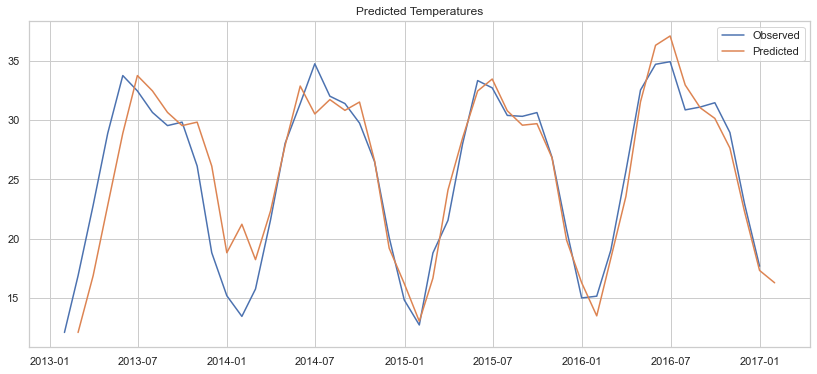

In [192]:
# We end up using SARIMA((0, 1, 1), (1, 1, 0, 12)

model = SARIMAX(monthly_train_data, order=(0, 1, 1), seasonal_order=(1, 1, 0, 12))
fit = model.fit()
y_hat = fit.predict(1, len(monthly_train_data))
fig = plt.figure(figsize=(14,6))
plt.plot(monthly_train_data, label='Observed')
plt.plot(y_hat, label='Predicted')
plt.title('Predicted Temperatures')
plt.legend()
plt.show()

In [180]:
monthly_test_data = test_data['meantemp'].resample('M').mean()

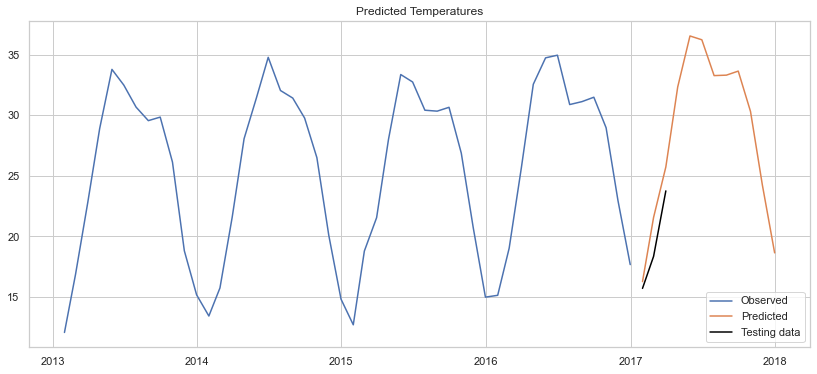

In [193]:
forecast = fit.forecast(12)
fig = plt.figure(figsize=(14,6))
plt.plot(monthly_data, label='Observed')
plt.plot(forecast, label='Predicted')
plt.plot(monthly_test_data, color='black', label='Testing data')
plt.title('Predicted Temperatures')
plt.legend()
plt.show()

In [194]:
print(forecast)

2017-01-31    16.269868
2017-02-28    21.562482
2017-03-31    25.729407
2017-04-30    32.325070
2017-05-31    36.533691
2017-06-30    36.219044
2017-07-31    33.263831
2017-08-31    33.301017
2017-09-30    33.635324
2017-10-31    30.307084
2017-11-30    24.235165
2017-12-31    18.642146
Freq: M, Name: predicted_mean, dtype: float64


# SARIMA Model for average weekly temperatures

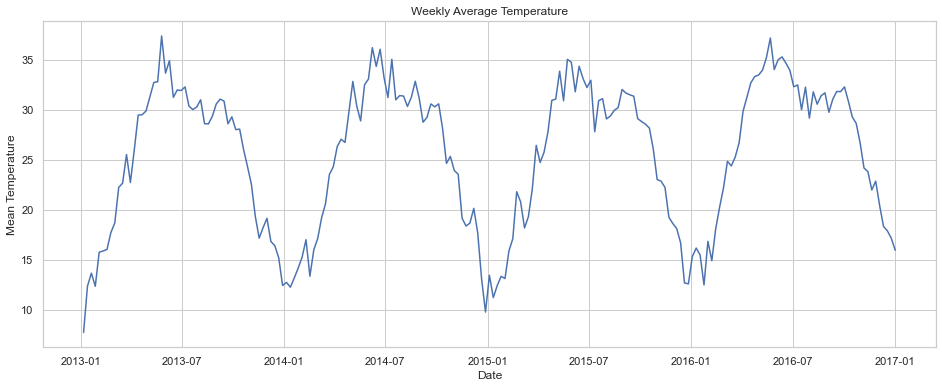

In [271]:
weekly_train_data = weather_data['meantemp'].resample('W').mean()

fig = plt.figure(figsize=(16,6))
sns.lineplot(x=weekly_train_data.index, y=weekly_train_data)
plt.title('Weekly Average Temperature')
plt.xlabel('Date')
plt.ylabel('Mean Temperature')
plt.show()

In [274]:
def adfuller_test(weekly_train_data):
  adf_test = adfuller(weekly_train_data,autolag='AIC') 
  print('ADF Statistic:', adf_test[0])
  print('p-value: ', adf_test[1])
  print('Critical Values:')
  for key, value in adf_test[4].items():
      print('\t%s: %.3f' % (key, value))
  if adf_test[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is non-stationary')


print('ADF on Mean Temperature')
adfuller_test(weekly_train_data)

ADF on Mean Temperature
ADF Statistic: -4.7859309129834005
p-value:  5.7858421180885016e-05
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
We can reject the null hypothesis (H0) --> data is stationary


In [275]:
def kpss_test(weekly_train_data):
  kpss_out = kpss(weekly_train_data,regression='c', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Monthly Mean Temperature')
kpss_test(weekly_train_data)


KPSS on Monthly Mean Temperature
KPSS Statistic: 0.08411419881210803
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


In [276]:
def kpss_test(weekly_train_data):
  kpss_out = kpss(weekly_train_data,regression='ct', nlags='auto', store=True) 
  print('KPSS Statistic:', kpss_out[0])
  print('p-value: ', kpss_out[1])
  if kpss_out[1] <= 0.05:
    print('We can reject the null hypothesis (H0) --> data is not trend stationary')
  else:
    print('We cannot reject the null hypothesis (H0) --> data is trend stationary')


print('KPSS on Monthly Mean Temperature')
kpss_test(weekly_train_data)


KPSS on Monthly Mean Temperature
KPSS Statistic: 0.039191967349717624
p-value:  0.1
We cannot reject the null hypothesis (H0) --> data is trend stationary


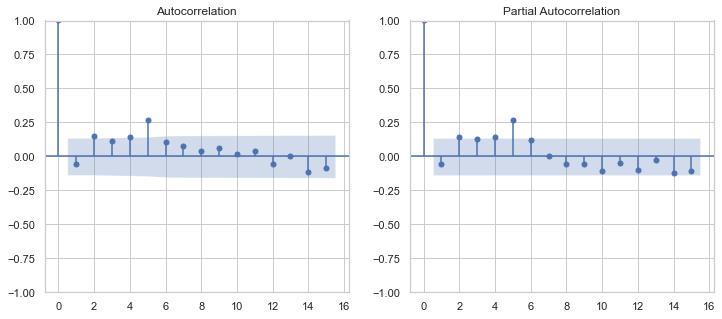

In [298]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(weekly_train_data.diff().dropna(), lags =15, ax=ax1)
plot_pacf(weekly_train_data.diff().dropna(), lags = 15, ax=ax2)
plt.show()

In [299]:
import pmdarima as pm
from pmdarima import auto_arima

# Assuming you have a time series 'train_data' for training
# Define a seasonal order (SARIMA) range to search within
# You can adjust the range based on your problem and data
seasonal_order_range = [(p, d, q, P, D, Q, s) for p in range(3) for d in range(2) for q in range(3) for P in range(3) for D in range(2) for Q in range(3) for s in [365]]

# Use auto_arima to find the best SARIMA model
model = pm.auto_arima(weekly_train_data,
                      seasonal=True,  # Enable seasonality
                      m=7,  # Seasonal period (adjust as needed)
                      stepwise=True,  # Use a stepwise approach for efficiency
                      suppress_warnings=True,  # Suppress warnings
                      error_action="ignore",  # Ignore errors
                      seasonal_order=seasonal_order_range,  # Range of seasonal orders
                      trace=True,  # Print progress
                      scoring="mse",  # You can use other metrics like AIC or BIC
                      n_jobs=-1)  # Use all available CPU cores for speed

# Print the best model's summary
print(model.summary())

# Get the best model's SARIMA orders
best_order = model.order
best_seasonal_order = model.seasonal_order
print("Best SARIMA Order:", best_order)
print("Best SARIMA Seasonal Order:", best_seasonal_order)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=883.357, Time=0.43 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=1422.112, Time=0.01 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=899.910, Time=0.14 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=1155.587, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=1964.710, Time=0.01 sec
 ARIMA(2,0,2)(0,0,1)[7] intercept   : AIC=860.780, Time=0.34 sec
 ARIMA(2,0,2)(0,0,0)[7] intercept   : AIC=855.751, Time=0.32 sec
 ARIMA(2,0,2)(1,0,0)[7] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(1,0,2)(0,0,0)[7] intercept   : AIC=898.357, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[7] intercept   : AIC=902.044, Time=0.11 sec
 ARIMA(3,0,2)(0,0,0)[7] intercept   : AIC=900.774, Time=0.22 sec
 ARIMA(2,0,3)(0,0,0)[7] intercept   : AIC=901.590, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[7] intercept   : AIC=901.048, Time=0.04 sec
 ARIMA(1,0,3)(0,0,0)[7] intercept   : AIC=899.058, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[7] intercept   : AIC=858.57

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.57413D+00    |proj g|=  3.63899D-01

At iterate    5    f=  2.46885D+00    |proj g|=  2.77939D-02

At iterate   10    f=  2.14422D+00    |proj g|=  3.86049D-02

At iterate   15    f=  2.14238D+00    |proj g|=  4.76223D-04

At iterate   20    f=  2.14202D+00    |proj g|=  2.18665D-02

At iterate   25    f=  2.14128D+00    |proj g|=  6.56381D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     28     37      1     0     0   

 This problem is unconstrained.


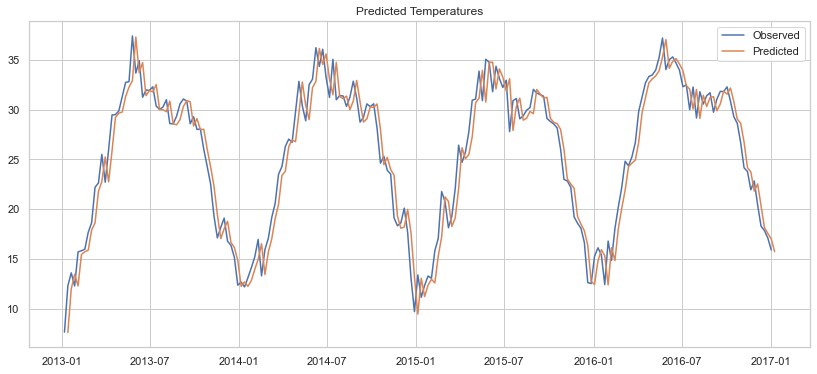

In [308]:
model = SARIMAX(weekly_train_data, order=(1, 0, 1), seasonal_order=(1, 0, 0, 7))
fit = model.fit()
y_hat = fit.predict(1, len(weekly_train_data))
fig = plt.figure(figsize=(14,6))
plt.plot(weekly_train_data, label='Observed')
plt.plot(y_hat, label='Predicted')
plt.title('Predicted Temperatures')
plt.legend()
plt.show()

In [305]:
weekly_test_data = test_data['meantemp'].resample('W').mean()

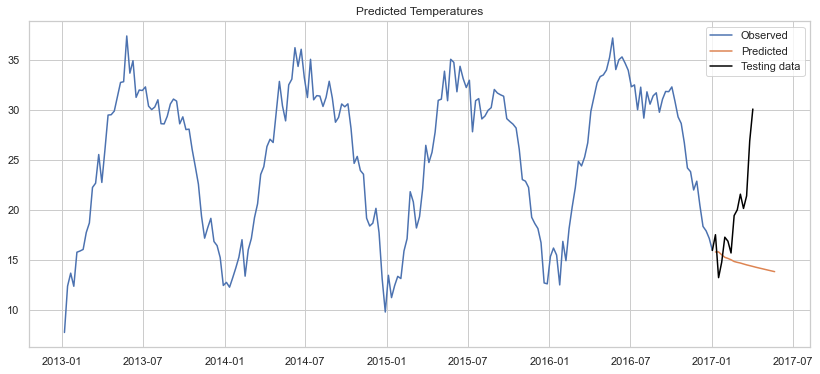

In [309]:
week_forecast = fit.forecast(20)
fig = plt.figure(figsize=(14,6))
plt.plot(weekly_train_data, label='Observed')
plt.plot(week_forecast, label='Predicted')
plt.plot(weekly_test_data, color='black', label='Testing data')
plt.title('Predicted Temperatures')
plt.legend()
plt.show()

In [303]:
print(week_forecast)

2017-01-08    15.128268
2017-01-15    14.318342
2017-01-22    13.563672
2017-01-29    12.860078
2017-02-05    12.203707
2017-02-12    11.591009
2017-02-19    11.018710
2017-02-26    10.483792
2017-03-05     9.983471
2017-03-12     9.515184
2017-03-19     9.076562
2017-03-26     8.665424
2017-04-02     8.279757
2017-04-09     7.917704
2017-04-16     7.577552
2017-04-23     7.257719
2017-04-30     6.956747
2017-05-07     6.673290
2017-05-14     6.406103
2017-05-21     6.154039
Freq: W-SUN, Name: predicted_mean, dtype: float64
